# Final Project

---

Nama : Robi Dwiputra Satria <br>
Bootcamp DS Batch 26

---
## Overview

### Latar Belakang
Saat ini banyak sekali plaform yang menyediakan penjualan mobil bekas. Sehingga pembeli menjadi lebih selektif dalam memilih mobil yang akan dibeli berdasarkan harga mobil yang telah dipasang. Akan tetapi penjual mobil perlu beradaptasi dengan pasar agar mobil dapat terjual dan tetap mendapatkan keuntungan dari hasil penjualan. Harga jual mobil dipengaruhi oleh beberapa faktor seperti merek, tahun pembuatan, jarak tempuh dan spesifikasi mobil. Hal ini disebabkan oleh track record dari merek yang lebih terjamin kualitasnya. Jarak tempuh mempengaruhi harga mobil disebabkan karena jarak tempuh berkaitan dengan frekuensi penggunaan mobil.  Dalam konteks pasar mobil bekas, penentuan harga optimal untuk kendaraan secara tradisional bergantung pada perbandingan dengan daftar lain yang ditemukan di berbagai platform atau situs web  Namun, pendekatan ini memungkinkan tidak mencapai penetapan harga yang tepat dan adil. Perusahaan bertujuan untuk meningkatkan efisiensi dan akurasi proses penetapan harga mobil bekas dengan mengidentifikasi faktor-faktor beragam yang memengaruhi harga.

### Dataset beserta Penjelasan Fitur
Data yang dimiliki hanya terbatas mobil yang dijual terlepas dari apakah mobil tersebut telah terjual maupun tidak. Akan dilakukan analisis menggunakan pola dari brand, model, transmisi, jarak tempuh mobil, pajak mobil, ukuran efisiensi mobil dan kapasitas mesin mobik dengan harga jualnya untuk memprediksi harga jual mobil.


Dataset "Used Car Price Prediction" yang diperoleh dari kaggle berisikan terkait data-data historikal pejualan harga mobil bekas di UK. Dataset tersebut mempunyai 9 variabel termasuk 1 label “price” di dalamnya. Berikut adalah detail dari variabel yang ada.

### Tujuan
> Melakukan analisis data untuk mengetahui faktor apa saja yang mempengaruhi harga jual mobil bekas, kemudian akan dilanjutkan dengan membangun sebuah model regresi yang dapat digunakan sebagai alat untuk membantu penjual mobil bekas pada platform perusahaan untuk memprediksi harga yang dapat membantu dalam menentukan harga jual mobil agar memiliki harga yang kompetitif di pasar.

> Memprediksi harga mobil bekas, agar pelaku bisnis dan calon pembeli dapat meminimalkan overpricing maupun underpricing ketika melakukan jual beli di Exchange and Mart (regresi).

---
## Import Pustaka

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Statistik
from scipy.stats import normaltest
from scipy.stats import skew

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from category_encoders import BinaryEncoder

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


---
## Data Loading

Loading dataset setiap brand

In [ ]:
df_audi = pd.read_csv('audi.csv')
df_bmw = pd.read_csv('bmw.csv')
df_ford = pd.read_csv('ford.csv')
df_hyundai = pd.read_csv('hyundi.csv')
df_merc = pd.read_csv('merc.csv')
df_skoda = pd.read_csv('skoda.csv')
df_toyota = pd.read_csv('toyota.csv')
df_vauxhall = pd.read_csv('vauxhall.csv')
df_vw = pd.read_csv('vw.csv')
df_cclass = pd.read_csv('cclass.csv')
df_focus = pd.read_csv('focus.csv')

In [ ]:
df_audi.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4


In [ ]:
df_bmw.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0


In [ ]:
df_ford.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0


In [ ]:
df_hyundai.head(1)

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2


In [ ]:
df_merc.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8


In [ ]:
df_skoda.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4


In [ ]:
df_toyota.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0


In [ ]:
df_vauxhall.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4


In [ ]:
df_vw.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0


In [ ]:
df_cclass.head(1)

,model,year,price,transmission,mileage,fuelType,engineSize
0,C Class,2020,30495,Automatic,1200,Diesel,2.0


In [ ]:
df_focus.head(1)

,model,year,price,transmission,mileage,fuelType,engineSize
0,Focus,2016,8000,Manual,38852,Petrol,1.0


Terdapat perbedaan nama kolom tax(£) pada data Hyundai

In [ ]:
df_hyundai = df_hyundai.rename(columns={'tax(£)' : 'tax'})

Menampilkan ukuran data setiap kolom harus sama

In [ ]:
print(df_audi.shape)
print(df_bmw.shape)
print(df_ford.shape)
print(df_hyundai.shape)
print(df_merc.shape)
print(df_skoda.shape)
print(df_toyota.shape)
print(df_vauxhall.shape)
print(df_vw.shape)
print(df_cclass.shape)
print(df_focus.shape)

(10668, 9)
(10781, 9)
(17965, 9)
(4860, 9)
(13119, 9)
(6267, 9)
(6738, 9)
(13632, 9)
(15157, 9)
(3899, 7)
(5454, 7)


Hanya terdapat 7 fitur untuk `df_cclass` dan `df_focus`

### Analisis cclass

In [ ]:
df_merc = pd.concat([df_merc, df_cclass], axis=0)

In [ ]:
df_merc[df_merc.duplicated(keep=False)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
468,V Class,2018,19998,Manual,27222,Diesel,145.0,46.3,2.1
469,V Class,2016,17998,Manual,21981,Diesel,200.0,46.3,2.1
493,V Class,2018,19998,Manual,27222,Diesel,145.0,46.3,2.1
494,V Class,2016,17998,Manual,21981,Diesel,200.0,46.3,2.1
1327,GLB Class,2020,35400,Semi-Auto,2000,Diesel,145.0,46.3,2.0
...,...,...,...,...,...,...,...,...,...
3852,C Class,2016,14000,Automatic,45000,Diesel,NaN,NaN,2.1
3853,C Class,2015,12000,Automatic,40005,Diesel,NaN,NaN,2.1
3879,C Class,2016,14000,Automatic,45000,Diesel,NaN,NaN,2.1
3880,C Class,2015,12000,Automatic,40005,Diesel,NaN,NaN,2.1


In [ ]:
df_merc = df_merc.drop_duplicates(keep='first')
df_merc['model'] = df_merc['model'].str.strip()

In [ ]:
df_merc.isnull().sum()

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             3797
mpg             3797
engineSize         0
dtype: int64

Mengelompokkan model cclass dari data merc

In [ ]:
all_cclass = df_merc[df_merc['model'] == 'C Class']
all_cclass

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16,C Class,2017,19890,Automatic,30281,Diesel,150.0,60.1,2.1
19,C Class,2014,15701,Automatic,20498,Diesel,20.0,64.2,2.1
20,C Class,2019,26601,Automatic,9949,Diesel,150.0,64.2,2.0
21,C Class,2016,17672,Automatic,31656,Diesel,30.0,64.2,2.1
29,C Class,2016,19328,Automatic,25042,Diesel,30.0,64.2,2.1
...,...,...,...,...,...,...,...,...,...
3894,C Class,2017,14700,Manual,31357,Diesel,NaN,NaN,1.6
3895,C Class,2018,18500,Automatic,28248,Diesel,NaN,NaN,2.1
3896,C Class,2014,11900,Manual,48055,Diesel,NaN,NaN,2.1
3897,C Class,2014,11300,Automatic,49865,Diesel,NaN,NaN,2.1


Mengisi nilai tax dan mpg model cclass dengan median berdasarkan tahun, transmission, enginesize, dan fueltype

In [ ]:
median_tax_cclass = all_cclass.groupby(['year', 'transmission', 'engineSize', 'fuelType'])['tax'].median().reset_index()
cols_tax = ['year', 'transmission', 'engineSize', 'fuelType']
df_merc_filled = df_merc.set_index(cols_tax)
median_tax = median_tax_cclass.set_index(cols_tax).tax
df_merc = df_merc_filled.fillna({"tax": median_tax}).reset_index()

In [ ]:
median_mpg_cclass = all_cclass.groupby(['year', 'transmission', 'engineSize', 'fuelType'])['mpg'].median().reset_index()
cols_mpg = ['year', 'transmission', 'engineSize', 'fuelType']
df_merc_filled_mpg = df_merc.set_index(cols_mpg)
median_mpg = median_mpg_cclass.set_index(cols_mpg).mpg
df_merc = df_merc_filled_mpg.fillna({"mpg": median_mpg}).reset_index()

In [ ]:
df_merc.isnull().sum()

year             0
transmission     0
engineSize       0
fuelType         0
model            0
price            0
mileage          0
tax             20
mpg             20
dtype: int64

Tersisa 20 missing values pada fitur `tax` dan `mpg`, akan dilakukan kembali pengisian missing values dengan median berdasarkan tahun dan ukuran mesin

In [ ]:
median_tax_cclass_2 = all_cclass.groupby(['year', 'engineSize'])['tax'].median().reset_index()
cols_tax_cclass_2 = ['year', 'engineSize']
df_merc_filled_cclass_2 = df_merc.set_index(cols_tax_cclass_2)
median_tax_cclass_2 = median_tax_cclass_2.set_index(cols_tax_cclass_2).tax
df_merc = df_merc_filled_cclass_2.fillna({"tax": median_tax_cclass_2}).reset_index()

In [ ]:
median_mpg_cclass_2 = all_cclass.groupby(['year', 'engineSize'])['mpg'].median().reset_index()
cols_mpg_cclass_2 = ['year', 'engineSize']
df_merc_filled_cclass_2 = df_merc.set_index(cols_mpg_cclass_2)
median_mpg_cclass_2 = median_mpg_cclass_2.set_index(cols_mpg_cclass_2).mpg
df_merc = df_merc_filled_cclass_2.fillna({"mpg": median_mpg_cclass_2}).reset_index()

In [ ]:
df_merc.isnull().sum()

year             0
engineSize       0
transmission     0
fuelType         0
model            0
price            0
mileage          0
tax             14
mpg             14
dtype: int64

Tersisa 14 missing values pada fitur tax dan mpg

In [ ]:
# mengurutkan kolom agar konsisten
df_merc = df_merc[['model', 'year', 'price', 'transmission', 'mileage',
                   'fuelType', 'tax','mpg', 'engineSize']]

In [ ]:
df_merc[df_merc['tax'].isnull()].sort_values(by='year')

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16247,C Class,1991,4450,Automatic,170000,Petrol,NaN,NaN,3.0
16295,C Class,1995,4750,Automatic,173000,Petrol,NaN,NaN,3.6
16525,C Class,1998,1290,Automatic,140000,Petrol,NaN,NaN,2.0
16526,C Class,2002,3690,Automatic,20000,Petrol,NaN,NaN,2.6
16391,C Class,2003,1795,Automatic,88082,Diesel,NaN,NaN,2.1
16371,C Class,2004,9495,Automatic,52000,Petrol,NaN,NaN,3.2
16126,C Class,2005,2575,Automatic,66000,Diesel,NaN,NaN,2.1
16286,C Class,2005,2995,Automatic,102500,Diesel,NaN,NaN,2.1
16390,C Class,2005,2495,Automatic,110461,Diesel,NaN,NaN,2.1
16524,C Class,2005,15990,Automatic,73000,Petrol,NaN,NaN,5.4


Akan dilakukan penghapusan data yang memuat missing values

In [ ]:
df_merc = df_merc.dropna(subset=['tax', 'mpg'], axis=0)
df_merc = df_merc.reset_index(drop=True)

In [ ]:
df_merc.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### Analisis focus

In [ ]:
df_ford = pd.concat([df_ford, df_focus], axis=0)

In [ ]:
df_ford[df_ford.duplicated(keep=False)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
25,Focus,2017,18499,Manual,13063,Petrol,145.0,41.5,2.0
27,Fiesta,2015,8299,Manual,25935,Petrol,0.0,65.7,1.0
28,Fiesta,2018,12499,Manual,8700,Petrol,145.0,58.9,1.0
113,Focus,2016,10995,Manual,30923,Diesel,0.0,74.3,1.5
159,Focus,2016,10995,Manual,30923,Diesel,0.0,74.3,1.5
...,...,...,...,...,...,...,...,...,...
5449,Focus,2019,18745,Manual,7855,Diesel,NaN,NaN,2.0
5450,Focus,2019,16350,Manual,13891,Petrol,NaN,NaN,1.0
5451,Focus,2019,16850,Manual,13452,Petrol,NaN,NaN,1.0
5452,Focus,2019,17310,Automatic,13376,Petrol,NaN,NaN,1.0


In [ ]:
# menghapus whitespac
df_ford = df_ford.drop_duplicates(keep='first')
df_ford['model'] = df_ford['model'].str.strip()

In [ ]:
df_ford.isnull().sum()

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             4758
mpg             4758
engineSize         0
dtype: int64

Mengelompokkan model focus dari data ford

In [ ]:
all_focus = df_ford[df_ford['model'] == 'Focus']
all_focus

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0
9,Focus,2018,10000,Manual,48141,Petrol,145.0,61.4,1.0
25,Focus,2017,18499,Manual,13063,Petrol,145.0,41.5,2.0
32,Focus,2019,18990,Manual,8400,Petrol,145.0,60.1,1.0
...,...,...,...,...,...,...,...,...,...
5412,Focus,2018,12995,Manual,17161,Petrol,NaN,NaN,1.0
5413,Focus,2014,5995,Manual,36500,Diesel,NaN,NaN,1.6
5414,Focus,2019,17499,Automatic,1478,Petrol,NaN,NaN,1.0
5415,Focus,2006,1495,Manual,105000,Diesel,NaN,NaN,1.6


Mengisi nilai tax dan mpg model focus dengan median berdasarkan tahun, transmission, enginesize, dan fueltype

In [ ]:
median_tax_focus = all_focus.groupby(['year', 'transmission', 'engineSize', 'fuelType'])['tax'].median().reset_index()
cols_tax_fcs = ['year', 'transmission', 'engineSize', 'fuelType']
df_ford_filled_tax = df_ford.set_index(cols_tax_fcs)
median_tax_focus = median_tax_focus.set_index(cols_tax_fcs).tax
df_ford = df_ford_filled_tax.fillna({"tax": median_tax_focus}).reset_index()

In [ ]:
median_mpg_focus = all_focus.groupby(['year', 'transmission', 'engineSize', 'fuelType'])['mpg'].median().reset_index()
cols_mpg_fcs = ['year', 'transmission', 'engineSize', 'fuelType']
df_ford_filled_mpg = df_ford.set_index(cols_mpg_fcs)
median_mpg_focus = median_mpg_focus.set_index(cols_mpg_fcs).mpg
df_ford = df_ford_filled_mpg.fillna({"mpg": median_mpg_focus}).reset_index()

In [ ]:
df_ford.isnull().sum()

year            0
transmission    0
engineSize      0
fuelType        0
model           0
price           0
mileage         0
tax             9
mpg             9
dtype: int64

Tersisa 9 missing values pada fitur `tax` dan `mpg`, akan dilakukan kembali pengisian missing values dengan median berdasarkan tahun dan ukuran mesin

In [ ]:
median_tax_focus_2 = all_focus.groupby(['year', 'engineSize'])['tax'].median().reset_index()
cols_tax_focus_2 = ['year', 'engineSize']
df_ford_filled_focus_2 = df_ford.set_index(cols_tax_focus_2)
median_tax_focus_2 = median_tax_focus_2.set_index(cols_tax_focus_2).tax
df_ford = df_ford_filled_focus_2.fillna({"tax": median_tax_focus_2}).reset_index()

In [ ]:
median_mpg_focus_2 = all_focus.groupby(['year', 'engineSize'])['mpg'].median().reset_index()
cols_mpg_focus_2 = ['year', 'engineSize']
df_ford_filled_focus_2 = df_ford.set_index(cols_mpg_focus_2)
median_mpg_focus_2 = median_mpg_focus_2.set_index(cols_mpg_focus_2).mpg
df_ford = df_ford_filled_focus_2.fillna({"mpg": median_mpg_focus_2}).reset_index()

In [ ]:
df_ford.isnull().sum()

year            0
engineSize      0
transmission    0
fuelType        0
model           0
price           0
mileage         0
tax             1
mpg             1
dtype: int64

Tersisa 1 missing values pada fitur `tax` dan `mpg`

In [ ]:
df_ford = df_ford[['model', 'year', 'price', 'transmission', 'mileage',
                   'fuelType', 'tax','mpg', 'engineSize']]

In [ ]:
df_ford[df_ford['mpg'].isnull()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
22505,Focus,2002,795,Manual,101000,Petrol,NaN,NaN,1.6


Menampilkan tipe data yang serupa dengan data pada index ke-22505 (missing values)

In [ ]:
df_ford.iloc[[22505], :]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
22505,Focus,2002,795,Manual,101000,Petrol,NaN,NaN,1.6


In [ ]:
df_ford[(df_ford['model'].isin(['Focus'])) & (df_ford['year'] < 2004) &
        (df_ford['transmission'].isin(['Manual']))]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16666,Focus,2003,3999,Manual,56064,Petrol,325.0,31.0,2.0
16817,Focus,2003,1695,Manual,89630,Petrol,200.0,40.9,1.6
16950,Focus,2003,495,Manual,177644,Petrol,200.0,41.5,1.6
22331,Focus,2003,3999,Manual,56064,Petrol,325.0,31.0,2.0
22403,Focus,2003,1695,Manual,89630,Petrol,200.0,41.2,1.6
22426,Focus,2003,495,Manual,177644,Petrol,200.0,41.2,1.6
22505,Focus,2002,795,Manual,101000,Petrol,NaN,NaN,1.6


Berdasarkan karakteristik data yang tidak jauh berbeda dengan index-22505, maka missing values akan diisi dengan tax = 200.0 dan mpg = 41.2

In [ ]:
df_ford.loc[22505, 'tax'] = 200.0
df_ford.loc[22505, 'mpg'] = 41.2

In [ ]:
df_ford.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Sudah tidak ada missing values pada data `ford`

Menambahkan kolom brand pada setiap data

In [ ]:
df_audi.insert(0, 'brand', 'Audi')
df_bmw.insert(0, 'brand', 'BMW')
df_ford.insert(0, 'brand', 'Ford')
df_hyundai.insert(0, 'brand', 'Hyundai')
df_merc.insert(0, 'brand', 'Mercedes')
df_skoda.insert(0, 'brand', 'Skoda')
df_toyota.insert(0, 'brand', 'Toyota')
df_vauxhall.insert(0, 'brand', 'Vauxhall')
df_vw.insert(0, 'brand', 'VW')

In [ ]:
df_audi.head(1)

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4


Menggabungkan keseluruhan data

In [ ]:
df = pd.concat([df_audi, df_bmw, df_ford, df_hyundai, df_merc, df_skoda, df_toyota, df_vauxhall, df_vw])

In [ ]:
# reset index
df = df.reset_index(drop=True)

In [ ]:
print('Ukuran dataframe: {}'.format(df.shape))

Ukuran dataframe: (107315, 10)


Menampilkan nilai unik setiap data pada fitur `model`

In [ ]:
# Check Value Model Column
df['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7',
       ' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3', 'Fiesta', 'Focus', 'Puma', 'Kuga', 'EcoSport',
       'C-MAX', 'Mondeo', 'Ka+', 'Tourneo Custom', 'S-MAX', 'B-MAX',
       'Edge', 'Tourneo Connect', 'Grand C-MAX', 'KA', 'Galaxy',
       'Mustang', 'Grand Tourneo Connect', 'Fusion', 'Ranger', 'Streetka',
       'Escort', 'Transit Tourneo', ' I20', ' Tucson', ' I10', ' IX35',
       ' I30', ' I40', ' Ioniq', ' Kona', ' Veloster', ' I800', ' IX20',
       ' Santa Fe', ' Accent', ' Terracan', ' Getz', ' Amica', 'SLK',
       'S Class', 'SL CLASS', 'G Class', 'GLE Class', 'GLA Class',
       '

Terdapat whitespace pada beberapa nama model

In [ ]:
# Menghapus whitespace
df['model'] = df['model'].str.strip()
df['model'].unique()

array(['A1', 'A6', 'A4', 'A3', 'Q3', 'Q5', 'A5', 'S4', 'Q2', 'A7', 'TT',
       'Q7', 'RS6', 'RS3', 'A8', 'Q8', 'RS4', 'RS5', 'R8', 'SQ5', 'S8',
       'SQ7', 'S3', 'S5', 'A2', 'RS7', '5 Series', '6 Series', '1 Series',
       '7 Series', '2 Series', '4 Series', 'X3', '3 Series', 'X5', 'X4',
       'i3', 'X1', 'M4', 'X2', 'X6', '8 Series', 'Z4', 'X7', 'M5', 'i8',
       'M2', 'M3', 'M6', 'Z3', 'Fiesta', 'Focus', 'Puma', 'Kuga',
       'EcoSport', 'C-MAX', 'Mondeo', 'Ka+', 'Tourneo Custom', 'S-MAX',
       'B-MAX', 'Edge', 'Tourneo Connect', 'Grand C-MAX', 'KA', 'Galaxy',
       'Mustang', 'Grand Tourneo Connect', 'Fusion', 'Ranger', 'Streetka',
       'Escort', 'Transit Tourneo', 'I20', 'Tucson', 'I10', 'IX35', 'I30',
       'I40', 'Ioniq', 'Kona', 'Veloster', 'I800', 'IX20', 'Santa Fe',
       'Accent', 'Terracan', 'Getz', 'Amica', 'SLK', 'S Class',
       'SL CLASS', 'G Class', 'GLE Class', 'GLA Class', 'A Class',
       'B Class', 'GLC Class', 'C Class', 'E Class', 'GL Class',
     

Whitespace sudah tidak ada

Cek data duplikat

In [ ]:
df.duplicated().sum()

4695

Menghapus data duplikat dengan mempertahankan baris pertama

In [ ]:
df = df.drop_duplicates(keep='first')

Mengecek kembali apakah masih ada data duplikat

In [ ]:
df.duplicated().sum()

0

Sudah tidak ada data duplikat

In [ ]:
# reset index
df = df.reset_index(drop=True)

Menampilkan missing values (jika ada)

In [ ]:
df.isnull().sum()

brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Tidak ada missing values

Menampilkan beberapa informasi dataset

In [ ]:
# menampilkan beberapa informasi dataset
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='feature data_type null_num null_pct unique_num unique_sample'.split())
desc_df

,feature,data_type,null_num,null_pct,unique_num,unique_sample
0,brand,object,0,0.0,9,"[Audi, BMW, Ford, Hyundai]"
1,model,object,0,0.0,195,"[A1, A6, A4, A3]"
2,year,int64,0,0.0,27,"[2017, 2016, 2019, 2015]"
3,price,int64,0,0.0,13298,"[12500, 16500, 11000, 16800]"
4,transmission,object,0,0.0,4,"[Manual, Automatic, Semi-Auto, Other]"
5,mileage,int64,0,0.0,42310,"[15735, 36203, 29946, 25952]"
6,fuelType,object,0,0.0,5,"[Petrol, Diesel, Hybrid, Other]"
7,tax,float64,0,0.0,61,"[150.0, 20.0, 30.0, 145.0]"
8,mpg,float64,0,0.0,234,"[55.4, 64.2, 67.3, 49.6]"
9,engineSize,float64,0,0.0,40,"[1.4, 2.0, 1.0, 3.0]"


## EDA
---

Menampilkan rangkuman statistik deskriptif untuk tipe data numerikal dan kategorikal

In [ ]:
display(df.describe(), df.describe(include='object'))

,year,price,mileage,tax,mpg,engineSize
count,102620.000000,102620.000000,102620.000000,102620.000000,102620.000000,102620.000000
mean,2017.080491,16879.216391,23138.712132,120.505944,55.355884,1.665541
std,2.121329,9831.758891,21055.637418,62.700077,16.005459,0.558932
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10150.000000,7656.000000,125.000000,47.100000,1.200000
50%,2017.000000,14500.000000,17503.500000,145.000000,55.400000,1.600000
75%,2019.000000,20980.000000,32345.250000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


,brand,model,transmission,fuelType
count,102620,102620,102620,102620
unique,9,195,4,5
top,Ford,Focus,Manual,Petrol
freq,20143,6887,57629,56540


**Interpretasi:**
-  Terlihat pada table diatas bahwa data set ini terdiri atas 6 kolom numerik, dan 4 kolom kategorikal.

- Selain itu terdapat data yang bias (jauh dari keragamannya) pada kolom year, yaitu tahun 1970 dan 2060. hal ini akan diidentifikasi pada saat Data Cleaning nanti.

- kemudian terdapat 2 kolom yang memiliki nilai minimum nol, yaitu tax dan engineSize, hal ini akan dianalisis lebih lanjut pada saat Data Cleansing.

- Terakhir pada kolom-kolom kategorikal, terdapat kolom model, yang berisikan banyak sekali jenis model mobil, hal ini akan dievalusasi, untuk mengetahui apakah keseluruhan model akan dipertahankan nanti.

Menguji normalitas data numerik

In [ ]:
# Check Distribution Numerical Data
kolom=['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
distribusi = []
for i in kolom:
    stats, pval = normaltest(df[i])
    if pval > 0.05:
        distribusi.append('normal')
    else:
        distribusi.append('tidak normal')

pd.DataFrame({'distribusi':distribusi},index=kolom)

,distribusi
year,tidak normal
price,tidak normal
mileage,tidak normal
tax,tidak normal
mpg,tidak normal
engineSize,tidak normal


Hasil normaltest menunjukkan bahwa distribusi data tidak normal, maka hal ini menunjukkan bahwa data tidak terdistribusi secara merata di sekitar mean. Dalam konteks bisnis, ini dapat mengindikasikan adanya nilai ekstrem yang signifikan dalam data, atau adanya outlier yang dapat mempengaruhi interpretasi analisis statistik. pada uji normalitas diatas, terhitung bahwa sebaran data pada fitur-fitur numerikal tidaklah normal, untuk lebih jelasnya akan dapat dilihat pada sebaran data dengan plot dibawah nanti.

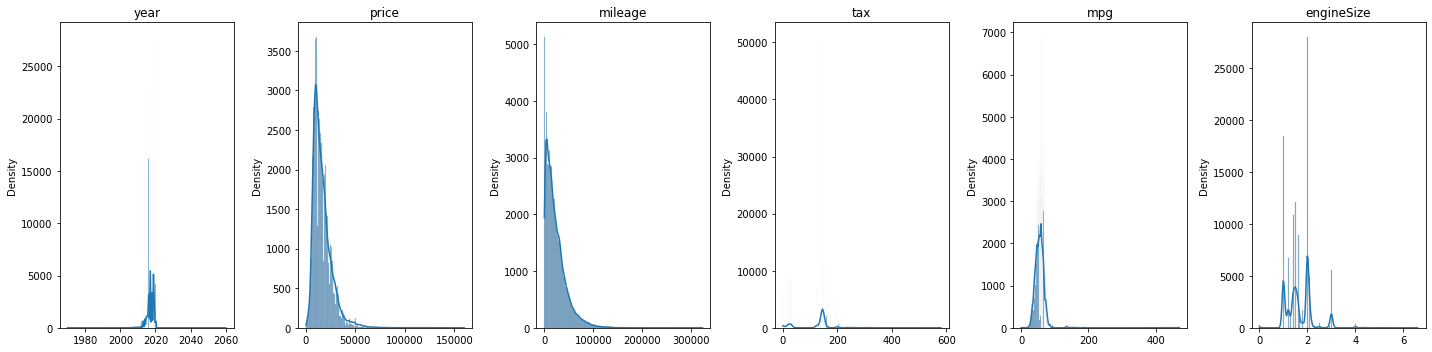

In [ ]:
# Create Distplot for Each Numerical Feature
import math
num = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
num_plots = len(num)
num_rows = 1  # Jumlah baris disetel menjadi 1
num_cols = num_plots  # Jumlah kolom disetel sesuai dengan jumlah plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
axes = axes.flatten()

for i in range(num_plots):
    # Displot
    sns.histplot(df[num[i]], ax=axes[i], kde=True)
    axes[i].set_title(num[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [ ]:
# nilai skewness pada year, price, mileage

column_num=['year','price','mileage']

hasil=[]
for i in column_num:
    hasil=skew(df[column_num])

pd.DataFrame({'Kolom':column_num, 'Skewness':hasil})

,Kolom,Skewness
0,year,-1.925271
1,price,2.308932
2,mileage,1.793253


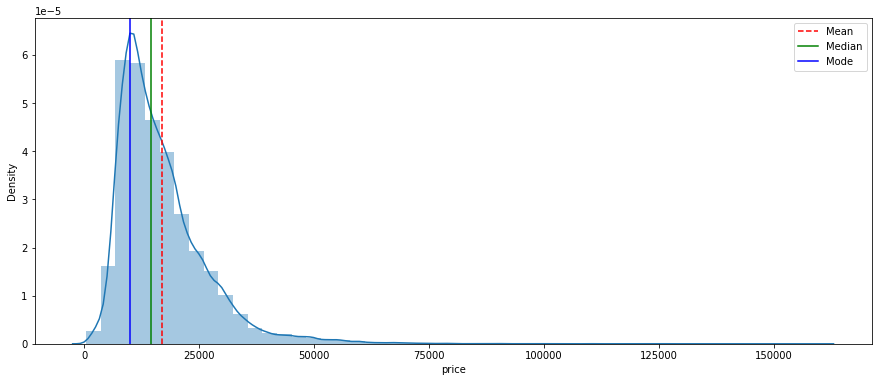

In [ ]:
# Cek distribusi target variable - price
f,ax = plt.subplots(1, sharex=True,figsize=(15,6))
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode().values[0]

sns.distplot(df['price'],ax = ax)
ax.axvline(mean_price, color='r', linestyle='--', label="Mean")
ax.axvline(median_price, color='g', linestyle='-', label="Median")
ax.axvline(mode_price, color='b', linestyle='-', label="Mode")

ax.legend()
plt.xlim()
plt.show()

Data target price memiliki sebaran data skewed right, dan pada Data Understanding diatas, target memiliki nilai tengah sebesar 14.500 £, nilai terkecil bernilai 450 £, dan maksimum pada 159.999 £, yang ketiganya dapat terlihat pada plot diatas ini.

Visualisasi boxplot unruk tipe data numerikal

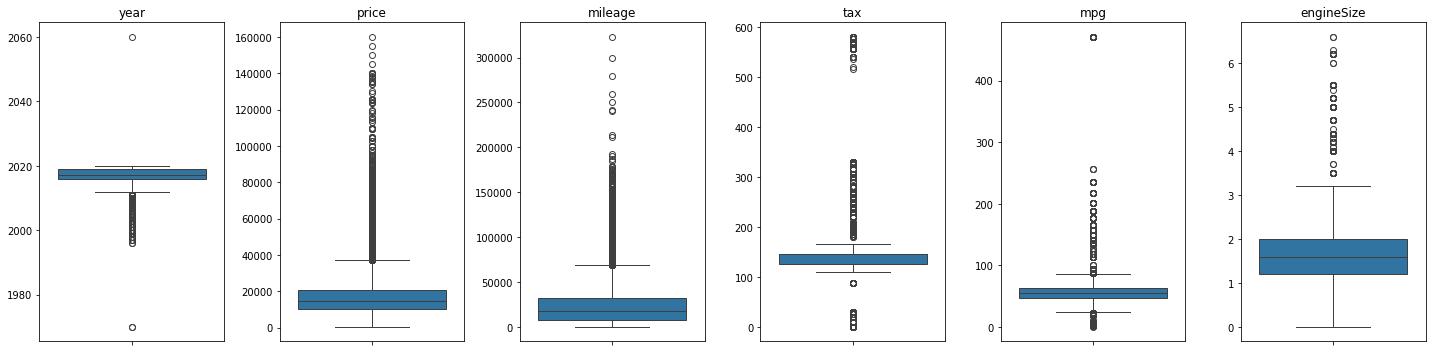

In [ ]:
num = ['year','price','mileage','tax','mpg','engineSize']
num_plots = len(num)
num_rows = 1  # Jumlah baris disetel menjadi 1
num_cols = num_plots  # Jumlah kolom disetel sesuai dengan jumlah plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5*num_rows))
axes = axes.flatten()
for i in range(num_plots):
    sns.boxplot(y=df[num[i]], ax=axes[i])
    axes[i].set_title(num[i])
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

**Interpretasi:** sama pada plot sebaran data harga diatas, pada fitur-fitur numerik juga terlihat adanya outlier-outlier ekstrim, yang dapat membuat prediksi model semakin buruk. maka untuk akan dianalisis lebih lanjut pada saat handling outlier nanti.

Membuat fungsi untuk mengecek outlier

In [ ]:
def show_outlier(col_name,table=True):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1
    outlier_df = df[(df[col_name]<(Q1-1.5*IQR))|(df[col_name]>(Q3+1.5*IQR))]
    if table==False:
        print(f'Kolom {col_name} memiliki {outlier_df.shape[0]} baris data outlier yang merupakan {round(outlier_df.shape[0]/df.shape[0]*100,2)}% dari keseluruhan data')
    print(f'Data dianggap sebagai outlier apabila nilainya kurang dari {Q1-1.5*IQR} atau lebih dari {Q3+1.5*IQR} \n')
    if True:
        return outlier_df

In [ ]:
for col in [col for col in df.columns if df[col].dtypes!='object']:
    show_outlier(col,table=False)

Kolom year memiliki 1848 baris data outlier yang merupakan 1.8% dari keseluruhan data
Data dianggap sebagai outlier apabila nilainya kurang dari 2011.5 atau lebih dari 2023.5 

Kolom price memiliki 3757 baris data outlier yang merupakan 3.66% dari keseluruhan data
Data dianggap sebagai outlier apabila nilainya kurang dari -6095.0 atau lebih dari 37225.0 

Kolom mileage memiliki 4092 baris data outlier yang merupakan 3.99% dari keseluruhan data
Data dianggap sebagai outlier apabila nilainya kurang dari -29377.875 atau lebih dari 69379.125 

Kolom tax memiliki 29484 baris data outlier yang merupakan 28.73% dari keseluruhan data
Data dianggap sebagai outlier apabila nilainya kurang dari 95.0 atau lebih dari 175.0 

Kolom mpg memiliki 957 baris data outlier yang merupakan 0.93% dari keseluruhan data
Data dianggap sebagai outlier apabila nilainya kurang dari 23.550000000000008 atau lebih dari 86.35 

Kolom engineSize memiliki 707 baris data outlier yang merupakan 0.69% dari keseluruhan data

### Cek anomali fitur

In [ ]:
df_1 = df.copy()

**cek anomali fitur `year`**

In [ ]:
year_check = df['year'].value_counts().to_frame().reset_index().rename(columns={"index": "year", "year": "Value Count"})
year_check.sort_values(by='Value Count', ascending=True).head()

,Value Count,count
25,1970,2
24,1996,2
23,1997,4
21,1998,8
22,1999,6


Cek outlier ekstrem

In [ ]:
year_out = df_1.loc[(df_1['year'] < 1980) | (df_1['year'] > 2020)]

In [ ]:
year_out

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
38801,Ford,Fiesta,2060,6495,Automatic,54807,Petrol,205.0,42.8,1.4
57961,Mercedes,M Class,1970,24999,Automatic,14000,Diesel,305.0,39.2,0.0
84964,Vauxhall,Zafira,1970,10495,Manual,37357,Petrol,200.0,42.2,1.4


Anomali terdapat pada id :

- 38801 dikarenakan tidak mungkin mobil buatan tahun 2060 ada pada list. ['Data Fiesta'](https://en.wikipedia.org/wiki/Ford_Fiesta)
- 57961 dikarenakan merc M Class mulai rilis tahun 1997. ['Data M Class'](https://en.wikipedia.org/wiki/Mercedes-Benz_GLE#:~:text=9%20February%201997.-,Initial%20release,row%2C%20seven%2Dseat%20version)
- 84964 Vauxhall Zafira mulai rilis pada tahun 1999. ['Data Zafira'](https://en.wikipedia.org/wiki/Opel_Zafira#:~:text=Zafira%20A%20(1999),-Zafira%20A%20(T98&text=The%20first%20generation%20Zafira%20was,in%20April%20of%20that%20year)

In [ ]:
# Menghapus outlier ekstrem
df_1 = df_1.loc[(df_1['year'] > 1980) & (df_1['year'] <= 2020)].reset_index(drop=True)

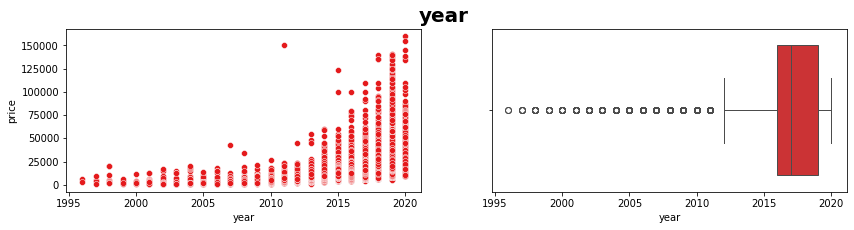

In [ ]:
xn = 'year'

fig = plt.figure(figsize=(14, 3))
sns.set_palette("Set1")
plt.suptitle(xn, size=20, weight='bold')

plt.subplot(1, 2, 1)
sns.scatterplot(x=xn, y='price', data=df_1)

plt.subplot(1, 2, 2)
ax = sns.boxplot(x=xn, data=df_1)

Terdapat harga yang tinggi pada tahun 2011, maka akan diidentifikasi lebih lanjut mengenai data tersebut

In [ ]:
df_1[(df_1['year']) == 2011].price.max()

149948

In [ ]:
df_1[(df_1['year'] == 2011) & (df_1['price'] > 100000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
46150,Mercedes,SL CLASS,2011,149948,Automatic,3000,Petrol,570.0,21.4,6.2


In [ ]:
df_1[(df_1['model'].isin(['SL CLASS']))].sort_values(by='engineSize', ascending=False)

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
46150,Mercedes,SL CLASS,2011,149948,Automatic,3000,Petrol,570.0,21.4,6.2
46147,Mercedes,SL CLASS,2016,49948,Automatic,6200,Petrol,555.0,28.0,5.5
54460,Mercedes,SL CLASS,2019,79299,Semi-Auto,1776,Petrol,145.0,28.0,5.5
49960,Mercedes,SL CLASS,2019,80650,Automatic,221,Petrol,145.0,28.0,5.5
54211,Mercedes,SL CLASS,2019,78399,Semi-Auto,3728,Petrol,145.0,28.0,5.5
...,...,...,...,...,...,...,...,...,...,...
50606,Mercedes,SL CLASS,2017,19490,Manual,21173,Petrol,145.0,48.7,1.6
57184,Mercedes,SL CLASS,2018,18999,Automatic,8942,Petrol,145.0,48.7,1.6
53907,Mercedes,SL CLASS,2018,22495,Semi-Auto,4000,Petrol,145.0,48.7,1.6
49893,Mercedes,SL CLASS,2017,18152,Semi-Auto,43074,Petrol,145.0,48.7,1.6


In [ ]:
# menghapus nilai price yang ekstrem
df_1 = df_1.drop(index=46150, axis=0).reset_index(drop=True)

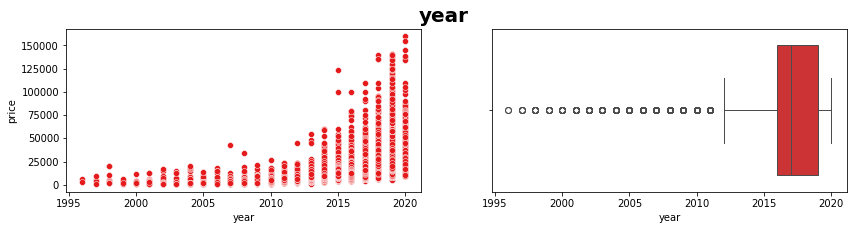

In [ ]:
xn = 'year'

fig = plt.figure(figsize=(14, 3))
sns.set_palette("Set1")
plt.suptitle(xn, size=20, weight='bold')

plt.subplot(1, 2, 1)
sns.scatterplot(x=xn, y='price', data=df_1)

plt.subplot(1, 2, 2)
ax = sns.boxplot(x=xn, data=df_1)

**Interpretasi:** Hubungan antara tahun pembuatan mobil dan harganya menghasilkan korelasi positif, yang menunjukkan bahwa mobil baru cenderung lebih mahal. Boxplot menunjukkan bahwa harga rata-rata mobil adalah sekitar 150.000 pounds, dengan rentang harga yang luas dari 0 pounds hingga 150.000 pounds. Diagram tersebut juga menunjukkan bahwa ada beberapa outlier dengan harga di atas $150.000.

**cek anomali fitur `mpg`**

Cek outlier ekstrem

In [ ]:
# cek jumlah outlier
mpg_outlier = df_1[(df_1['mpg'] > 300)]
print(f'Jumlah outlier ekstrim pada fitur `mpg` berjumlah : {len(mpg_outlier)}')

Jumlah outlier ekstrim pada fitur `mpg` berjumlah : 43


In [ ]:
df_1[df_1['mpg'] == df_1['mpg'].max()]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10597,BMW,i3,2016,17100,Automatic,25269,Other,0.0,470.8,0.6
11184,BMW,i3,2017,19998,Automatic,41949,Hybrid,140.0,470.8,0.0
11340,BMW,i3,2017,19998,Automatic,41146,Hybrid,0.0,470.8,0.0
11342,BMW,i3,2017,21898,Automatic,10839,Hybrid,0.0,470.8,0.0
12367,BMW,i3,2017,19980,Automatic,26965,Hybrid,140.0,470.8,0.0
12852,BMW,i3,2016,19490,Automatic,8421,Hybrid,0.0,470.8,0.0
13770,BMW,i3,2016,16482,Automatic,43695,Hybrid,0.0,470.8,0.0
14121,BMW,i3,2015,14285,Automatic,65800,Hybrid,0.0,470.8,0.0
14397,BMW,i3,2017,18500,Automatic,36429,Hybrid,0.0,470.8,0.0
14578,BMW,i3,2017,19495,Automatic,17338,Hybrid,135.0,470.8,0.0


Terdapat outlier yang jaraknya cukup jauh dari data mayoritas. Hasil analisa menunjukkan bahwa outlier tersebut dihasilkan oleh mobil hybrid dari BMW model I3. Outlier tersebut tidak didrop karena memang mobil hybrid lebih hemat bahan bakar dibandingkan dengan fuelType petrol ataupun diesel.

In [ ]:
show_outlier('mpg')

Data dianggap sebagai outlier apabila nilainya kurang dari 23.550000000000008 atau lebih dari 86.35 



,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
861,Audi,A3,2020,31990,Semi-Auto,2165,Hybrid,135.0,141.3,1.4
1099,Audi,Q5,2019,44990,Automatic,6565,Hybrid,135.0,117.7,2.0
1635,Audi,R8,2019,129000,Semi-Auto,4000,Petrol,145.0,21.4,5.2
1637,Audi,Q5,2020,46450,Semi-Auto,3500,Hybrid,135.0,117.7,2.0
1858,Audi,R8,2013,47995,Manual,19834,Petrol,570.0,19.6,4.2
...,...,...,...,...,...,...,...,...,...,...
93833,VW,Passat,2017,25500,Semi-Auto,22400,Hybrid,135.0,166.0,1.4
93920,VW,Passat,2018,25999,Automatic,32656,Hybrid,135.0,166.0,1.4
93957,VW,Passat,2018,25000,Automatic,8848,Hybrid,135.0,166.0,1.4
94051,VW,Passat,2018,20500,Automatic,38899,Hybrid,135.0,166.0,1.4


In [ ]:
len(df_1[df_1['mpg'] < 23.55])

185

In [ ]:
len(df_1[df_1['mpg'] < 10])

33

Terdapat 185 data yang memiliki nilai Mpg lebih kecil dari nilai lower fence atau 23.55. Setelah mempelajari data rata-rata konsumsi bahan bakar berdasarkan kategori kendaraan utama, maka mobil dengan nilai Mpg dibawah 10 akan didrop dan mempertahankan sisanya. Nilai Mpg dibawah 10 dirasa sudah tidak masuk akal, mengingat mobil truk memiliki rata-rata 6.80 dan bus antar-jemput saja memiliki rata-rata Mpg di angka 6.50. Diperoleh berdasarkan ['data'](https://afdc.energy.gov/data/10310) berikut ini.

In [ ]:
# Menghapus mpg yang < 10
df_1 = df_1.loc[(df_1['mpg'] > 10)].reset_index(drop=True)

Sebagian besar mobil memiliki Mpg di bawah 100, namun terdapat anomali dengan Mpg di atas 400, yang kemungkinan merupakan mobil hybrid. Outlier lainnya masih berada dalam rentang Mpg yang dianggap wajar, termasuk nilai maksimum Mpg, yaitu BMW i3 dengan Mpg sebesar 470,8. Hasil analisis menunjukkan adanya global outlier yang cukup jauh dari mayoritas data, dan outlier ini berasal dari mobil hybrid BMW i3, maka outlier tersebut dibiarkan karena mobil hybrid memang lebih hemat bahan bakar dibandingkan dengan tipe bahan bakar seperti petrol atau diesel. ['Keterangan terkait BMW i3'](https://www.honestjohn.co.uk/realmpg/bmw/i3-2013/i3-range-extender)

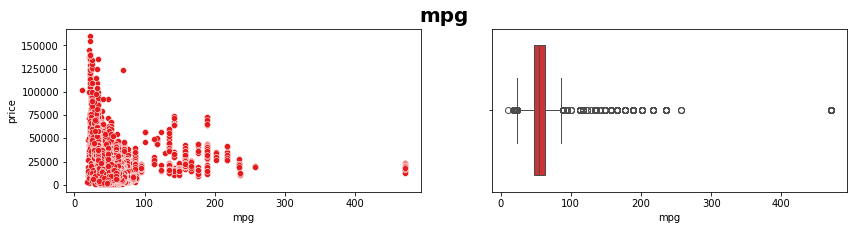

In [ ]:
xn_4 = 'mpg'

fig = plt.figure(figsize=(14, 3))
sns.set_palette("Set1")
plt.suptitle(xn_4, size=20, weight='bold')

plt.subplot(1, 2, 1)
sns.scatterplot(x=xn_4, y='price', data=df_1)

plt.subplot(1, 2, 2)
ax = sns.boxplot(x=xn_4, data=df_1)

**Interpretasi:** Hubungan mpg menunjukkan bahwa ada korelasi negatif antara harga mobil dan mpg, yang artinya bahwa ketika ukuran efisiensi kendaraan meningkat, harga cenderung menurun. Boxplot menunjukkan bahwa distribusi mpg condong ke kanan, dengan beberapa outlier di ujung skala yang lebih tinggi.

In [ ]:
len(df_1[df_1['mpg'] < 10])

0

**cek anomali fitur `milage`**

Mileage adalah jarak tempuh yang dihitung dalam mil atau kilometer sejak kendaraan pertama kali digunakan. Oleh karena itu, cukup sulit untuk menyimpulkan apakah data yang ada merupakan anomali, karena mungkin saja mobil tersebut hanya menempuh jarak yang sangat sedikit. Dalam kasus ini, akan dilakukan analisis lebih lanjut dengan mengidentifikasi distribusi mileage tersebut. Outlier pada kolom mileage masih dianggap wajar selama tidak kurang dari 0, tergantung pada frekuensi pemakaian kendaraan. Nilai terendah pada kolom mileage, yaitu 1, mungkin terjadi jika mobil masih baru atau jarang digunakan.

In [ ]:
show_outlier('mileage')

Data dianggap sebagai outlier apabila nilainya kurang dari -29377.875 atau lebih dari 69379.125 



,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
6,Audi,A6,2016,13250,Automatic,76788,Diesel,30.0,61.4,2.0
7,Audi,A4,2016,11750,Manual,75185,Diesel,20.0,70.6,2.0
40,Audi,A3,2015,11300,Manual,75619,Diesel,20.0,68.9,2.0
43,Audi,A5,2014,13200,Automatic,83872,Diesel,125.0,58.9,2.0
54,Audi,Q5,2015,14700,Automatic,89483,Diesel,205.0,47.1,2.0
...,...,...,...,...,...,...,...,...,...,...
102615,VW,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
102616,VW,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
102617,VW,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
102618,VW,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


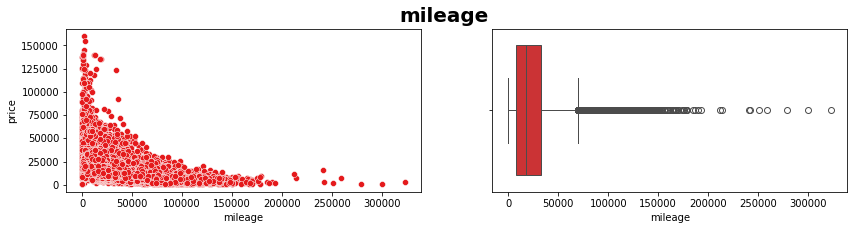

In [ ]:
xn_2 = 'mileage'

fig = plt.figure(figsize=(14, 3))
sns.set_palette("Set1")
plt.suptitle(xn_2, size=20, weight='bold')

plt.subplot(1, 2, 1)
sns.scatterplot(x=xn_2, y='price', data=df_1)

plt.subplot(1, 2, 2)
ax = sns.boxplot(x=xn_2, data=df_1)

**Interpretasi:** Hubungan jarak tempuh dengan harga mobil menunjukkan bahwa jarak tempuh berkorelasi negatif dengan harga. Semakin tinggi jarak tempuh, semakin rendah harganya. Ada outlier yang signifikan dengan jarak tempuh lebih dari 300.000.

**cek anomali fitur `tax`**

In [ ]:
df_1[df_1['tax'] == 0]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
30,Audi,A1,2015,9500,Automatic,54754,Diesel,0.0,76.3,1.6
50,Audi,A4,2016,12750,Manual,52561,Diesel,0.0,74.3,2.0
58,Audi,A3,2016,10200,Manual,66369,Diesel,0.0,83.1,1.6
60,Audi,A1,2013,7000,Manual,76269,Diesel,0.0,74.3,1.6
69,Audi,A1,2016,10800,Manual,18181,Petrol,0.0,67.3,1.0
...,...,...,...,...,...,...,...,...,...,...
102120,VW,Golf SV,2016,10550,Manual,16739,Diesel,0.0,72.4,1.6
102122,VW,Golf SV,2015,8950,Manual,45000,Diesel,0.0,72.4,1.6
102127,VW,Golf SV,2015,9695,Manual,21151,Diesel,0.0,72.4,1.6
102147,VW,Golf SV,2014,8650,Manual,32535,Diesel,0.0,72.4,1.6


Setelah mempelajari lebih lanjut, ditemukan bahwa nilai 0 pada kolom Tax dapat terjadi karena beberapa alasan. Pertama, pemerintah Inggris memberikan pembebasan pajak bagi kaum disabilitas. Selain itu, kendaraan dengan tipe bahan bakar listrik (electric) juga dibebaskan dari pajak hingga April tahun 2025. Mobil yang diproduksi sebelum April 2017 dengan emisi karbon hingga 100g/km juga mendapatkan pembebasan pajak. Sementara itu, mobil yang diproduksi setelah April 2017, dengan tipe bahan bakar hybrid atau lainnya, dan memiliki emisi karbon hingga 50g/km, juga diberikan pembebasan pajak oleh pemerintah Inggris. ['Source'](https://www.gov.uk/vehicle-exempt-from-vehicle-tax), ['Source 2'](https://www.honestjohn.co.uk/guides/cars-with-zero-road-tax/#:~:text=Buy%20a%20used%20car%20registered,a%20car%20with%20zero%20tax.)

In [ ]:
df_1[df_1['fuelType'].isin(['Electric'])]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
18815,BMW,i3,2017,18999,Automatic,20321,Electric,135.0,470.8,0.0
18840,BMW,i3,2016,18999,Automatic,9990,Electric,0.0,470.8,0.0
19275,BMW,i3,2015,17400,Automatic,29465,Electric,0.0,470.8,1.0
27567,Ford,Mondeo,2016,15975,Automatic,9396,Electric,0.0,67.3,2.0
33043,Ford,Mondeo,2016,15500,Automatic,24531,Electric,0.0,67.3,2.0
87377,Vauxhall,Ampera,2015,12999,Automatic,34461,Electric,0.0,235.4,1.4


data index ke-18815 menunjukkan tax sebesar 135 pounds, sehingga akan digantikan menjadi 0

In [ ]:
df_1.loc[18815, 'tax'] = 0.0

In [ ]:
df_1['tax'][df_1['fuelType'] == 'Electric'] = 0
df_1[df_1['fuelType'] == 'Electric']

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
18815,BMW,i3,2017,18999,Automatic,20321,Electric,0.0,470.8,0.0
18840,BMW,i3,2016,18999,Automatic,9990,Electric,0.0,470.8,0.0
19275,BMW,i3,2015,17400,Automatic,29465,Electric,0.0,470.8,1.0
27567,Ford,Mondeo,2016,15975,Automatic,9396,Electric,0.0,67.3,2.0
33043,Ford,Mondeo,2016,15500,Automatic,24531,Electric,0.0,67.3,2.0
87377,Vauxhall,Ampera,2015,12999,Automatic,34461,Electric,0.0,235.4,1.4


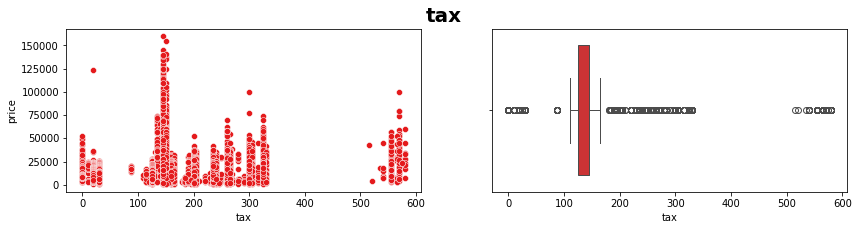

In [ ]:
xn_4 = 'tax'

fig = plt.figure(figsize=(14, 3))
sns.set_palette("Set1")
plt.suptitle(xn_4, size=20, weight='bold')

plt.subplot(1, 2, 1)
sns.scatterplot(x=xn_4, y='price', data=df_1)

plt.subplot(1, 2, 2)
ax = sns.boxplot(x=xn_4, data=df_1)

Hubungan antara harga mobil dan jumlah pajak yang dibayarkan, menunjukkan bahwa ada korelasi positif antara harga dan pajak. Tampaknya ada sedikit korelasi positif antara harga dan pajak, dengan mobil yang harganya lebih tinggi cenderung memiliki pajak yang lebih tinggi. Namun, ada juga banyak moibl dengan harga tinggi yang memiliki pajak rendah, dan sebaliknya. Analisa singkat bahwa terdapat beberapa mobil yang dikenakan tax lebih dari £500, dari kategori mobil tersebut kebanyakan diisi oleh mobil mewah seperti Ford mustang, Audi R8, Mercedes S Class, dan lain-lain. Mungkin tax diatas £500 itu khusus dikenakan pada mobil mewah saja. Outlier tersebut dibiarkan.


In [ ]:
tax_zero = df_1[df_1['tax'] == 0]
print(f'Jumlah tax yang memiliki value nol: {len(tax_zero)}')
tax_zero.head()

Jumlah tax yang memiliki value nol: 6321


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
30,Audi,A1,2015,9500,Automatic,54754,Diesel,0.0,76.3,1.6
50,Audi,A4,2016,12750,Manual,52561,Diesel,0.0,74.3,2.0
58,Audi,A3,2016,10200,Manual,66369,Diesel,0.0,83.1,1.6
60,Audi,A1,2013,7000,Manual,76269,Diesel,0.0,74.3,1.6
69,Audi,A1,2016,10800,Manual,18181,Petrol,0.0,67.3,1.0


In [ ]:
tax_without_0 = df_1[~df_1['tax'].isin([0])]
print(f'Jumlah tax yang tidak memiliki value nol: {len(tax_without_0)}')
tax_without_0.head()

Jumlah tax yang tidak memiliki value nol: 96262


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0


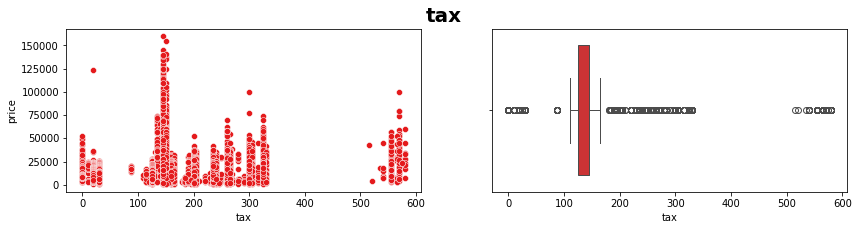

In [ ]:
xn_4 = 'tax'

fig = plt.figure(figsize=(14, 3))
sns.set_palette("Set1")
plt.suptitle(xn_4, size=20, weight='bold')

plt.subplot(1, 2, 1)
sns.scatterplot(x=xn_4, y='price', data=df_1)

plt.subplot(1, 2, 2)
ax = sns.boxplot(x=xn_4, data=df_1)

In [ ]:
# tax lebih dari 500
df_1[df_1['tax'] > 500].sort_values(by='price',ascending=False)

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
51696,Mercedes,G Class,2015,99850,Semi-Auto,10000,Petrol,570.0,20.5,5.5
51646,Mercedes,S Class,2016,79950,Semi-Auto,25317,Petrol,570.0,24.1,6.0
5908,Audi,R8,2016,79900,Semi-Auto,10172,Petrol,570.0,24.8,5.2
9969,Audi,R8,2016,74500,Automatic,28888,Petrol,570.0,24.1,5.2
7395,Audi,R8,2014,59990,Automatic,31930,Petrol,580.0,21.9,5.2
...,...,...,...,...,...,...,...,...,...,...
20796,BMW,5 Series,2006,4290,Automatic,97000,Petrol,565.0,29.7,2.5
46208,Mercedes,C Class,2007,3790,Automatic,99000,Petrol,555.0,28.8,2.5
46026,Hyundai,Santa Fe,2006,3490,Manual,71000,Petrol,555.0,28.8,2.4
57297,Mercedes,C Class,2006,3200,Automatic,86000,Petrol,565.0,28.2,3.5


In [ ]:
high_tax_data = df_1[df_1['tax'] > 500]

In [ ]:
high_tax_data['brand'].value_counts()

brand
Mercedes    70
Audi        40
BMW         40
Ford        12
VW           6
Vauxhall     5
Toyota       3
Hyundai      1
Name: count, dtype: int64

In [ ]:
high_tax_data_merc = high_tax_data[high_tax_data['brand'] == 'Mercedes']
high_tax_data_merc

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
46129,Mercedes,SL CLASS,2016,49948,Automatic,6200,Petrol,555.0,28.0,5.5
46179,Mercedes,SL CLASS,2010,16990,Automatic,18000,Petrol,555.0,29.1,3.5
46197,Mercedes,M Class,2008,5990,Automatic,110000,Diesel,555.0,28.8,3.0
46199,Mercedes,S Class,2014,41980,Automatic,26000,Petrol,555.0,28.0,5.5
46200,Mercedes,GL Class,2007,7340,Automatic,104000,Diesel,570.0,28.8,3.0
...,...,...,...,...,...,...,...,...,...,...
58651,Mercedes,C Class,2014,21495,Automatic,56444,Petrol,580.0,23.5,6.2
58822,Mercedes,M Class,2009,9990,Automatic,59000,Diesel,555.0,30.4,3.0
58921,Mercedes,S Class,2015,51990,Automatic,23156,Petrol,555.0,28.0,5.5
59603,Mercedes,C Class,2013,23000,Semi-Auto,43442,Petrol,575.0,23.0,6.2


In [ ]:
high_tax_data_merc.model.value_counts().head(5)

model
M Class     16
C Class     13
SL CLASS    10
S Class      8
G Class      4
Name: count, dtype: int64

**Interpretasi:**
Semua model dari Mercedes-Benz—M Class, C Class, SL Class, S Class, dan G Class—termasuk dalam kategori mobil mewah. Berikut penjelasan untuk masing-masing kelas:

- M Class (sekarang dikenal sebagai GLE Class): Ini adalah SUV mewah yang menawarkan kombinasi antara kenyamanan, performa, dan fitur teknologi canggih. Meskipun telah diganti namanya menjadi GLE, model ini tetap menjadi pilihan populer di segmen SUV mewah.

- C Class: Meskipun merupakan model entry-level di lini sedan Mercedes-Benz, C Class tetap menawarkan kemewahan dengan interior berkualitas tinggi, teknologi mutakhir, dan berbagai opsi mesin yang kuat. C Class dikenal sebagai salah satu model yang paling populer dan sering menjadi pilihan utama bagi mereka yang ingin merasakan kemewahan Mercedes-Benz.

- SL Class: SL Class adalah roadster mewah dengan performa tinggi. Dikenal karena desainnya yang elegan dan mesin bertenaga, SL Class menawarkan pengalaman berkendara yang luar biasa dengan sentuhan kemewahan klasik Mercedes-Benz.

- S Class: S Class adalah flagship dari Mercedes-Benz dan sering dianggap sebagai tolok ukur dalam segmen sedan mewah. Dikenal dengan inovasi teknologi, kenyamanan superior, dan performa yang luar biasa, S Class adalah salah satu mobil paling mewah dan dihormati di dunia otomotif.

- G Class: G Class atau G-Wagen adalah SUV mewah dengan desain yang ikonik dan kemampuan off-road yang luar biasa. Meski dirancang untuk medan yang sulit, G Class dilengkapi dengan interior mewah dan fitur teknologi terkini, menjadikannya salah satu SUV mewah paling eksklusif.

Secara keseluruhan, semua model ini mencerminkan kualitas, kenyamanan, dan teknologi yang tinggi, yang menjadi ciri khas dari merek Mercedes-Benz di segmen mobil mewah.

In [ ]:
high_tax_data_audi = high_tax_data[high_tax_data['brand'] == 'Audi']
high_tax_data_audi

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
371,Audi,RS4,2013,26995,Semi-Auto,28359,Petrol,565.0,26.4,4.2
1858,Audi,R8,2013,47995,Manual,19834,Petrol,570.0,19.6,4.2
2078,Audi,RS5,2014,23400,Semi-Auto,39210,Petrol,555.0,26.9,4.2
3805,Audi,RS4,2014,23491,Automatic,61892,Petrol,555.0,26.4,4.2
4102,Audi,RS6,2014,37000,Automatic,59894,Petrol,555.0,28.8,4.0
4415,Audi,RS4,2014,26490,Semi-Auto,58460,Petrol,555.0,26.4,4.2
4719,Audi,RS4,2014,24990,Semi-Auto,70823,Petrol,555.0,26.4,4.2
4920,Audi,RS6,2014,40990,Automatic,63476,Petrol,555.0,28.8,4.0
4929,Audi,R8,2014,51990,Semi-Auto,19800,Petrol,570.0,22.8,4.2
5001,Audi,R8,2013,54850,Semi-Auto,10800,Petrol,570.0,22.4,4.2


In [ ]:
high_tax_data_audi.model.value_counts().head(5)

model
R8     10
RS4     8
RS6     5
Q7      4
RS5     3
Name: count, dtype: int64

**Interpretasi:**
Audi RS6, RS4, Q7, dan RS5 semuanya termasuk dalam kategori mobil mewah. Mobil-mobil ini dikenal dengan performa tinggi, teknologi canggih, dan material interior yang berkualitas tinggi, yang merupakan ciri khas dari mobil-mobil mewah.

- Audi RS6: Sebuah mobil dengan performa tinggi, dikenal sebagai salah satu wagon paling bertenaga dengan mesin V8 twin-turbo. Selain performa, interiornya juga dilengkapi dengan teknologi canggih seperti layar sentuh dan material premium
).

- Audi RS4: Meski sedikit lebih kecil dibandingkan RS6, RS4 tetap menawarkan performa yang luar biasa dan interior yang mewah, menjadikannya salah satu pilihan terbaik di kelasnya.

- Audi Q7: Sebagai SUV, Q7 menawarkan ruang yang luas dengan kenyamanan dan fitur teknologi yang sangat canggih, menjadikannya pilihan SUV mewah yang populer.

- Audi RS5: Dikenal dengan desain sporty dan performa yang kuat, RS5 juga memiliki interior yang mewah dan teknologi mutakhir, yang mencakup berbagai fitur keselamatan dan kenyamanan.

Secara keseluruhan, keempat mobil ini jelas berada dalam kategori mobil mewah karena kombinasi antara performa, teknologi, dan kualitas material yang ditawarkan.

In [ ]:
high_tax_data_bmw = high_tax_data[high_tax_data['brand'] == 'BMW']
high_tax_data_bmw

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11674,BMW,M6,2016,35898,Semi-Auto,26642,Petrol,555.0,28.5,4.4
11755,BMW,M6,2016,36995,Semi-Auto,19000,Petrol,555.0,27.4,4.4
11770,BMW,M6,2015,34147,Semi-Auto,34017,Petrol,555.0,28.5,4.4
12671,BMW,X5,2016,41211,Semi-Auto,46180,Petrol,570.0,25.4,4.4
14808,BMW,X6,2016,44160,Semi-Auto,25684,Petrol,570.0,25.4,4.4
15167,BMW,M5,2015,24310,Semi-Auto,42932,Petrol,555.0,28.5,4.4
15316,BMW,X5,2014,27498,Automatic,28056,Petrol,555.0,26.9,4.4
15791,BMW,X6,2015,36950,Semi-Auto,22032,Petrol,570.0,25.4,4.4
16437,BMW,M5,2016,25999,Semi-Auto,49689,Petrol,565.0,28.5,4.4
16933,BMW,M5,2016,30181,Semi-Auto,26000,Petrol,565.0,28.5,4.4


In [ ]:
high_tax_data_bmw.model.value_counts().head(5)

model
M5          8
M6          7
X5          6
3 Series    5
M3          5
Name: count, dtype: int64

**Interpretasi:**

Secara keseluruhan, semua model ini mencerminkan nilai-nilai inti dari BMW dalam hal kemewahan, performa, dan teknologi canggih, menjadikannya bagian dari segmen mobil mewah.
- BMW M5: M5 adalah sedan sport mewah yang terkenal dengan performa tinggi dan teknologi canggih. Mobil ini menggabungkan kenyamanan khas BMW dengan kemampuan mesin yang sangat bertenaga, menjadikannya salah satu sedan sport mewah paling ikonik di dunia.
BMW M5, BMW M6, BMW X5, BMW 3 Series, BMW M3
- BMW M6: M6 adalah versi sport dari BMW Seri 6, yang menampilkan desain coupe atau convertible dengan performa luar biasa. Dikenal sebagai mobil mewah dengan kemampuan sport yang kuat, M6 menawarkan pengalaman berkendara yang mewah dan dinamis.

- BMW X5: X5 adalah SUV mewah yang menawarkan kombinasi antara ruang, kenyamanan, dan teknologi. Sebagai salah satu SUV mewah pertama di dunia, X5 tetap menjadi pilihan populer di segmen SUV premium, dengan fokus pada kenyamanan penumpang dan performa.

- BMW 3 Series: Meskipun 3 Series adalah model entry-level di lini sedan BMW, model ini tetap menawarkan berbagai fitur mewah dan teknologi yang canggih. 3 Series telah lama menjadi simbol dari keseimbangan antara kenyamanan, performa, dan kemewahan.

- BMW M3: M3 adalah versi sport dari BMW 3 Series, menawarkan performa yang luar biasa dengan handling yang tajam dan akselerasi yang kuat. M3 dikenal sebagai salah satu sedan sport paling dihormati dan termasuk dalam kategori mobil mewah karena kualitas dan performanya.

In [ ]:
high_tax_data_ford = high_tax_data[high_tax_data['brand'] == 'Ford']
high_tax_data_ford

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
21576,Ford,Mustang,2016,24999,Semi-Auto,42086,Petrol,570.0,23.5,5.0
24354,Ford,Mustang,2017,27890,Semi-Auto,26452,Petrol,580.0,23.5,5.0
24584,Ford,Mustang,2017,28000,Semi-Auto,23179,Petrol,570.0,23.5,5.0
24874,Ford,Mustang,2016,26475,Manual,12000,Petrol,570.0,20.9,5.0
27320,Ford,Mustang,2016,27999,Semi-Auto,26104,Petrol,570.0,20.8,5.0
30932,Ford,Mustang,2016,28490,Automatic,18500,Petrol,570.0,23.5,5.0
32190,Ford,Mustang,2016,27925,Manual,11600,Petrol,580.0,20.9,5.0
33483,Ford,Mustang,2017,28000,Semi-Auto,8470,Petrol,570.0,23.5,5.0
34813,Ford,Kuga,2012,9490,Automatic,56384,Petrol,555.0,27.4,2.5
35975,Ford,Kuga,2012,8150,Automatic,69382,Petrol,555.0,27.4,2.5


In [ ]:
high_tax_data_ford.model.value_counts().head(5)

model
Mustang    8
Kuga       3
S-MAX      1
Name: count, dtype: int64

**Interpretasi:**

Ford Mustang adalah sebuah mobil sport ikonik yang dikenal dengan performanya, yang dikategorikan sebagai mobil sport atau muscle car. Sedangkan kuga dan S-MAX memiliki engine size yang tinggi.

In [ ]:
kuga_high_tax = high_tax_data_ford[high_tax_data_ford['model'].isin(['Kuga'])]
kuga_high_tax

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
34813,Ford,Kuga,2012,9490,Automatic,56384,Petrol,555.0,27.4,2.5
35975,Ford,Kuga,2012,8150,Automatic,69382,Petrol,555.0,27.4,2.5
38378,Ford,Kuga,2011,7499,Manual,56000,Petrol,555.0,28.5,2.5


In [ ]:
model_kuga_data = df_1[df_1['model'].isin(['Kuga'])]

In [ ]:
 model_kuga_data[
        (model_kuga_data['fuelType'] == 'Petrol') &
        (model_kuga_data['engineSize'] > 2) &
        (model_kuga_data['engineSize'] < 3)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
34813,Ford,Kuga,2012,9490,Automatic,56384,Petrol,555.0,27.4,2.5
35975,Ford,Kuga,2012,8150,Automatic,69382,Petrol,555.0,27.4,2.5
38378,Ford,Kuga,2011,7499,Manual,56000,Petrol,555.0,28.5,2.5


In [ ]:
df_1[df_1['model'].isin(['S-MAX']) & (df_1['engineSize'] >= 2)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
21271,Ford,S-MAX,2017,18495,Automatic,39605,Diesel,145.0,54.3,2.0
21279,Ford,S-MAX,2017,17498,Manual,17051,Diesel,150.0,56.5,2.0
21444,Ford,S-MAX,2020,34498,Semi-Auto,4623,Diesel,145.0,43.5,2.0
21571,Ford,S-MAX,2019,22489,Manual,8224,Diesel,145.0,56.5,2.0
21572,Ford,S-MAX,2019,22489,Manual,4000,Diesel,145.0,56.5,2.0
...,...,...,...,...,...,...,...,...,...,...
38802,Ford,S-MAX,2007,2400,Manual,144000,Diesel,240.0,44.1,2.0
38857,Ford,S-MAX,2019,25000,Automatic,13200,Diesel,145.0,53.3,2.0
38898,Ford,S-MAX,2020,30000,Automatic,1000,Diesel,145.0,43.5,2.0
38968,Ford,S-MAX,2016,15499,Semi-Auto,32027,Diesel,145.0,52.3,2.0


In [ ]:
high_tax_data_vw = high_tax_data[high_tax_data['brand'] == 'VW']
high_tax_data_vw

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92768,VW,Golf,2008,7995,Manual,99906,Petrol,570.0,26.2,3.2
99605,VW,Sharan,2006,4990,Manual,38511,Petrol,555.0,29.1,2.0
100949,VW,Touareg,2008,5950,Automatic,119000,Diesel,570.0,28.5,3.0
101266,VW,Touareg,2007,7495,Automatic,122965,Diesel,580.0,26.9,3.0
101288,VW,Touareg,2009,8995,Automatic,111000,Diesel,555.0,28.5,3.0
101289,VW,Touareg,2007,6000,Automatic,105000,Diesel,570.0,26.9,3.0


VW Touareg: Ini adalah SUV premium dari VW yang mendekati kategori mobil mewah. Touareg dirancang untuk bersaing dengan SUV mewah dari merek lain seperti Audi Q7 atau BMW X5, dan dilengkapi dengan banyak fitur canggih dan material interior berkualitas tinggi. Jadi, VW Touareg bisa dianggap sebagai mobil mewah. Sedangkan model sharan dan Golf memiliki engine size yang tinggi.

In [ ]:
model_sharan_data = df_1[df_1['model'].isin(['Sharan'])]
model_sharan_data

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99363,VW,Sharan,2019,19299,Automatic,15798,Diesel,145.0,42.2,2.0
99364,VW,Sharan,2018,23000,Automatic,13616,Diesel,145.0,54.3,2.0
99365,VW,Sharan,2017,19500,Semi-Auto,28000,Diesel,145.0,54.3,2.0
99366,VW,Sharan,2019,18899,Automatic,13524,Diesel,145.0,42.2,2.0
99367,VW,Sharan,2019,25995,Semi-Auto,11608,Diesel,145.0,41.5,2.0
...,...,...,...,...,...,...,...,...,...,...
99616,VW,Sharan,2011,4440,Manual,131000,Diesel,165.0,50.4,2.0
99617,VW,Sharan,2016,19995,Manual,3854,Diesel,150.0,56.5,2.0
99618,VW,Sharan,2019,28495,Automatic,2500,Other,145.0,32.5,1.4
99619,VW,Sharan,2013,11350,Automatic,43100,Diesel,165.0,49.6,2.0


In [ ]:
model_golf_data = df_1[df_1['model'].isin(['Golf'])]
model_golf_data

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
88407,VW,Golf,2019,17000,Manual,8000,Diesel,145.0,57.7,1.6
88408,VW,Golf,2019,36000,Automatic,4000,Petrol,145.0,32.8,2.0
88409,VW,Golf,2015,19390,Automatic,20031,Petrol,200.0,40.4,2.0
88410,VW,Golf,2019,16290,Automatic,14821,Petrol,145.0,44.8,1.0
88411,VW,Golf,2017,16491,Automatic,20693,Petrol,20.0,60.1,1.4
...,...,...,...,...,...,...,...,...,...,...
93199,VW,Golf,2015,11750,Manual,79000,Diesel,20.0,67.3,2.0
93200,VW,Golf,2016,11950,Automatic,41725,Petrol,30.0,53.3,1.4
93201,VW,Golf,2017,12950,Automatic,44837,Diesel,20.0,67.3,2.0
93202,VW,Golf,2014,11299,Manual,25495,Petrol,30.0,53.3,1.4


In [ ]:
model_golf_data[model_golf_data['engineSize'] > 3]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
88455,VW,Golf,2003,12450,Manual,62000,Petrol,325.0,24.6,3.2
92768,VW,Golf,2008,7995,Manual,99906,Petrol,570.0,26.2,3.2


In [ ]:
df_1.iloc[92768:92769, :]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92768,VW,Golf,2008,7995,Manual,99906,Petrol,570.0,26.2,3.2


In [ ]:
model_sharan_data[model_sharan_data['fuelType'] == 'Petrol']

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99377,VW,Sharan,2018,21498,Manual,5559,Petrol,145.0,35.3,1.4
99384,VW,Sharan,2019,18998,Manual,15772,Petrol,145.0,35.8,1.4
99385,VW,Sharan,2018,20798,Manual,7721,Petrol,145.0,35.3,1.4
99392,VW,Sharan,2019,21998,Manual,9911,Petrol,145.0,35.3,1.4
99413,VW,Sharan,2018,22499,Semi-Auto,13248,Petrol,145.0,42.8,1.4
99416,VW,Sharan,2019,26995,Semi-Auto,3000,Petrol,145.0,32.5,1.4
99418,VW,Sharan,2019,27990,Semi-Auto,998,Petrol,145.0,32.5,1.4
99419,VW,Sharan,2018,21421,Semi-Auto,19140,Petrol,145.0,32.5,1.4
99420,VW,Sharan,2017,18998,Manual,26065,Petrol,145.0,44.1,1.4
99423,VW,Sharan,2019,27991,Semi-Auto,50,Petrol,145.0,32.5,1.4


In [ ]:
high_tax_data_vauxhall = high_tax_data[high_tax_data['brand'] == 'Vauxhall']
high_tax_data_vauxhall

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
84938,Vauxhall,Zafira,2009,6495,Manual,75914,Petrol,555.0,29.4,2.0
86349,Vauxhall,Antara,2007,2999,Automatic,99500,Diesel,565.0,32.8,2.0
87202,Vauxhall,Insignia,2012,9999,Manual,48490,Petrol,555.0,25.9,2.8
87244,Vauxhall,Insignia,2011,8449,Manual,63978,Petrol,555.0,26.6,2.8
87251,Vauxhall,Insignia,2017,16399,Manual,39450,Petrol,555.0,26.6,2.8


**Interpretasi:**
- Ketiga model tersebut memiliki enginesize yang tinggi
- Vauxhall Zafira: Zafira adalah MPV (Multi-Purpose Vehicle) yang dirancang untuk keluarga. Meskipun memiliki fitur kenyamanan - Vauxhall Antara: Antara adalah SUV yang lebih ditujukan untuk pasar mainstream dan tidak memiliki banyak fitur mewah yang sering ditemukan di SUV premium. Meskipun menawarkan ruang dan kenyamanan, Antara tidak berada dalam kategori mobil mewah.
- Vauxhall Insignia: Insignia adalah sedan menengah yang menawarkan desain yang menarik dan fitur teknologi yang baik. Namun, meskipun ada versi yang lebih premium seperti Insignia Grand Sport, model ini tetap berada dalam segmen kendaraan mainstream dan tidak sepenuhnya dianggap sebagai mobil mewah.

In [ ]:
model_zafira_data = df_1[df_1['model'].isin(['Zafira'])]
model_antara_data = df_1[df_1['model'].isin(['Antara'])]
model_insignia_data = df_1[df_1['model'].isin(['Insignia'])]

In [ ]:
model_zafira_data.groupby(['transmission', 'fuelType', 'year'])['tax'].median()

transmission  fuelType  year
Automatic     Diesel    2010    305.0
                        2013    200.0
                        2014    200.0
                        2015    200.0
                        2016    200.0
                        2017    200.0
                        2019    205.0
              Petrol    2013    200.0
                        2014    190.0
                        2015    235.0
                        2016    200.0
                        2017    200.0
                        2018    145.0
Manual        Diesel    2006    220.0
                        2009    205.0
                        2011    145.0
                        2012    145.0
                        2013    145.0
                        2014    145.0
                        2015    145.0
                        2016     30.0
                        2017    145.0
              Petrol    2002    300.0
                        2003    260.0
                        2005    265.0
                     

In [ ]:
model_antara_data.groupby(['transmission', 'fuelType', 'year'])['tax'].median()

transmission  fuelType  year
Automatic     Diesel    2007    565.0
                        2012    325.0
Manual        Diesel    2007    300.0
                        2008    300.0
                        2009    305.0
                        2012    235.0
                        2013    235.0
                        2014    235.0
                        2015    240.0
Semi-Auto     Diesel    2013    330.0
                        2014    330.0
Name: tax, dtype: float64

In [ ]:
model_insignia_data.groupby(['transmission', 'fuelType', 'engineSize'])['tax'].median()

transmission  fuelType  engineSize
Automatic     Diesel    1.6           145.0
                        2.0           145.0
              Petrol    1.5           145.0
                        1.6           145.0
Manual        Diesel    0.0           147.5
                        1.6            20.0
                        2.0           145.0
              Petrol    0.0           145.0
                        1.4           125.0
                        1.5           145.0
                        1.6           145.0
                        1.8           205.0
                        2.0           305.0
                        2.8           555.0
Name: tax, dtype: float64

In [ ]:
high_tax_data_vauxhall

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
84938,Vauxhall,Zafira,2009,6495,Manual,75914,Petrol,555.0,29.4,2.0
86349,Vauxhall,Antara,2007,2999,Automatic,99500,Diesel,565.0,32.8,2.0
87202,Vauxhall,Insignia,2012,9999,Manual,48490,Petrol,555.0,25.9,2.8
87244,Vauxhall,Insignia,2011,8449,Manual,63978,Petrol,555.0,26.6,2.8
87251,Vauxhall,Insignia,2017,16399,Manual,39450,Petrol,555.0,26.6,2.8


Maka akan diganti dengan nilai median berdasarkan transmisi, fuelType, dan year

In [ ]:
## Ganti value tax dari 5 data dengan tax yang tinggi tersebut secara manual

df_1.loc[84938, 'tax'] = 377.5
df_1.loc[87202, 'engineSize'] = 2.1
df_1.loc[87244, 'engineSize'] = 2.5
df_1.loc[87251, 'engineSize'] = 2.1

In [ ]:
high_tax_data_toyota = high_tax_data[high_tax_data['brand'] == 'Toyota']
high_tax_data_toyota

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74382,Toyota,Land Cruiser,2008,6950,Automatic,174419,Diesel,565.0,31.4,3.0
74392,Toyota,Land Cruiser,2006,7240,Automatic,113000,Diesel,555.0,31.4,3.0
74394,Toyota,Land Cruiser,2014,44990,Automatic,60000,Diesel,540.0,29.7,4.5


Kualitas dan Fitur: Land Cruiser dikenal dengan kualitas konstruksi yang sangat baik, teknologi mutakhir, dan fitur kenyamanan yang canggih. Interiornya sering dilengkapi dengan material premium, sistem hiburan yang modern, dan fitur keselamatan yang lengkap.

Kemampuan Off-Road: Meskipun merupakan SUV mewah, Land Cruiser juga memiliki kemampuan off-road yang luar biasa, menjadikannya pilihan yang populer di kalangan pengemudi yang membutuhkan kendaraan yang dapat diandalkan di berbagai kondisi jalan​(
carwow.co.uk
) .

Reputasi dan Harga: Land Cruiser sering kali dijual dengan harga yang lebih tinggi dibandingkan SUV lainnya, yang juga menambah statusnya sebagai mobil mewah. Selain itu, reputasi Toyota Land Cruiser sebagai kendaraan yang tahan lama dan dapat diandalkan juga meningkatkan daya tariknya di pasar mobil mewah .

In [ ]:
high_tax_data_hyundai = high_tax_data[high_tax_data['brand'] == 'Hyundai']
high_tax_data_hyundai

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
46026,Hyundai,Santa Fe,2006,3490,Manual,71000,Petrol,555.0,28.8,2.4


In [ ]:
model_santafe_data = df_1[df_1['model'].isin(['Santa Fe'])]
model_santafe_data

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
41467,Hyundai,Santa Fe,2014,15500,Automatic,37006,Diesel,265.0,41.5,2.2
41486,Hyundai,Santa Fe,2017,18999,Automatic,20599,Diesel,150.0,42.8,2.2
41527,Hyundai,Santa Fe,2019,34998,Semi-Auto,4133,Diesel,145.0,39.2,2.2
41528,Hyundai,Santa Fe,2019,34998,Semi-Auto,4956,Diesel,145.0,39.2,2.2
41537,Hyundai,Santa Fe,2017,15998,Manual,48034,Diesel,205.0,47.1,2.2
...,...,...,...,...,...,...,...,...,...,...
46068,Hyundai,Santa Fe,2019,32995,Semi-Auto,3920,Diesel,145.0,39.2,2.2
46087,Hyundai,Santa Fe,2019,35995,Semi-Auto,6918,Diesel,145.0,39.2,2.2
46089,Hyundai,Santa Fe,2019,35985,Automatic,100,Diesel,145.0,39.2,2.2
46100,Hyundai,Santa Fe,2018,20985,Automatic,31123,Diesel,145.0,42.8,2.2


In [ ]:
model_santafe_data.sort_values(by='engineSize', ascending=False)

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
46026,Hyundai,Santa Fe,2006,3490,Manual,71000,Petrol,555.0,28.8,2.4
45975,Hyundai,Santa Fe,2002,1200,Manual,94000,Petrol,325.0,30.4,2.4
41467,Hyundai,Santa Fe,2014,15500,Automatic,37006,Diesel,265.0,41.5,2.2
44713,Hyundai,Santa Fe,2019,33950,Automatic,6813,Diesel,145.0,39.2,2.2
44817,Hyundai,Santa Fe,2017,17995,Manual,30956,Diesel,200.0,47.1,2.2
...,...,...,...,...,...,...,...,...,...,...
43122,Hyundai,Santa Fe,2018,20250,Manual,7781,Diesel,145.0,47.1,2.2
43142,Hyundai,Santa Fe,2019,31390,Semi-Auto,13675,Diesel,150.0,39.8,2.2
43157,Hyundai,Santa Fe,2015,16990,Semi-Auto,46045,Diesel,265.0,42.2,2.2
43195,Hyundai,Santa Fe,2015,14500,Semi-Auto,54000,Diesel,265.0,42.2,2.2


In [ ]:
df_1

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
102578,VW,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
102579,VW,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
102580,VW,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
102581,VW,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


In [ ]:
# df_1 = df_1.drop(['tax'], axis=1)

**cek anomali fitur `engineSize`**

Baris yang memiliki nilai engineSize 0 dianggap anomaly karena tidak mungkin sebuah mobil memiliki kapasitas mesin sebesar 0. Oleh karena itu, baris yang memiliki nilai engineSize 0 akan di drop karena jumlahnya yang tidak terlalu banyak.

In [ ]:
df_2 = df_1.copy()

In [ ]:
# Count Percentage enginesize of zero
count_zero_es = len(df_2[df_2['engineSize']==0])
total_rows_zero_es = len(df_2)
percentage_zero_es = (count_zero_es / total_rows_zero_es) * 100
print('Persentase engineSize dengan nilai nol adalah {:.2f}%'.format(percentage_zero_es))

Persentase engineSize dengan nilai nol adalah 0.27%


In [ ]:
df_2[(df_2['fuelType'] != 'Electric') & (df_2['engineSize'] == 0)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7425,Audi,Q5,2019,44790,Automatic,5886,Petrol,135.0,117.7,0.0
7426,Audi,Q3,2019,32788,Automatic,1500,Diesel,145.0,47.1,0.0
7436,Audi,Q3,2020,29944,Manual,1500,Petrol,145.0,40.9,0.0
7437,Audi,Q3,2020,33333,Automatic,1500,Diesel,145.0,47.1,0.0
7438,Audi,Q3,2020,29944,Automatic,1500,Petrol,145.0,32.5,0.0
...,...,...,...,...,...,...,...,...,...,...
99148,VW,Tiguan,2016,15300,Manual,38398,Diesel,145.0,53.3,0.0
99155,VW,Tiguan,2018,24000,Automatic,22200,Diesel,145.0,47.9,0.0
100281,VW,Up,2017,8500,Manual,20324,Petrol,20.0,64.2,0.0
100339,VW,Up,2017,8000,Manual,24444,Petrol,20.0,60.1,0.0


In [ ]:
df_1[(df_1['engineSize']==0) & (df_1['fuelType'] == 'Electric')].head(30)

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
18815,BMW,i3,2017,18999,Automatic,20321,Electric,0.0,470.8,0.0
18840,BMW,i3,2016,18999,Automatic,9990,Electric,0.0,470.8,0.0


In [ ]:
len(df_2[(df_2['engineSize']==0) & (df_2['fuelType'] != 'Electric')])

272

Terlihat bahwa terdapat 272 baris non electric yang memiliki engineSize yang bernilai 0, dan berdasarkan referensi berikut, engine size atau kapasitas mesin suatu kendaraan tidak mungkin bernilai 0, terlebih lagi jika kendaraan itu menggunakan repulsi atau dorongan dari mesin berbahan bakar Petrol atau Diesel. Untuk itu engineSize yang bernilai 0 ini akan diisi dengan Median dari masing-masing model kendaraan. ['source'](https://www.carwow.co.uk/guides/choosing/what-engine-size-do-i-need-0521#gref)

In [ ]:
# Menghitung nilai median engineSize berdasarkan model, transmission, dan fuelType untuk mobil non-listrik dan non-hybrid
median_engine_non_electric_hybrid = df_2[(df_2['fuelType'] != 'Electric') | (df_2['fuelType'] != 'Hybrid')].groupby(['model', 'transmission', 'fuelType'])['engineSize'].median().reset_index()

# Menggabungkan dataframe asli dengan nilai median non-listrik dan non-hybrid
df_2 = pd.merge(df_2, median_engine_non_electric_hybrid, on=['model', 'transmission', 'fuelType'], how='left', suffixes=('', '_median'))

# Menggantikan engineSize bernilai 0 dengan nilai mediannya, hanya jika fuelType bukan 'Electric' dan bukan 'Hybrid'
df_2['engineSize'] = df_2.apply(
    lambda row: row['engineSize_median'] if row['engineSize'] == 0 and row['fuelType'] not in ['Electric', 'Hybrid'] else row['engineSize'], axis=1
)

# Menghapus kolom median setelah penggantian selesai
df_2.drop(columns=['engineSize_median'], inplace=True)

In [ ]:
len(df_2[(df_2['engineSize']==0) & (df_2['fuelType'] != 'Electric')])

40

In [ ]:
df_2[(df_2['engineSize'] == 0) & (~df_2['fuelType'].isin(['Electric','Hybrid']))]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
55530,Mercedes,GLA Class,2016,18700,Other,30895,Other,125.0,56.5,0.0
57214,Mercedes,230,2007,4500,Automatic,94000,Petrol,520.0,29.4,0.0


Masih terdapat 2 data anomali yang akan diisi secara manual. Setelah mencari referensi, didapatkan data sebagai berikut :

Merc GLA Class tahun 2016 memiliki engineSize 2.0 <br>
Merc 230 tahun 2007 transmisi Automatic dan fuelType Petrol memiliki engineSize 2.5

In [ ]:
df_merc_gla = df_2[df_2['model'] == 'GLA Class']
df_merc_230 = df_2[df_2['model'] == '230']

In [ ]:
df_merc_gla.groupby(['model', 'year'])['engineSize'].agg('median')

model      year
GLA Class  2014    2.1
           2015    2.1
           2016    2.1
           2017    2.1
           2018    2.1
           2019    2.1
           2020    1.6
Name: engineSize, dtype: float64

In [ ]:
df_merc_230.groupby(['model'])['engineSize'].agg('median')

model
230    0.0
Name: engineSize, dtype: float64

Masih terdapat 2 data anomali yang akan diisi menggunakan median berdasarkan model dan tahun. Setelah mencari referensi, didapatkan data sebagai berikut :

Merc GLA Class tahun 2016 memiliki median engineSize 2.1 <br>
Merc 230 tahun 2007 transmisi Automatic dan fuelType Petrol memiliki engineSize 2.5

In [ ]:
df_2[(df_2['engineSize'] == 0) & (~df_2['fuelType'].isin(['Electric','Hybrid']))]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
55530,Mercedes,GLA Class,2016,18700,Other,30895,Other,125.0,56.5,0.0
57214,Mercedes,230,2007,4500,Automatic,94000,Petrol,520.0,29.4,0.0


In [ ]:
## Ganti value engineSize dari sisa 2 data anomali tersebut secara manual

df_2.loc[55530, 'engineSize'] = 2.1
df_2.loc[57214, 'engineSize'] = 2.5

In [ ]:
df_2.iloc[[55530, 57214], :]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
55530,Mercedes,GLA Class,2016,18700,Other,30895,Other,125.0,56.5,2.1
57214,Mercedes,230,2007,4500,Automatic,94000,Petrol,520.0,29.4,2.5


In [ ]:
len(df_2[(df_2['engineSize']==0) & (df_2['fuelType'] != 'Electric')])

38

In [ ]:
len(df_2[(df_2['engineSize']==0)])

40

Menghapus data dengan enginesize bernilai nol dan fueltyoe bukan electric

In [ ]:
df_2 = df_2[(df_2['engineSize']!=0) & (df_2['fuelType'] != 'Electric')]
df_2 = df_2.reset_index(drop=True)

**cek anomali fitur `transmission`**

Pada kolom 'transmission', kategori yang dianggap sebagai anomaly adalah kategori yang bukan merupakan tipe gearbox dari suatu mobil.

In [ ]:
df_2['transmission'].value_counts()
#tidak ada anomaly

transmission
Manual       57621
Semi-Auto    23656
Automatic    21253
Other            9
Name: count, dtype: int64

In [ ]:
df_2[df_2['transmission'] == 'Other'].index

Index([45970, 45992, 55491, 58588, 67566, 70152, 80790, 81399, 81502], dtype='int64')

In [ ]:
print(f"""
Value pada feature transmisi adalah {df_2['transmission'].unique().tolist()}
Jumlah value other pada data adalah {len(df_2[df_2['transmission'] == 'Other'])}
""")


Value pada feature transmisi adalah ['Manual', 'Automatic', 'Semi-Auto', 'Other']
Jumlah value other pada data adalah 9



In [ ]:
# Menampilkan mobil dengan `Transmission` bernilai Other
subset_df = df_2[df_2['transmission'] == 'Other']
print('Before Cleansing:')
display(subset_df)

Before Cleansing:


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
45970,Hyundai,Ioniq,2017,12495,Other,27779,Hybrid,0.0,78.5,1.6
45992,Hyundai,Tucson,2017,16995,Other,25915,Petrol,145.0,39.8,1.6
55491,Mercedes,GLA Class,2016,18700,Other,30895,Other,125.0,56.5,2.1
58588,Mercedes,SLK,2015,12995,Other,39000,Diesel,150.0,56.5,2.1
67566,Skoda,Scala,2019,15999,Other,3500,Petrol,145.0,47.1,1.0
70152,Toyota,Yaris,2015,12795,Other,16733,Hybrid,0.0,78.0,1.5
80790,Vauxhall,Mokka,2019,19995,Other,1450,Diesel,145.0,57.7,1.5
81399,Vauxhall,Mokka,2019,13499,Other,3000,Petrol,145.0,44.8,1.4
81502,Vauxhall,Mokka,2019,22499,Other,4500,Petrol,145.0,42.2,1.5


In [ ]:
df_2.iloc[45970:45970+1]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
45970,Hyundai,Ioniq,2017,12495,Other,27779,Hybrid,0.0,78.5,1.6


In [ ]:
def searching(indeks):
    print(f'Indeks ke-{indeks}')
    display(df_2.iloc[indeks:indeks+1])
    display(df_2[(df_2['brand'] == df_2.iloc[indeks]['brand']) &
                   (df_2['model'] == df_2.iloc[indeks]['model']) &
                   (df_2['fuelType'] == df_2.iloc[indeks]['fuelType']) &
                   (df_2['year'] == df_2.iloc[indeks]['year']) &
                   (df_2['mpg'] == df_2.iloc[indeks]['mpg']) &
                   (df_2['tax'] == df_2.iloc[indeks]['tax']) &
                   (df_2['engineSize'] == df_2.iloc[indeks]['engineSize']) &
                   (df_2['transmission'] != 'Other')])
    print('\n=========================================================================\n')

transmission_index = df_2[df_2['transmission'] == 'Other'].index
for i in transmission_index:
    searching(i)

Indeks ke-45970


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
45970,Hyundai,Ioniq,2017,12495,Other,27779,Hybrid,0.0,78.5,1.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
42009,Hyundai,Ioniq,2017,14795,Automatic,31490,Hybrid,0.0,78.5,1.6
42028,Hyundai,Ioniq,2017,14385,Semi-Auto,46899,Hybrid,0.0,78.5,1.6
42457,Hyundai,Ioniq,2017,15780,Automatic,22293,Hybrid,0.0,78.5,1.6
42479,Hyundai,Ioniq,2017,16495,Automatic,19096,Hybrid,0.0,78.5,1.6
42521,Hyundai,Ioniq,2017,15470,Automatic,14673,Hybrid,0.0,78.5,1.6
42887,Hyundai,Ioniq,2017,16000,Automatic,19542,Hybrid,0.0,78.5,1.6
43623,Hyundai,Ioniq,2017,16000,Automatic,19629,Hybrid,0.0,78.5,1.6
43643,Hyundai,Ioniq,2017,16999,Automatic,11062,Hybrid,0.0,78.5,1.6
44056,Hyundai,Ioniq,2017,14995,Automatic,23900,Hybrid,0.0,78.5,1.6
44387,Hyundai,Ioniq,2017,16999,Automatic,23289,Hybrid,0.0,78.5,1.6




Indeks ke-45992


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
45992,Hyundai,Tucson,2017,16995,Other,25915,Petrol,145.0,39.8,1.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
44027,Hyundai,Tucson,2017,17995,Automatic,6987,Petrol,145.0,39.8,1.6
44843,Hyundai,Tucson,2017,17095,Semi-Auto,19099,Petrol,145.0,39.8,1.6




Indeks ke-55491


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
55491,Mercedes,GLA Class,2016,18700,Other,30895,Other,125.0,56.5,2.1


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-58588


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
58588,Mercedes,SLK,2015,12995,Other,39000,Diesel,150.0,56.5,2.1


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
56167,Mercedes,SLK,2015,17900,Automatic,13000,Diesel,150.0,56.5,2.1
57381,Mercedes,SLK,2015,15599,Automatic,21680,Diesel,150.0,56.5,2.1




Indeks ke-67566


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67566,Skoda,Scala,2019,15999,Other,3500,Petrol,145.0,47.1,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
61671,Skoda,Scala,2019,15998,Semi-Auto,2355,Petrol,145.0,47.1,1.0
61912,Skoda,Scala,2019,18995,Automatic,1500,Petrol,145.0,47.1,1.0
61940,Skoda,Scala,2019,15985,Semi-Auto,95,Petrol,145.0,47.1,1.0
62097,Skoda,Scala,2019,20495,Semi-Auto,20,Petrol,145.0,47.1,1.0
62113,Skoda,Scala,2019,17995,Automatic,3200,Petrol,145.0,47.1,1.0
64014,Skoda,Scala,2019,15998,Semi-Auto,4169,Petrol,145.0,47.1,1.0
64227,Skoda,Scala,2019,15995,Automatic,1121,Petrol,145.0,47.1,1.0
65388,Skoda,Scala,2019,15899,Automatic,6000,Petrol,145.0,47.1,1.0
65963,Skoda,Scala,2019,15299,Semi-Auto,3000,Petrol,145.0,47.1,1.0
66492,Skoda,Scala,2019,16250,Semi-Auto,5000,Petrol,145.0,47.1,1.0




Indeks ke-70152


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70152,Toyota,Yaris,2015,12795,Other,16733,Hybrid,0.0,78.0,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68547,Toyota,Yaris,2015,9998,Automatic,49026,Hybrid,0.0,78.0,1.5
68558,Toyota,Yaris,2015,10895,Automatic,34012,Hybrid,0.0,78.0,1.5
68562,Toyota,Yaris,2015,10498,Automatic,29311,Hybrid,0.0,78.0,1.5
68581,Toyota,Yaris,2015,10998,Automatic,34802,Hybrid,0.0,78.0,1.5
68650,Toyota,Yaris,2015,11498,Automatic,15281,Hybrid,0.0,78.0,1.5
68687,Toyota,Yaris,2015,10498,Automatic,41321,Hybrid,0.0,78.0,1.5
68753,Toyota,Yaris,2015,11698,Automatic,21076,Hybrid,0.0,78.0,1.5
68764,Toyota,Yaris,2015,10495,Automatic,37774,Hybrid,0.0,78.0,1.5
68770,Toyota,Yaris,2015,9998,Automatic,29377,Hybrid,0.0,78.0,1.5
68826,Toyota,Yaris,2015,9290,Automatic,49063,Hybrid,0.0,78.0,1.5




Indeks ke-80790


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
80790,Vauxhall,Mokka,2019,19995,Other,1450,Diesel,145.0,57.7,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-81399


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
81399,Vauxhall,Mokka,2019,13499,Other,3000,Petrol,145.0,44.8,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-81502


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
81502,Vauxhall,Mokka,2019,22499,Other,4500,Petrol,145.0,42.2,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


Berdasarkan data di atas, diperoleh kemiripan berdasarkan beberapa fitur (model, merk, fuelType, tax, year, mpg, engineSize) adalah sebagai berikut.

-  ke-45970 : 'Automatic'
- Indeks ke-45992 : (delete)
- Indeks ke-55491 : (delete)
- Indeks ke-58588 : 'Automatic'
- Indeks ke-67566 : 'Semi-Auto'
- Indeks ke-70152 : 'Automatic'
- Indeks ke-80790 : (delete)
- Indeks ke-81399 : (delete)
- Indeks ke-81502 : (delete) <br>
Sementara itu, terdapat data yang tidak memiliki kemiripan berdasarkan beberapa fitur terkait. Untuk data tersebut diputuskan untuk didrop.

In [ ]:
df_2.iloc[[45970, 58588, 67566, 70152]]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
45970,Hyundai,Ioniq,2017,12495,Other,27779,Hybrid,0.0,78.5,1.6
58588,Mercedes,SLK,2015,12995,Other,39000,Diesel,150.0,56.5,2.1
67566,Skoda,Scala,2019,15999,Other,3500,Petrol,145.0,47.1,1.0
70152,Toyota,Yaris,2015,12795,Other,16733,Hybrid,0.0,78.0,1.5


In [ ]:
df_2.loc[45970, 'transmission'] = 'Automatic'
df_2.loc[58588, 'transmission'] = 'Automatic'
df_2.loc[67566, 'transmission'] = 'Semi-Auto'
df_2.loc[70152, 'transmission'] = 'Automatic'

In [ ]:
df_2.iloc[[45970, 58588, 67566, 70152]]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
45970,Hyundai,Ioniq,2017,12495,Automatic,27779,Hybrid,0.0,78.5,1.6
58588,Mercedes,SLK,2015,12995,Automatic,39000,Diesel,150.0,56.5,2.1
67566,Skoda,Scala,2019,15999,Semi-Auto,3500,Petrol,145.0,47.1,1.0
70152,Toyota,Yaris,2015,12795,Automatic,16733,Hybrid,0.0,78.0,1.5


In [ ]:
df_2.iloc[[45992, 55491, 80790, 81399, 81502]]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
45992,Hyundai,Tucson,2017,16995,Other,25915,Petrol,145.0,39.8,1.6
55491,Mercedes,GLA Class,2016,18700,Other,30895,Other,125.0,56.5,2.1
80790,Vauxhall,Mokka,2019,19995,Other,1450,Diesel,145.0,57.7,1.5
81399,Vauxhall,Mokka,2019,13499,Other,3000,Petrol,145.0,44.8,1.4
81502,Vauxhall,Mokka,2019,22499,Other,4500,Petrol,145.0,42.2,1.5


Karena data yang terbatas mengenai transmisi, maka akan didrop 5 baris tersisa dengan transmisi = 'Other'

In [ ]:
df_2 = df_2.drop([45992, 55491, 80790, 81399, 81502], axis=0)
df_2 = df_2.reset_index(drop=True)

**cek anomali fitur `fuelType`**

Pada kolom fueltype terdapat nilai diskrit yaitu other.Mobil dapat memiliki bahan bakar lain selain petrol diesel dan electric, seperti Liquefied Petrolleum Gas, Biofuels yang termasuk dalam kategori berbeda.Maka akan dianalsisi terlebih dahulu apakah others ini banyak atau tidak untuk memutuskan akan didrop atau tidak.

In [ ]:
df_2['fuelType'].value_counts()

fuelType
Petrol    56532
Diesel    42697
Hybrid     3058
Other       247
Name: count, dtype: int64

In [ ]:
import matplotlib.ticker as ticker

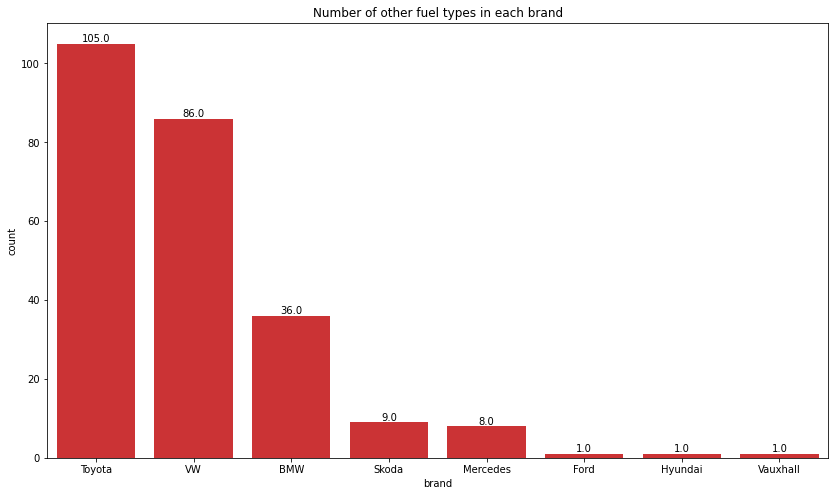

In [ ]:
plt.figure(figsize=(14, 8))
df_other = df_2.query("fuelType == 'Other'")
df_other_count = df_other.groupby('brand').size().reset_index(name='count').sort_values('count', ascending=False)
ax = sns.countplot(x='brand', data=df_2.query("fuelType == 'Other'"), order=df_other_count['brand'])
# memberikan label jumlah di dalam bar
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
# memberikan judul pada plot
plt.title('Number of other fuel types in each brand')
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
# menampilkan plot
plt.show()

Terdapat anomali value Other berjumlah 247 pada kolom fuelType yang harus diberikan perlakuan berdasarkan Domain Knowledge dengan kesalahan yang paling besar pada brand Toyota. Strategi yang akan dilakukan adalah melihat dari masing-masing brand

Terdapat 247 data yang pada kolom fuel Type yang berisi Other, walaupun data tersebut hanya 0.25% dari jumlah data. kami ingin melakukan melakukan analisis berdasarkan Domain Knowledge untuk mengganti nilai tersebut menjadi nilai yang tepat berdasarkan brand, engineSeize, dan modelnya.

Fungsi menampilkan karakteristik data yang hampir sama dengan fueltype Other

In [ ]:
def searching_2(indeks):
    print(f'Indeks ke-{indeks}')
    display(df_2.iloc[indeks:indeks+1])
    display(df_2[(df_2['brand'] == df_2.iloc[indeks]['brand']) &
                   (df_2['model'] == df_2.iloc[indeks]['model']) &
                   (df_2['transmission'] == df_2.iloc[indeks]['transmission']) &
                   (df_2['year'] == df_2.iloc[indeks]['year']) &
                   (df_2['mpg'] == df_2.iloc[indeks]['mpg']) &
                   (df_2['tax'] == df_2.iloc[indeks]['tax']) &
                   (df_2['engineSize'] == df_2.iloc[indeks]['engineSize']) &
                   (df_2['fuelType'] != 'Other')])
    print('\n=========================================================================\n')

fueltype_index = df_2[df_2['fuelType'] == 'Other'].index
for i in fueltype_index:
    searching_2(i)

Indeks ke-10581


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10581,BMW,3 Series,2017,14250,Automatic,55594,Other,135.0,148.7,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
18458,BMW,3 Series,2017,18500,Automatic,29130,Hybrid,135.0,148.7,2.0
18979,BMW,3 Series,2017,18499,Automatic,10501,Hybrid,135.0,148.7,2.0




Indeks ke-10597


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10597,BMW,i3,2016,17100,Automatic,25269,Other,0.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-10600


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10600,BMW,2 Series,2017,13000,Automatic,61818,Other,0.0,141.2,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16629,BMW,2 Series,2017,18490,Automatic,12941,Hybrid,0.0,141.2,1.5
17849,BMW,2 Series,2017,16400,Automatic,22124,Hybrid,0.0,141.2,1.5
19603,BMW,2 Series,2017,12000,Automatic,88100,Hybrid,0.0,141.2,1.5




Indeks ke-10651


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10651,BMW,2 Series,2017,16000,Automatic,32389,Other,0.0,141.2,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16629,BMW,2 Series,2017,18490,Automatic,12941,Hybrid,0.0,141.2,1.5
17849,BMW,2 Series,2017,16400,Automatic,22124,Hybrid,0.0,141.2,1.5
19603,BMW,2 Series,2017,12000,Automatic,88100,Hybrid,0.0,141.2,1.5




Indeks ke-10683


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10683,BMW,X5,2016,21000,Automatic,71626,Other,0.0,85.6,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10792,BMW,X5,2016,34498,Automatic,17303,Hybrid,0.0,85.6,2.0
12669,BMW,X5,2016,27852,Automatic,57501,Hybrid,0.0,85.6,2.0
14674,BMW,X5,2016,27495,Automatic,57908,Hybrid,0.0,85.6,2.0
15429,BMW,X5,2016,30990,Automatic,39469,Hybrid,0.0,85.6,2.0
18368,BMW,X5,2016,28299,Automatic,40732,Hybrid,0.0,85.6,2.0
18506,BMW,X5,2016,26000,Automatic,47026,Hybrid,0.0,85.6,2.0
18627,BMW,X5,2016,31499,Automatic,34367,Hybrid,0.0,85.6,2.0
18695,BMW,X5,2016,30850,Automatic,44316,Hybrid,0.0,85.6,2.0
18759,BMW,X5,2016,23699,Automatic,74765,Hybrid,0.0,85.6,2.0
19444,BMW,X5,2016,27499,Automatic,46720,Hybrid,0.0,85.6,2.0




Indeks ke-10703


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10703,BMW,3 Series,2017,17950,Automatic,43703,Other,140.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-10717


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10717,BMW,3 Series,2017,17000,Automatic,31501,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11248,BMW,3 Series,2017,17498,Automatic,58080,Hybrid,0.0,134.5,2.0
18748,BMW,3 Series,2017,14999,Automatic,78446,Hybrid,0.0,134.5,2.0
19004,BMW,3 Series,2017,19500,Automatic,35303,Hybrid,0.0,134.5,2.0
19338,BMW,3 Series,2017,18999,Automatic,24658,Hybrid,0.0,134.5,2.0
19961,BMW,3 Series,2017,20499,Automatic,14500,Hybrid,0.0,134.5,2.0
20138,BMW,3 Series,2017,14500,Automatic,74930,Hybrid,0.0,134.5,2.0
20161,BMW,3 Series,2017,15795,Automatic,64000,Hybrid,0.0,134.5,2.0




Indeks ke-17869


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17869,BMW,3 Series,2016,17500,Automatic,48000,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
14549,BMW,3 Series,2016,17547,Automatic,13969,Hybrid,0.0,134.5,2.0
15064,BMW,3 Series,2016,17250,Automatic,31561,Hybrid,0.0,134.5,2.0
18377,BMW,3 Series,2016,17850,Automatic,28702,Hybrid,0.0,134.5,2.0
18400,BMW,3 Series,2016,16699,Automatic,45089,Hybrid,0.0,134.5,2.0
18462,BMW,3 Series,2016,14022,Automatic,72820,Hybrid,0.0,134.5,2.0
18560,BMW,3 Series,2016,18439,Automatic,32731,Hybrid,0.0,134.5,2.0
18689,BMW,3 Series,2016,15300,Automatic,46626,Hybrid,0.0,134.5,2.0
18740,BMW,3 Series,2016,17532,Automatic,36157,Hybrid,0.0,134.5,2.0
18765,BMW,3 Series,2016,19399,Automatic,22317,Hybrid,0.0,134.5,2.0
18770,BMW,3 Series,2016,17980,Automatic,48947,Hybrid,0.0,134.5,2.0




Indeks ke-18553


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
18553,BMW,5 Series,2018,21940,Automatic,53519,Other,135.0,156.9,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13728,BMW,5 Series,2018,25450,Automatic,19486,Hybrid,135.0,156.9,2.0
19718,BMW,5 Series,2018,25999,Automatic,30972,Hybrid,135.0,156.9,2.0
19775,BMW,5 Series,2018,26495,Automatic,23640,Hybrid,135.0,156.9,2.0




Indeks ke-18597


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
18597,BMW,i3,2015,14940,Automatic,59000,Other,0.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-19009


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
19009,BMW,3 Series,2017,17000,Automatic,45000,Other,140.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-19027


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
19027,BMW,i3,2017,19300,Automatic,32867,Other,0.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-19152


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
19152,BMW,3 Series,2017,16600,Automatic,50000,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11248,BMW,3 Series,2017,17498,Automatic,58080,Hybrid,0.0,134.5,2.0
18748,BMW,3 Series,2017,14999,Automatic,78446,Hybrid,0.0,134.5,2.0
19004,BMW,3 Series,2017,19500,Automatic,35303,Hybrid,0.0,134.5,2.0
19338,BMW,3 Series,2017,18999,Automatic,24658,Hybrid,0.0,134.5,2.0
19961,BMW,3 Series,2017,20499,Automatic,14500,Hybrid,0.0,134.5,2.0
20138,BMW,3 Series,2017,14500,Automatic,74930,Hybrid,0.0,134.5,2.0
20161,BMW,3 Series,2017,15795,Automatic,64000,Hybrid,0.0,134.5,2.0




Indeks ke-19976


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
19976,BMW,3 Series,2017,16745,Automatic,50000,Other,135.0,148.7,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
18458,BMW,3 Series,2017,18500,Automatic,29130,Hybrid,135.0,148.7,2.0
18979,BMW,3 Series,2017,18499,Automatic,10501,Hybrid,135.0,148.7,2.0




Indeks ke-20137


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20137,BMW,3 Series,2016,14475,Automatic,78878,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
14549,BMW,3 Series,2016,17547,Automatic,13969,Hybrid,0.0,134.5,2.0
15064,BMW,3 Series,2016,17250,Automatic,31561,Hybrid,0.0,134.5,2.0
18377,BMW,3 Series,2016,17850,Automatic,28702,Hybrid,0.0,134.5,2.0
18400,BMW,3 Series,2016,16699,Automatic,45089,Hybrid,0.0,134.5,2.0
18462,BMW,3 Series,2016,14022,Automatic,72820,Hybrid,0.0,134.5,2.0
18560,BMW,3 Series,2016,18439,Automatic,32731,Hybrid,0.0,134.5,2.0
18689,BMW,3 Series,2016,15300,Automatic,46626,Hybrid,0.0,134.5,2.0
18740,BMW,3 Series,2016,17532,Automatic,36157,Hybrid,0.0,134.5,2.0
18765,BMW,3 Series,2016,19399,Automatic,22317,Hybrid,0.0,134.5,2.0
18770,BMW,3 Series,2016,17980,Automatic,48947,Hybrid,0.0,134.5,2.0




Indeks ke-20265


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20265,BMW,3 Series,2016,18990,Automatic,26000,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
14549,BMW,3 Series,2016,17547,Automatic,13969,Hybrid,0.0,134.5,2.0
15064,BMW,3 Series,2016,17250,Automatic,31561,Hybrid,0.0,134.5,2.0
18377,BMW,3 Series,2016,17850,Automatic,28702,Hybrid,0.0,134.5,2.0
18400,BMW,3 Series,2016,16699,Automatic,45089,Hybrid,0.0,134.5,2.0
18462,BMW,3 Series,2016,14022,Automatic,72820,Hybrid,0.0,134.5,2.0
18560,BMW,3 Series,2016,18439,Automatic,32731,Hybrid,0.0,134.5,2.0
18689,BMW,3 Series,2016,15300,Automatic,46626,Hybrid,0.0,134.5,2.0
18740,BMW,3 Series,2016,17532,Automatic,36157,Hybrid,0.0,134.5,2.0
18765,BMW,3 Series,2016,19399,Automatic,22317,Hybrid,0.0,134.5,2.0
18770,BMW,3 Series,2016,17980,Automatic,48947,Hybrid,0.0,134.5,2.0




Indeks ke-20332


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20332,BMW,i8,2015,37995,Automatic,48800,Other,0.0,134.5,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13429,BMW,i8,2015,42890,Automatic,43102,Hybrid,0.0,134.5,1.5
19254,BMW,i8,2015,44990,Automatic,43323,Hybrid,0.0,134.5,1.5




Indeks ke-20373


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20373,BMW,X5,2017,34999,Automatic,30000,Other,130.0,85.6,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20390


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20390,BMW,3 Series,2016,15495,Automatic,32000,Other,0.0,148.7,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
14491,BMW,3 Series,2016,14999,Automatic,70054,Hybrid,0.0,148.7,2.0
18824,BMW,3 Series,2016,17106,Automatic,22019,Hybrid,0.0,148.7,2.0
18923,BMW,3 Series,2016,16899,Automatic,15659,Hybrid,0.0,148.7,2.0
18970,BMW,3 Series,2016,15325,Automatic,20889,Hybrid,0.0,148.7,2.0
19156,BMW,3 Series,2016,16900,Automatic,38480,Hybrid,0.0,148.7,2.0
19296,BMW,3 Series,2016,14195,Automatic,56140,Hybrid,0.0,148.7,2.0
19771,BMW,3 Series,2016,16099,Automatic,40217,Hybrid,0.0,148.7,2.0
19792,BMW,3 Series,2016,11999,Automatic,92300,Hybrid,0.0,148.7,2.0
19840,BMW,3 Series,2016,14399,Automatic,68458,Hybrid,0.0,148.7,2.0
19946,BMW,3 Series,2016,13899,Automatic,62816,Hybrid,0.0,148.7,2.0




Indeks ke-20468


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20468,BMW,2 Series,2017,15000,Automatic,41419,Other,0.0,141.2,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
16629,BMW,2 Series,2017,18490,Automatic,12941,Hybrid,0.0,141.2,1.5
17849,BMW,2 Series,2017,16400,Automatic,22124,Hybrid,0.0,141.2,1.5
19603,BMW,2 Series,2017,12000,Automatic,88100,Hybrid,0.0,141.2,1.5




Indeks ke-20479


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20479,BMW,i3,2017,20000,Automatic,19178,Other,0.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20484


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20484,BMW,3 Series,2017,16400,Automatic,66782,Other,140.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20485


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20485,BMW,i3,2017,19500,Automatic,23956,Other,135.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20487


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20487,BMW,3 Series,2017,16700,Automatic,61968,Other,140.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20671


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20671,BMW,3 Series,2017,16000,Automatic,53055,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
11248,BMW,3 Series,2017,17498,Automatic,58080,Hybrid,0.0,134.5,2.0
18748,BMW,3 Series,2017,14999,Automatic,78446,Hybrid,0.0,134.5,2.0
19004,BMW,3 Series,2017,19500,Automatic,35303,Hybrid,0.0,134.5,2.0
19338,BMW,3 Series,2017,18999,Automatic,24658,Hybrid,0.0,134.5,2.0
19961,BMW,3 Series,2017,20499,Automatic,14500,Hybrid,0.0,134.5,2.0
20138,BMW,3 Series,2017,14500,Automatic,74930,Hybrid,0.0,134.5,2.0
20161,BMW,3 Series,2017,15795,Automatic,64000,Hybrid,0.0,134.5,2.0




Indeks ke-20709


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20709,BMW,3 Series,2017,15200,Automatic,41162,Other,135.0,148.7,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
18458,BMW,3 Series,2017,18500,Automatic,29130,Hybrid,135.0,148.7,2.0
18979,BMW,3 Series,2017,18499,Automatic,10501,Hybrid,135.0,148.7,2.0




Indeks ke-20723


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20723,BMW,i3,2016,17000,Automatic,41063,Other,0.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20747


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20747,BMW,3 Series,2017,15300,Automatic,39428,Other,0.0,148.7,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
19385,BMW,3 Series,2017,15349,Automatic,53347,Hybrid,0.0,148.7,2.0




Indeks ke-20809


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20809,BMW,3 Series,2017,15000,Automatic,36226,Other,140.0,148.7,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20839


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20839,BMW,3 Series,2017,16000,Automatic,47495,Other,135.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17858,BMW,3 Series,2017,20000,Automatic,29164,Hybrid,135.0,134.5,2.0
18324,BMW,3 Series,2017,21150,Automatic,17059,Hybrid,135.0,134.5,2.0
19426,BMW,3 Series,2017,18299,Automatic,32185,Hybrid,135.0,134.5,2.0
19651,BMW,3 Series,2017,15000,Automatic,85070,Hybrid,135.0,134.5,2.0
19837,BMW,3 Series,2017,19899,Automatic,28091,Hybrid,135.0,134.5,2.0




Indeks ke-20868


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20868,BMW,3 Series,2017,15900,Automatic,68875,Other,140.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20928


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20928,BMW,i3,2017,17600,Automatic,50867,Other,135.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-21019


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
21019,BMW,X5,2016,24500,Automatic,57605,Other,0.0,85.6,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10792,BMW,X5,2016,34498,Automatic,17303,Hybrid,0.0,85.6,2.0
12669,BMW,X5,2016,27852,Automatic,57501,Hybrid,0.0,85.6,2.0
14674,BMW,X5,2016,27495,Automatic,57908,Hybrid,0.0,85.6,2.0
15429,BMW,X5,2016,30990,Automatic,39469,Hybrid,0.0,85.6,2.0
18368,BMW,X5,2016,28299,Automatic,40732,Hybrid,0.0,85.6,2.0
18506,BMW,X5,2016,26000,Automatic,47026,Hybrid,0.0,85.6,2.0
18627,BMW,X5,2016,31499,Automatic,34367,Hybrid,0.0,85.6,2.0
18695,BMW,X5,2016,30850,Automatic,44316,Hybrid,0.0,85.6,2.0
18759,BMW,X5,2016,23699,Automatic,74765,Hybrid,0.0,85.6,2.0
19444,BMW,X5,2016,27499,Automatic,46720,Hybrid,0.0,85.6,2.0




Indeks ke-21050


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
21050,BMW,3 Series,2016,16500,Automatic,38438,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
14549,BMW,3 Series,2016,17547,Automatic,13969,Hybrid,0.0,134.5,2.0
15064,BMW,3 Series,2016,17250,Automatic,31561,Hybrid,0.0,134.5,2.0
18377,BMW,3 Series,2016,17850,Automatic,28702,Hybrid,0.0,134.5,2.0
18400,BMW,3 Series,2016,16699,Automatic,45089,Hybrid,0.0,134.5,2.0
18462,BMW,3 Series,2016,14022,Automatic,72820,Hybrid,0.0,134.5,2.0
18560,BMW,3 Series,2016,18439,Automatic,32731,Hybrid,0.0,134.5,2.0
18689,BMW,3 Series,2016,15300,Automatic,46626,Hybrid,0.0,134.5,2.0
18740,BMW,3 Series,2016,17532,Automatic,36157,Hybrid,0.0,134.5,2.0
18765,BMW,3 Series,2016,19399,Automatic,22317,Hybrid,0.0,134.5,2.0
18770,BMW,3 Series,2016,17980,Automatic,48947,Hybrid,0.0,134.5,2.0




Indeks ke-21125


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
21125,BMW,3 Series,2017,18400,Automatic,27232,Other,135.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17858,BMW,3 Series,2017,20000,Automatic,29164,Hybrid,135.0,134.5,2.0
18324,BMW,3 Series,2017,21150,Automatic,17059,Hybrid,135.0,134.5,2.0
19426,BMW,3 Series,2017,18299,Automatic,32185,Hybrid,135.0,134.5,2.0
19651,BMW,3 Series,2017,15000,Automatic,85070,Hybrid,135.0,134.5,2.0
19837,BMW,3 Series,2017,19899,Automatic,28091,Hybrid,135.0,134.5,2.0




Indeks ke-21163


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
21163,BMW,3 Series,2016,17700,Automatic,20670,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
14549,BMW,3 Series,2016,17547,Automatic,13969,Hybrid,0.0,134.5,2.0
15064,BMW,3 Series,2016,17250,Automatic,31561,Hybrid,0.0,134.5,2.0
18377,BMW,3 Series,2016,17850,Automatic,28702,Hybrid,0.0,134.5,2.0
18400,BMW,3 Series,2016,16699,Automatic,45089,Hybrid,0.0,134.5,2.0
18462,BMW,3 Series,2016,14022,Automatic,72820,Hybrid,0.0,134.5,2.0
18560,BMW,3 Series,2016,18439,Automatic,32731,Hybrid,0.0,134.5,2.0
18689,BMW,3 Series,2016,15300,Automatic,46626,Hybrid,0.0,134.5,2.0
18740,BMW,3 Series,2016,17532,Automatic,36157,Hybrid,0.0,134.5,2.0
18765,BMW,3 Series,2016,19399,Automatic,22317,Hybrid,0.0,134.5,2.0
18770,BMW,3 Series,2016,17980,Automatic,48947,Hybrid,0.0,134.5,2.0




Indeks ke-38515


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
38515,Ford,Mondeo,2015,13800,Automatic,19470,Other,0.0,67.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
35723,Ford,Mondeo,2015,11999,Automatic,55686,Hybrid,0.0,67.3,2.0
35926,Ford,Mondeo,2015,9795,Automatic,102940,Hybrid,0.0,67.3,2.0




Indeks ke-45904


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
45904,Hyundai,Ioniq,2017,12800,Automatic,54698,Other,140.0,78.5,1.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
42841,Hyundai,Ioniq,2017,14790,Automatic,16001,Hybrid,140.0,78.5,1.6
43121,Hyundai,Ioniq,2017,15290,Automatic,23690,Hybrid,140.0,78.5,1.6
43144,Hyundai,Ioniq,2017,12990,Automatic,38249,Hybrid,140.0,78.5,1.6
43914,Hyundai,Ioniq,2017,15190,Automatic,20005,Hybrid,140.0,78.5,1.6
45231,Hyundai,Ioniq,2017,16491,Automatic,20257,Hybrid,140.0,78.5,1.6




Indeks ke-57566


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
57566,Mercedes,GLE Class,2016,31990,Automatic,46000,Other,0.0,76.4,3.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-57919


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
57919,Mercedes,C Class,2016,13850,Automatic,77814,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
46513,Mercedes,C Class,2016,19698,Automatic,25107,Hybrid,0.0,134.5,2.0
47886,Mercedes,C Class,2016,18247,Automatic,16975,Hybrid,0.0,134.5,2.0
49545,Mercedes,C Class,2016,18998,Automatic,26372,Hybrid,0.0,134.5,2.0
49610,Mercedes,C Class,2016,17400,Automatic,27036,Hybrid,0.0,134.5,2.0
50529,Mercedes,C Class,2016,15495,Automatic,72676,Hybrid,0.0,134.5,2.0
55818,Mercedes,C Class,2016,19499,Automatic,40313,Hybrid,0.0,134.5,2.0
55823,Mercedes,C Class,2016,15999,Automatic,59211,Hybrid,0.0,134.5,2.0
55826,Mercedes,C Class,2016,18499,Automatic,28696,Hybrid,0.0,134.5,2.0
55841,Mercedes,C Class,2016,16341,Automatic,61225,Hybrid,0.0,134.5,2.0
55916,Mercedes,C Class,2016,19998,Automatic,40500,Hybrid,0.0,134.5,2.0




Indeks ke-58008


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
58008,Mercedes,C Class,2017,17400,Automatic,52897,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
55453,Mercedes,C Class,2017,18999,Automatic,38000,Hybrid,0.0,134.5,2.0
56588,Mercedes,C Class,2017,19000,Automatic,31176,Hybrid,0.0,134.5,2.0
57025,Mercedes,C Class,2017,19199,Automatic,45960,Hybrid,0.0,134.5,2.0
57929,Mercedes,C Class,2017,17890,Automatic,45437,Hybrid,0.0,134.5,2.0
58511,Mercedes,C Class,2017,17480,Automatic,47019,Hybrid,0.0,134.5,2.0
58537,Mercedes,C Class,2017,20480,Automatic,30053,Hybrid,0.0,134.5,2.0




Indeks ke-58094


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
58094,Mercedes,C Class,2017,16000,Automatic,54011,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
55453,Mercedes,C Class,2017,18999,Automatic,38000,Hybrid,0.0,134.5,2.0
56588,Mercedes,C Class,2017,19000,Automatic,31176,Hybrid,0.0,134.5,2.0
57025,Mercedes,C Class,2017,19199,Automatic,45960,Hybrid,0.0,134.5,2.0
57929,Mercedes,C Class,2017,17890,Automatic,45437,Hybrid,0.0,134.5,2.0
58511,Mercedes,C Class,2017,17480,Automatic,47019,Hybrid,0.0,134.5,2.0
58537,Mercedes,C Class,2017,20480,Automatic,30053,Hybrid,0.0,134.5,2.0




Indeks ke-58213


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
58213,Mercedes,C Class,2015,15000,Automatic,53400,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
55470,Mercedes,C Class,2015,16495,Automatic,41130,Hybrid,0.0,134.5,2.0
56290,Mercedes,C Class,2015,15899,Automatic,48361,Hybrid,0.0,134.5,2.0
56330,Mercedes,C Class,2015,13999,Automatic,79779,Hybrid,0.0,134.5,2.0
56399,Mercedes,C Class,2015,18298,Automatic,25000,Hybrid,0.0,134.5,2.0
56562,Mercedes,C Class,2015,19100,Automatic,12586,Hybrid,0.0,134.5,2.0
56962,Mercedes,C Class,2015,13295,Automatic,87980,Hybrid,0.0,134.5,2.0




Indeks ke-58716


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
58716,Mercedes,C Class,2020,40999,Automatic,400,Other,135.0,217.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-61439


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
61439,Mercedes,C Class,2016,15200,Automatic,51380,Other,0.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
46513,Mercedes,C Class,2016,19698,Automatic,25107,Hybrid,0.0,134.5,2.0
47886,Mercedes,C Class,2016,18247,Automatic,16975,Hybrid,0.0,134.5,2.0
49545,Mercedes,C Class,2016,18998,Automatic,26372,Hybrid,0.0,134.5,2.0
49610,Mercedes,C Class,2016,17400,Automatic,27036,Hybrid,0.0,134.5,2.0
50529,Mercedes,C Class,2016,15495,Automatic,72676,Hybrid,0.0,134.5,2.0
55818,Mercedes,C Class,2016,19499,Automatic,40313,Hybrid,0.0,134.5,2.0
55823,Mercedes,C Class,2016,15999,Automatic,59211,Hybrid,0.0,134.5,2.0
55826,Mercedes,C Class,2016,18499,Automatic,28696,Hybrid,0.0,134.5,2.0
55841,Mercedes,C Class,2016,16341,Automatic,61225,Hybrid,0.0,134.5,2.0
55916,Mercedes,C Class,2016,19998,Automatic,40500,Hybrid,0.0,134.5,2.0




Indeks ke-61506


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
61506,Mercedes,C Class,2020,41995,Automatic,400,Other,135.0,217.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-67448


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67448,Skoda,Kamiq,2019,20980,Automatic,200,Other,145.0,43.5,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
62859,Skoda,Kamiq,2019,21995,Automatic,1000,Petrol,145.0,43.5,1.5
65862,Skoda,Kamiq,2019,20990,Automatic,9743,Petrol,145.0,43.5,1.5
66091,Skoda,Kamiq,2019,21999,Automatic,2074,Petrol,145.0,43.5,1.5
67265,Skoda,Kamiq,2019,20870,Automatic,45,Petrol,145.0,43.5,1.5
67286,Skoda,Kamiq,2019,21995,Automatic,45,Petrol,145.0,43.5,1.5




Indeks ke-67449


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67449,Skoda,Kamiq,2019,18480,Automatic,200,Other,145.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
61783,Skoda,Kamiq,2019,17479,Automatic,2970,Petrol,145.0,45.6,1.0
63482,Skoda,Kamiq,2019,18217,Automatic,2777,Petrol,145.0,45.6,1.0




Indeks ke-67450


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67450,Skoda,Kamiq,2019,18980,Automatic,200,Other,145.0,44.1,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
65086,Skoda,Kamiq,2019,19450,Automatic,124,Petrol,145.0,44.1,1.5
65097,Skoda,Kamiq,2019,17950,Automatic,500,Petrol,145.0,44.1,1.5
65385,Skoda,Kamiq,2019,19899,Automatic,5000,Petrol,145.0,44.1,1.5
65622,Skoda,Kamiq,2019,19990,Automatic,2356,Petrol,145.0,44.1,1.5
65847,Skoda,Kamiq,2019,19690,Automatic,4299,Petrol,145.0,44.1,1.5
66903,Skoda,Kamiq,2019,21995,Automatic,3985,Petrol,145.0,44.1,1.5
67174,Skoda,Kamiq,2019,21770,Automatic,1350,Petrol,145.0,44.1,1.5




Indeks ke-67453


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67453,Skoda,Fabia,2017,10980,Manual,24500,Other,145.0,58.9,1.2


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
61605,Skoda,Fabia,2017,10700,Manual,18335,Petrol,145.0,58.9,1.2
62056,Skoda,Fabia,2017,10491,Manual,33988,Petrol,145.0,58.9,1.2
62713,Skoda,Fabia,2017,10395,Manual,43025,Petrol,145.0,58.9,1.2
62792,Skoda,Fabia,2017,10995,Manual,10648,Petrol,145.0,58.9,1.2
62840,Skoda,Fabia,2017,10795,Manual,19998,Petrol,145.0,58.9,1.2
63811,Skoda,Fabia,2017,11498,Manual,14015,Petrol,145.0,58.9,1.2
63919,Skoda,Fabia,2017,9890,Manual,25766,Petrol,145.0,58.9,1.2
64370,Skoda,Fabia,2017,10990,Manual,21075,Petrol,145.0,58.9,1.2
64753,Skoda,Fabia,2017,10290,Manual,22154,Petrol,145.0,58.9,1.2
65456,Skoda,Fabia,2017,9400,Manual,30350,Petrol,145.0,58.9,1.2




Indeks ke-67457


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67457,Skoda,Yeti,2017,14480,Automatic,27700,Other,145.0,51.4,1.2


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67582,Skoda,Yeti,2017,12650,Automatic,12000,Petrol,145.0,51.4,1.2




Indeks ke-67497


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67497,Skoda,Fabia,2017,8280,Manual,29500,Other,20.0,60.1,1.2


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
61677,Skoda,Fabia,2017,7995,Manual,49711,Petrol,20.0,60.1,1.2
61965,Skoda,Fabia,2017,8995,Manual,8000,Petrol,20.0,60.1,1.2
62002,Skoda,Fabia,2017,7499,Manual,28500,Petrol,20.0,60.1,1.2
62030,Skoda,Fabia,2017,8291,Manual,30713,Petrol,20.0,60.1,1.2
62083,Skoda,Fabia,2017,8291,Manual,30101,Petrol,20.0,60.1,1.2
...,...,...,...,...,...,...,...,...,...,...
67021,Skoda,Fabia,2017,8000,Manual,37150,Petrol,20.0,60.1,1.2
67204,Skoda,Fabia,2017,7000,Manual,31148,Petrol,20.0,60.1,1.2
67250,Skoda,Fabia,2017,10195,Manual,16269,Petrol,20.0,60.1,1.2
67306,Skoda,Fabia,2017,7980,Manual,33000,Petrol,20.0,60.1,1.2




Indeks ke-67593


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67593,Skoda,Fabia,2019,12980,Manual,6000,Other,145.0,64.2,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
61557,Skoda,Fabia,2019,13000,Manual,2696,Petrol,145.0,64.2,1.0
65001,Skoda,Fabia,2019,13295,Manual,3279,Petrol,145.0,64.2,1.0
65978,Skoda,Fabia,2019,13395,Manual,3811,Petrol,145.0,64.2,1.0
66924,Skoda,Fabia,2019,11750,Manual,5123,Petrol,145.0,64.2,1.0




Indeks ke-67674


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67674,Skoda,Kamiq,2019,18480,Automatic,100,Other,145.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
61783,Skoda,Kamiq,2019,17479,Automatic,2970,Petrol,145.0,45.6,1.0
63482,Skoda,Kamiq,2019,18217,Automatic,2777,Petrol,145.0,45.6,1.0




Indeks ke-67680


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67680,Skoda,Fabia,2017,10980,Automatic,20000,Other,145.0,60.1,1.2


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
62861,Skoda,Fabia,2017,11495,Automatic,24127,Petrol,145.0,60.1,1.2
66845,Skoda,Fabia,2017,10500,Automatic,19310,Petrol,145.0,60.1,1.2
67171,Skoda,Fabia,2017,11490,Automatic,23021,Petrol,145.0,60.1,1.2




Indeks ke-67778


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67778,Toyota,Corolla,2019,22500,Automatic,8006,Other,140.0,85.6,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67780,Toyota,Corolla,2019,20250,Automatic,7445,Hybrid,140.0,85.6,1.8
67900,Toyota,Corolla,2019,19995,Automatic,5674,Hybrid,140.0,85.6,1.8
67931,Toyota,Corolla,2019,21495,Automatic,10420,Hybrid,140.0,85.6,1.8
67941,Toyota,Corolla,2019,21495,Automatic,20657,Hybrid,140.0,85.6,1.8
67981,Toyota,Corolla,2019,21450,Automatic,9244,Hybrid,140.0,85.6,1.8
67998,Toyota,Corolla,2019,23395,Automatic,10513,Hybrid,140.0,85.6,1.8
68042,Toyota,Corolla,2019,22995,Automatic,4319,Hybrid,140.0,85.6,1.8




Indeks ke-68010


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68010,Toyota,Corolla,2020,25990,Automatic,1112,Other,135.0,53.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67835,Toyota,Corolla,2020,27495,Automatic,998,Hybrid,135.0,53.3,2.0
67844,Toyota,Corolla,2020,25988,Automatic,10000,Hybrid,135.0,53.3,2.0
67855,Toyota,Corolla,2020,25990,Automatic,6124,Hybrid,135.0,53.3,2.0
67860,Toyota,Corolla,2020,26490,Automatic,1879,Hybrid,135.0,53.3,2.0
67903,Toyota,Corolla,2020,27995,Automatic,2500,Hybrid,135.0,53.3,2.0
67939,Toyota,Corolla,2020,28795,Automatic,1544,Hybrid,135.0,53.3,2.0
67943,Toyota,Corolla,2020,29450,Automatic,943,Hybrid,135.0,53.3,2.0
67944,Toyota,Corolla,2020,26950,Automatic,3168,Hybrid,135.0,53.3,2.0
67972,Toyota,Corolla,2020,25995,Automatic,100,Hybrid,135.0,53.3,2.0
68003,Toyota,Corolla,2020,26700,Automatic,3675,Hybrid,135.0,53.3,2.0




Indeks ke-68043


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68043,Toyota,RAV4,2019,30500,Automatic,13326,Other,140.0,51.1,2.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68063,Toyota,RAV4,2019,29995,Automatic,20124,Hybrid,140.0,51.1,2.5
68341,Toyota,RAV4,2019,29903,Automatic,9000,Hybrid,140.0,51.1,2.5
68364,Toyota,RAV4,2019,30999,Automatic,10768,Hybrid,140.0,51.1,2.5
68415,Toyota,RAV4,2019,28985,Automatic,16709,Hybrid,140.0,51.1,2.5
68462,Toyota,RAV4,2019,28795,Automatic,8639,Hybrid,140.0,51.1,2.5




Indeks ke-68465


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68465,Toyota,RAV4,2017,18000,Automatic,26972,Other,205.0,43.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68175,Toyota,RAV4,2017,18490,Automatic,30724,Petrol,205.0,43.5,2.0
68184,Toyota,RAV4,2017,17390,Automatic,28546,Petrol,205.0,43.5,2.0
68261,Toyota,RAV4,2017,17995,Automatic,35509,Petrol,205.0,43.5,2.0
68277,Toyota,RAV4,2017,18995,Automatic,21676,Petrol,205.0,43.5,2.0
68300,Toyota,RAV4,2017,18000,Automatic,33128,Petrol,205.0,43.5,2.0
68507,Toyota,RAV4,2017,19695,Automatic,22591,Petrol,205.0,43.5,2.0




Indeks ke-68466


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68466,Toyota,RAV4,2017,20000,Automatic,4909,Other,200.0,43.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68055,Toyota,RAV4,2017,16498,Automatic,37539,Petrol,200.0,43.5,2.0
68169,Toyota,RAV4,2017,19480,Automatic,10985,Petrol,200.0,43.5,2.0
68190,Toyota,RAV4,2017,19000,Automatic,16000,Petrol,200.0,43.5,2.0
68349,Toyota,RAV4,2017,20999,Automatic,11500,Petrol,200.0,43.5,2.0
68365,Toyota,RAV4,2017,19995,Automatic,15375,Petrol,200.0,43.5,2.0
68385,Toyota,RAV4,2017,17995,Automatic,31250,Petrol,200.0,43.5,2.0
68393,Toyota,RAV4,2017,17995,Automatic,36826,Petrol,200.0,43.5,2.0
68397,Toyota,RAV4,2017,18995,Automatic,20136,Petrol,200.0,43.5,2.0
68427,Toyota,RAV4,2017,18950,Automatic,26774,Petrol,200.0,43.5,2.0
68469,Toyota,RAV4,2017,19200,Automatic,25362,Petrol,200.0,43.5,2.0




Indeks ke-68470


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68470,Toyota,RAV4,2016,16249,Automatic,27427,Other,200.0,43.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68207,Toyota,RAV4,2016,13610,Automatic,60841,Petrol,200.0,43.5,2.0
68295,Toyota,RAV4,2016,19490,Automatic,6254,Petrol,200.0,43.5,2.0
68323,Toyota,RAV4,2016,20495,Automatic,32754,Petrol,200.0,43.5,2.0
68339,Toyota,RAV4,2016,16217,Automatic,24431,Petrol,200.0,43.5,2.0
68360,Toyota,RAV4,2016,17695,Automatic,26650,Petrol,200.0,43.5,2.0
68481,Toyota,RAV4,2016,18990,Automatic,24508,Petrol,200.0,43.5,2.0
68494,Toyota,RAV4,2016,19995,Automatic,12442,Petrol,200.0,43.5,2.0




Indeks ke-68506


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68506,Toyota,RAV4,2016,19495,Automatic,6574,Other,200.0,43.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68207,Toyota,RAV4,2016,13610,Automatic,60841,Petrol,200.0,43.5,2.0
68295,Toyota,RAV4,2016,19490,Automatic,6254,Petrol,200.0,43.5,2.0
68323,Toyota,RAV4,2016,20495,Automatic,32754,Petrol,200.0,43.5,2.0
68339,Toyota,RAV4,2016,16217,Automatic,24431,Petrol,200.0,43.5,2.0
68360,Toyota,RAV4,2016,17695,Automatic,26650,Petrol,200.0,43.5,2.0
68481,Toyota,RAV4,2016,18990,Automatic,24508,Petrol,200.0,43.5,2.0
68494,Toyota,RAV4,2016,19995,Automatic,12442,Petrol,200.0,43.5,2.0




Indeks ke-70230


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70230,Toyota,Yaris,2016,12300,Automatic,16751,Other,0.0,78.0,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68512,Toyota,Yaris,2016,11500,Automatic,31911,Hybrid,0.0,78.0,1.5
68517,Toyota,Yaris,2016,12500,Automatic,23150,Hybrid,0.0,78.0,1.5
68526,Toyota,Yaris,2016,12695,Automatic,15945,Hybrid,0.0,78.0,1.5
68627,Toyota,Yaris,2016,12998,Automatic,10398,Hybrid,0.0,78.0,1.5
68659,Toyota,Yaris,2016,13590,Automatic,10320,Hybrid,0.0,78.0,1.5
68700,Toyota,Yaris,2016,11698,Automatic,35098,Hybrid,0.0,78.0,1.5
68711,Toyota,Yaris,2016,12070,Automatic,21805,Hybrid,0.0,78.0,1.5
68718,Toyota,Yaris,2016,13870,Automatic,15821,Hybrid,0.0,78.0,1.5
68737,Toyota,Yaris,2016,13570,Automatic,18629,Hybrid,0.0,78.0,1.5
68823,Toyota,Yaris,2016,12995,Automatic,13486,Hybrid,0.0,78.0,1.5




Indeks ke-70395


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70395,Toyota,Yaris,2016,13595,Automatic,15659,Other,0.0,78.0,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68512,Toyota,Yaris,2016,11500,Automatic,31911,Hybrid,0.0,78.0,1.5
68517,Toyota,Yaris,2016,12500,Automatic,23150,Hybrid,0.0,78.0,1.5
68526,Toyota,Yaris,2016,12695,Automatic,15945,Hybrid,0.0,78.0,1.5
68627,Toyota,Yaris,2016,12998,Automatic,10398,Hybrid,0.0,78.0,1.5
68659,Toyota,Yaris,2016,13590,Automatic,10320,Hybrid,0.0,78.0,1.5
68700,Toyota,Yaris,2016,11698,Automatic,35098,Hybrid,0.0,78.0,1.5
68711,Toyota,Yaris,2016,12070,Automatic,21805,Hybrid,0.0,78.0,1.5
68718,Toyota,Yaris,2016,13870,Automatic,15821,Hybrid,0.0,78.0,1.5
68737,Toyota,Yaris,2016,13570,Automatic,18629,Hybrid,0.0,78.0,1.5
68823,Toyota,Yaris,2016,12995,Automatic,13486,Hybrid,0.0,78.0,1.5




Indeks ke-70427


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70427,Toyota,Yaris,2011,6495,Automatic,26335,Other,30.0,54.3,1.3


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70174,Toyota,Yaris,2011,5799,Automatic,50157,Petrol,30.0,54.3,1.3




Indeks ke-70447


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70447,Toyota,Yaris,2016,12995,Automatic,8059,Other,0.0,86.0,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68550,Toyota,Yaris,2016,10572,Automatic,35588,Hybrid,0.0,86.0,1.5
68564,Toyota,Yaris,2016,11495,Automatic,9500,Hybrid,0.0,86.0,1.5
68605,Toyota,Yaris,2016,11498,Automatic,23191,Hybrid,0.0,86.0,1.5
68696,Toyota,Yaris,2016,10495,Automatic,45211,Hybrid,0.0,86.0,1.5
68697,Toyota,Yaris,2016,11990,Automatic,27602,Hybrid,0.0,86.0,1.5
...,...,...,...,...,...,...,...,...,...,...
70521,Toyota,Yaris,2016,10500,Automatic,33307,Hybrid,0.0,86.0,1.5
70526,Toyota,Yaris,2016,11000,Automatic,34849,Petrol,0.0,86.0,1.5
70544,Toyota,Yaris,2016,9000,Automatic,49636,Hybrid,0.0,86.0,1.5
70545,Toyota,Yaris,2016,10600,Automatic,22931,Hybrid,0.0,86.0,1.5




Indeks ke-70449


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70449,Toyota,Yaris,2017,15995,Automatic,21940,Other,160.0,43.5,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-70465


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70465,Toyota,Yaris,2016,11690,Automatic,25601,Other,0.0,86.0,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68550,Toyota,Yaris,2016,10572,Automatic,35588,Hybrid,0.0,86.0,1.5
68564,Toyota,Yaris,2016,11495,Automatic,9500,Hybrid,0.0,86.0,1.5
68605,Toyota,Yaris,2016,11498,Automatic,23191,Hybrid,0.0,86.0,1.5
68696,Toyota,Yaris,2016,10495,Automatic,45211,Hybrid,0.0,86.0,1.5
68697,Toyota,Yaris,2016,11990,Automatic,27602,Hybrid,0.0,86.0,1.5
...,...,...,...,...,...,...,...,...,...,...
70521,Toyota,Yaris,2016,10500,Automatic,33307,Hybrid,0.0,86.0,1.5
70526,Toyota,Yaris,2016,11000,Automatic,34849,Petrol,0.0,86.0,1.5
70544,Toyota,Yaris,2016,9000,Automatic,49636,Hybrid,0.0,86.0,1.5
70545,Toyota,Yaris,2016,10600,Automatic,22931,Hybrid,0.0,86.0,1.5




Indeks ke-70472


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70472,Toyota,Yaris,2019,14790,Automatic,4804,Other,135.0,76.3,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68549,Toyota,Yaris,2019,16310,Automatic,1816,Hybrid,135.0,76.3,1.5
68577,Toyota,Yaris,2019,14495,Automatic,15100,Hybrid,135.0,76.3,1.5
68668,Toyota,Yaris,2019,17990,Automatic,3471,Hybrid,135.0,76.3,1.5
68894,Toyota,Yaris,2019,15500,Automatic,1993,Hybrid,135.0,76.3,1.5
68947,Toyota,Yaris,2019,14790,Automatic,3106,Hybrid,135.0,76.3,1.5
68971,Toyota,Yaris,2019,13988,Automatic,10995,Hybrid,135.0,76.3,1.5
69003,Toyota,Yaris,2019,16490,Automatic,4463,Hybrid,135.0,76.3,1.5
69178,Toyota,Yaris,2019,12985,Automatic,7106,Hybrid,135.0,76.3,1.5
69289,Toyota,Yaris,2019,14995,Automatic,6173,Hybrid,135.0,76.3,1.5
69392,Toyota,Yaris,2019,13690,Automatic,6986,Hybrid,135.0,76.3,1.5




Indeks ke-70524


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70524,Toyota,Yaris,2016,12200,Automatic,10837,Other,0.0,78.0,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68512,Toyota,Yaris,2016,11500,Automatic,31911,Hybrid,0.0,78.0,1.5
68517,Toyota,Yaris,2016,12500,Automatic,23150,Hybrid,0.0,78.0,1.5
68526,Toyota,Yaris,2016,12695,Automatic,15945,Hybrid,0.0,78.0,1.5
68627,Toyota,Yaris,2016,12998,Automatic,10398,Hybrid,0.0,78.0,1.5
68659,Toyota,Yaris,2016,13590,Automatic,10320,Hybrid,0.0,78.0,1.5
68700,Toyota,Yaris,2016,11698,Automatic,35098,Hybrid,0.0,78.0,1.5
68711,Toyota,Yaris,2016,12070,Automatic,21805,Hybrid,0.0,78.0,1.5
68718,Toyota,Yaris,2016,13870,Automatic,15821,Hybrid,0.0,78.0,1.5
68737,Toyota,Yaris,2016,13570,Automatic,18629,Hybrid,0.0,78.0,1.5
68823,Toyota,Yaris,2016,12995,Automatic,13486,Hybrid,0.0,78.0,1.5




Indeks ke-70569


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70569,Toyota,Yaris,2016,10500,Automatic,51102,Other,0.0,78.0,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
68512,Toyota,Yaris,2016,11500,Automatic,31911,Hybrid,0.0,78.0,1.5
68517,Toyota,Yaris,2016,12500,Automatic,23150,Hybrid,0.0,78.0,1.5
68526,Toyota,Yaris,2016,12695,Automatic,15945,Hybrid,0.0,78.0,1.5
68627,Toyota,Yaris,2016,12998,Automatic,10398,Hybrid,0.0,78.0,1.5
68659,Toyota,Yaris,2016,13590,Automatic,10320,Hybrid,0.0,78.0,1.5
68700,Toyota,Yaris,2016,11698,Automatic,35098,Hybrid,0.0,78.0,1.5
68711,Toyota,Yaris,2016,12070,Automatic,21805,Hybrid,0.0,78.0,1.5
68718,Toyota,Yaris,2016,13870,Automatic,15821,Hybrid,0.0,78.0,1.5
68737,Toyota,Yaris,2016,13570,Automatic,18629,Hybrid,0.0,78.0,1.5
68823,Toyota,Yaris,2016,12995,Automatic,13486,Hybrid,0.0,78.0,1.5




Indeks ke-70599


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70599,Toyota,Yaris,2008,4995,Automatic,40079,Other,145.0,48.7,1.3


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-71326


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71326,Toyota,Auris,2016,15495,Automatic,33430,Other,0.0,76.4,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-71334


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71334,Toyota,Aygo,2017,9250,Manual,4414,Other,150.0,68.9,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71359,Toyota,Aygo,2017,7395,Manual,19502,Petrol,150.0,68.9,1.0
71360,Toyota,Aygo,2017,7995,Manual,9976,Petrol,150.0,68.9,1.0
71372,Toyota,Aygo,2017,7998,Manual,11468,Petrol,150.0,68.9,1.0
71390,Toyota,Aygo,2017,7498,Manual,29978,Petrol,150.0,68.9,1.0
71393,Toyota,Aygo,2017,7998,Manual,8150,Petrol,150.0,68.9,1.0
...,...,...,...,...,...,...,...,...,...,...
73107,Toyota,Aygo,2017,7295,Manual,32000,Petrol,150.0,68.9,1.0
73110,Toyota,Aygo,2017,7000,Manual,33921,Petrol,150.0,68.9,1.0
73115,Toyota,Aygo,2017,7500,Manual,13323,Petrol,150.0,68.9,1.0
73124,Toyota,Aygo,2017,8495,Manual,4999,Petrol,150.0,68.9,1.0




Indeks ke-73106


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73106,Toyota,Aygo,2019,12995,Automatic,10000,Other,150.0,56.5,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73108


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73108,Toyota,Aygo,2018,9995,Automatic,13489,Other,150.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73109


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73109,Toyota,Aygo,2017,9295,Automatic,5716,Other,150.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73111


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73111,Toyota,Aygo,2017,9200,Automatic,16257,Other,150.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72899,Toyota,Aygo,2017,10000,Automatic,4560,Petrol,150.0,67.3,1.0




Indeks ke-73114


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73114,Toyota,Aygo,2017,9295,Automatic,10757,Other,150.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72899,Toyota,Aygo,2017,10000,Automatic,4560,Petrol,150.0,67.3,1.0




Indeks ke-73116


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73116,Toyota,Aygo,2017,8000,Automatic,34684,Other,0.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73118


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73118,Toyota,Aygo,2020,10995,Automatic,500,Other,145.0,56.5,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73125


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73125,Toyota,Aygo,2017,11000,Automatic,18571,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73131


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73131,Toyota,Aygo,2017,9450,Automatic,13825,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73132


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73132,Toyota,Aygo,2017,8190,Automatic,12681,Other,150.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73133


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73133,Toyota,Aygo,2017,7990,Automatic,38211,Other,150.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72899,Toyota,Aygo,2017,10000,Automatic,4560,Petrol,150.0,67.3,1.0




Indeks ke-73135


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73135,Toyota,Aygo,2016,8990,Automatic,18883,Other,0.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72705,Toyota,Aygo,2016,9038,Automatic,10883,Petrol,0.0,67.0,1.0
72708,Toyota,Aygo,2016,8622,Automatic,18072,Petrol,0.0,67.0,1.0
72792,Toyota,Aygo,2016,7195,Automatic,10000,Petrol,0.0,67.0,1.0
72815,Toyota,Aygo,2016,7758,Automatic,10610,Petrol,0.0,67.0,1.0
72977,Toyota,Aygo,2016,6985,Automatic,44696,Petrol,0.0,67.0,1.0
73087,Toyota,Aygo,2016,8475,Automatic,10488,Petrol,0.0,67.0,1.0
73164,Toyota,Aygo,2016,8000,Automatic,17035,Petrol,0.0,67.0,1.0




Indeks ke-73136


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73136,Toyota,Aygo,2019,10690,Automatic,1927,Other,145.0,55.4,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72463,Toyota,Aygo,2019,10606,Automatic,8560,Petrol,145.0,55.4,1.0
72503,Toyota,Aygo,2019,10067,Automatic,9248,Petrol,145.0,55.4,1.0
72526,Toyota,Aygo,2019,10950,Automatic,2985,Petrol,145.0,55.4,1.0
72992,Toyota,Aygo,2019,10261,Automatic,3281,Petrol,145.0,55.4,1.0




Indeks ke-73138


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73138,Toyota,Aygo,2017,8890,Automatic,21890,Other,0.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73140


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73140,Toyota,Aygo,2016,8190,Automatic,6999,Other,0.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72705,Toyota,Aygo,2016,9038,Automatic,10883,Petrol,0.0,67.0,1.0
72708,Toyota,Aygo,2016,8622,Automatic,18072,Petrol,0.0,67.0,1.0
72792,Toyota,Aygo,2016,7195,Automatic,10000,Petrol,0.0,67.0,1.0
72815,Toyota,Aygo,2016,7758,Automatic,10610,Petrol,0.0,67.0,1.0
72977,Toyota,Aygo,2016,6985,Automatic,44696,Petrol,0.0,67.0,1.0
73087,Toyota,Aygo,2016,8475,Automatic,10488,Petrol,0.0,67.0,1.0
73164,Toyota,Aygo,2016,8000,Automatic,17035,Petrol,0.0,67.0,1.0




Indeks ke-73141


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73141,Toyota,Aygo,2017,8590,Automatic,5381,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72153,Toyota,Aygo,2017,7713,Automatic,26210,Petrol,145.0,67.0,1.0
72401,Toyota,Aygo,2017,6900,Automatic,47814,Petrol,145.0,67.0,1.0
72827,Toyota,Aygo,2017,7999,Automatic,14368,Petrol,145.0,67.0,1.0
72841,Toyota,Aygo,2017,8274,Automatic,11812,Petrol,145.0,67.0,1.0
72848,Toyota,Aygo,2017,8399,Automatic,11304,Petrol,145.0,67.0,1.0
72851,Toyota,Aygo,2017,7000,Automatic,19610,Petrol,145.0,67.0,1.0
72969,Toyota,Aygo,2017,8800,Automatic,8973,Petrol,145.0,67.0,1.0
73170,Toyota,Aygo,2017,7500,Automatic,20588,Petrol,145.0,67.0,1.0
73180,Toyota,Aygo,2017,7100,Automatic,42591,Petrol,145.0,67.0,1.0
73244,Toyota,Aygo,2017,8500,Automatic,3620,Petrol,145.0,67.0,1.0




Indeks ke-73142


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73142,Toyota,Aygo,2017,9791,Automatic,18228,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73144


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73144,Toyota,Aygo,2017,9350,Automatic,6485,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73145


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73145,Toyota,Aygo,2019,11000,Automatic,3012,Other,145.0,55.4,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72463,Toyota,Aygo,2019,10606,Automatic,8560,Petrol,145.0,55.4,1.0
72503,Toyota,Aygo,2019,10067,Automatic,9248,Petrol,145.0,55.4,1.0
72526,Toyota,Aygo,2019,10950,Automatic,2985,Petrol,145.0,55.4,1.0
72992,Toyota,Aygo,2019,10261,Automatic,3281,Petrol,145.0,55.4,1.0




Indeks ke-73146


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73146,Toyota,Aygo,2017,9495,Automatic,23378,Other,150.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72899,Toyota,Aygo,2017,10000,Automatic,4560,Petrol,150.0,67.3,1.0




Indeks ke-73149


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73149,Toyota,Aygo,2017,9990,Automatic,7189,Other,0.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73151


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73151,Toyota,Aygo,2017,9450,Automatic,7235,Other,0.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73153


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73153,Toyota,Aygo,2015,7990,Automatic,24602,Other,0.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72791,Toyota,Aygo,2015,7195,Automatic,26000,Petrol,0.0,67.0,1.0
72809,Toyota,Aygo,2015,8500,Automatic,16202,Petrol,0.0,67.0,1.0
72987,Toyota,Aygo,2015,7995,Automatic,32000,Petrol,0.0,67.0,1.0




Indeks ke-73154


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73154,Toyota,Aygo,2019,9990,Automatic,5000,Other,145.0,56.5,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73015,Toyota,Aygo,2019,9499,Automatic,8185,Petrol,145.0,56.5,1.0




Indeks ke-73185


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73185,Toyota,Aygo,2017,8490,Manual,14513,Other,0.0,68.9,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71335,Toyota,Aygo,2017,7100,Manual,32351,Petrol,0.0,68.9,1.0
71337,Toyota,Aygo,2017,7650,Manual,12134,Petrol,0.0,68.9,1.0
71347,Toyota,Aygo,2017,7998,Manual,11675,Petrol,0.0,68.9,1.0
71379,Toyota,Aygo,2017,7498,Manual,25186,Petrol,0.0,68.9,1.0
71461,Toyota,Aygo,2017,7695,Manual,19700,Petrol,0.0,68.9,1.0
...,...,...,...,...,...,...,...,...,...,...
73179,Toyota,Aygo,2017,7000,Manual,18589,Petrol,0.0,68.9,1.0
73181,Toyota,Aygo,2017,6800,Manual,31851,Petrol,0.0,68.9,1.0
73235,Toyota,Aygo,2017,7100,Manual,21441,Petrol,0.0,68.9,1.0
73236,Toyota,Aygo,2017,6900,Manual,17186,Petrol,0.0,68.9,1.0




Indeks ke-73194


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73194,Toyota,Aygo,2018,10495,Automatic,6238,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73018,Toyota,Aygo,2018,9650,Automatic,5118,Petrol,145.0,67.3,1.0
73178,Toyota,Aygo,2018,9200,Automatic,9855,Petrol,145.0,67.3,1.0




Indeks ke-73195


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73195,Toyota,Aygo,2017,8579,Automatic,6433,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72153,Toyota,Aygo,2017,7713,Automatic,26210,Petrol,145.0,67.0,1.0
72401,Toyota,Aygo,2017,6900,Automatic,47814,Petrol,145.0,67.0,1.0
72827,Toyota,Aygo,2017,7999,Automatic,14368,Petrol,145.0,67.0,1.0
72841,Toyota,Aygo,2017,8274,Automatic,11812,Petrol,145.0,67.0,1.0
72848,Toyota,Aygo,2017,8399,Automatic,11304,Petrol,145.0,67.0,1.0
72851,Toyota,Aygo,2017,7000,Automatic,19610,Petrol,145.0,67.0,1.0
72969,Toyota,Aygo,2017,8800,Automatic,8973,Petrol,145.0,67.0,1.0
73170,Toyota,Aygo,2017,7500,Automatic,20588,Petrol,145.0,67.0,1.0
73180,Toyota,Aygo,2017,7100,Automatic,42591,Petrol,145.0,67.0,1.0
73244,Toyota,Aygo,2017,8500,Automatic,3620,Petrol,145.0,67.0,1.0




Indeks ke-73199


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73199,Toyota,Aygo,2017,8900,Automatic,20868,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72153,Toyota,Aygo,2017,7713,Automatic,26210,Petrol,145.0,67.0,1.0
72401,Toyota,Aygo,2017,6900,Automatic,47814,Petrol,145.0,67.0,1.0
72827,Toyota,Aygo,2017,7999,Automatic,14368,Petrol,145.0,67.0,1.0
72841,Toyota,Aygo,2017,8274,Automatic,11812,Petrol,145.0,67.0,1.0
72848,Toyota,Aygo,2017,8399,Automatic,11304,Petrol,145.0,67.0,1.0
72851,Toyota,Aygo,2017,7000,Automatic,19610,Petrol,145.0,67.0,1.0
72969,Toyota,Aygo,2017,8800,Automatic,8973,Petrol,145.0,67.0,1.0
73170,Toyota,Aygo,2017,7500,Automatic,20588,Petrol,145.0,67.0,1.0
73180,Toyota,Aygo,2017,7100,Automatic,42591,Petrol,145.0,67.0,1.0
73244,Toyota,Aygo,2017,8500,Automatic,3620,Petrol,145.0,67.0,1.0




Indeks ke-73200


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73200,Toyota,Aygo,2018,9195,Automatic,8460,Other,145.0,56.5,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72860,Toyota,Aygo,2018,9295,Automatic,6406,Petrol,145.0,56.5,1.0
72933,Toyota,Aygo,2018,8973,Automatic,10001,Petrol,145.0,56.5,1.0
72949,Toyota,Aygo,2018,10000,Automatic,15295,Petrol,145.0,56.5,1.0
73079,Toyota,Aygo,2018,8995,Automatic,6000,Petrol,145.0,56.5,1.0




Indeks ke-73202


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73202,Toyota,Aygo,2017,9880,Automatic,9149,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73206


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73206,Toyota,Aygo,2018,8326,Automatic,41802,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72114,Toyota,Aygo,2018,9082,Automatic,12005,Petrol,145.0,67.0,1.0




Indeks ke-73210


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73210,Toyota,Aygo,2017,8378,Automatic,14041,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72153,Toyota,Aygo,2017,7713,Automatic,26210,Petrol,145.0,67.0,1.0
72401,Toyota,Aygo,2017,6900,Automatic,47814,Petrol,145.0,67.0,1.0
72827,Toyota,Aygo,2017,7999,Automatic,14368,Petrol,145.0,67.0,1.0
72841,Toyota,Aygo,2017,8274,Automatic,11812,Petrol,145.0,67.0,1.0
72848,Toyota,Aygo,2017,8399,Automatic,11304,Petrol,145.0,67.0,1.0
72851,Toyota,Aygo,2017,7000,Automatic,19610,Petrol,145.0,67.0,1.0
72969,Toyota,Aygo,2017,8800,Automatic,8973,Petrol,145.0,67.0,1.0
73170,Toyota,Aygo,2017,7500,Automatic,20588,Petrol,145.0,67.0,1.0
73180,Toyota,Aygo,2017,7100,Automatic,42591,Petrol,145.0,67.0,1.0
73244,Toyota,Aygo,2017,8500,Automatic,3620,Petrol,145.0,67.0,1.0




Indeks ke-73215


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73215,Toyota,Aygo,2016,8998,Automatic,4098,Other,0.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72705,Toyota,Aygo,2016,9038,Automatic,10883,Petrol,0.0,67.0,1.0
72708,Toyota,Aygo,2016,8622,Automatic,18072,Petrol,0.0,67.0,1.0
72792,Toyota,Aygo,2016,7195,Automatic,10000,Petrol,0.0,67.0,1.0
72815,Toyota,Aygo,2016,7758,Automatic,10610,Petrol,0.0,67.0,1.0
72977,Toyota,Aygo,2016,6985,Automatic,44696,Petrol,0.0,67.0,1.0
73087,Toyota,Aygo,2016,8475,Automatic,10488,Petrol,0.0,67.0,1.0
73164,Toyota,Aygo,2016,8000,Automatic,17035,Petrol,0.0,67.0,1.0




Indeks ke-73218


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73218,Toyota,Aygo,2019,11995,Automatic,1092,Other,150.0,55.4,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73248,Toyota,Aygo,2019,10495,Automatic,4600,Petrol,150.0,55.4,1.0




Indeks ke-73219


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73219,Toyota,Aygo,2018,8850,Automatic,31182,Other,150.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73220


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73220,Toyota,Aygo,2019,10995,Automatic,8234,Other,150.0,55.4,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73248,Toyota,Aygo,2019,10495,Automatic,4600,Petrol,150.0,55.4,1.0




Indeks ke-73223


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73223,Toyota,Aygo,2017,8495,Automatic,23545,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72153,Toyota,Aygo,2017,7713,Automatic,26210,Petrol,145.0,67.0,1.0
72401,Toyota,Aygo,2017,6900,Automatic,47814,Petrol,145.0,67.0,1.0
72827,Toyota,Aygo,2017,7999,Automatic,14368,Petrol,145.0,67.0,1.0
72841,Toyota,Aygo,2017,8274,Automatic,11812,Petrol,145.0,67.0,1.0
72848,Toyota,Aygo,2017,8399,Automatic,11304,Petrol,145.0,67.0,1.0
72851,Toyota,Aygo,2017,7000,Automatic,19610,Petrol,145.0,67.0,1.0
72969,Toyota,Aygo,2017,8800,Automatic,8973,Petrol,145.0,67.0,1.0
73170,Toyota,Aygo,2017,7500,Automatic,20588,Petrol,145.0,67.0,1.0
73180,Toyota,Aygo,2017,7100,Automatic,42591,Petrol,145.0,67.0,1.0
73244,Toyota,Aygo,2017,8500,Automatic,3620,Petrol,145.0,67.0,1.0




Indeks ke-73227


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73227,Toyota,Aygo,2017,9500,Automatic,8145,Other,0.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73230


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73230,Toyota,Aygo,2018,9250,Automatic,11604,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72114,Toyota,Aygo,2018,9082,Automatic,12005,Petrol,145.0,67.0,1.0




Indeks ke-73237


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73237,Toyota,Aygo,2019,10695,Automatic,1820,Other,145.0,56.5,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73015,Toyota,Aygo,2019,9499,Automatic,8185,Petrol,145.0,56.5,1.0




Indeks ke-73241


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73241,Toyota,Aygo,2017,8750,Automatic,11057,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72153,Toyota,Aygo,2017,7713,Automatic,26210,Petrol,145.0,67.0,1.0
72401,Toyota,Aygo,2017,6900,Automatic,47814,Petrol,145.0,67.0,1.0
72827,Toyota,Aygo,2017,7999,Automatic,14368,Petrol,145.0,67.0,1.0
72841,Toyota,Aygo,2017,8274,Automatic,11812,Petrol,145.0,67.0,1.0
72848,Toyota,Aygo,2017,8399,Automatic,11304,Petrol,145.0,67.0,1.0
72851,Toyota,Aygo,2017,7000,Automatic,19610,Petrol,145.0,67.0,1.0
72969,Toyota,Aygo,2017,8800,Automatic,8973,Petrol,145.0,67.0,1.0
73170,Toyota,Aygo,2017,7500,Automatic,20588,Petrol,145.0,67.0,1.0
73180,Toyota,Aygo,2017,7100,Automatic,42591,Petrol,145.0,67.0,1.0
73244,Toyota,Aygo,2017,8500,Automatic,3620,Petrol,145.0,67.0,1.0




Indeks ke-73243


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73243,Toyota,Aygo,2017,8995,Automatic,19759,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73246


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73246,Toyota,Aygo,2016,9795,Automatic,3455,Other,0.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72705,Toyota,Aygo,2016,9038,Automatic,10883,Petrol,0.0,67.0,1.0
72708,Toyota,Aygo,2016,8622,Automatic,18072,Petrol,0.0,67.0,1.0
72792,Toyota,Aygo,2016,7195,Automatic,10000,Petrol,0.0,67.0,1.0
72815,Toyota,Aygo,2016,7758,Automatic,10610,Petrol,0.0,67.0,1.0
72977,Toyota,Aygo,2016,6985,Automatic,44696,Petrol,0.0,67.0,1.0
73087,Toyota,Aygo,2016,8475,Automatic,10488,Petrol,0.0,67.0,1.0
73164,Toyota,Aygo,2016,8000,Automatic,17035,Petrol,0.0,67.0,1.0




Indeks ke-73247


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73247,Toyota,Aygo,2014,6095,Manual,27690,Other,0.0,69.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71349,Toyota,Aygo,2014,5985,Manual,24176,Petrol,0.0,69.0,1.0
71381,Toyota,Aygo,2014,5698,Manual,53501,Petrol,0.0,69.0,1.0
71395,Toyota,Aygo,2014,5498,Manual,36320,Petrol,0.0,69.0,1.0
71412,Toyota,Aygo,2014,5998,Manual,33154,Petrol,0.0,69.0,1.0
71447,Toyota,Aygo,2014,5498,Manual,58625,Petrol,0.0,69.0,1.0
71455,Toyota,Aygo,2014,6298,Manual,19438,Petrol,0.0,69.0,1.0
71489,Toyota,Aygo,2014,6090,Manual,20607,Petrol,0.0,69.0,1.0
71528,Toyota,Aygo,2014,5995,Manual,35753,Petrol,0.0,69.0,1.0
71542,Toyota,Aygo,2014,5395,Manual,29000,Petrol,0.0,69.0,1.0
71560,Toyota,Aygo,2014,6295,Manual,38385,Petrol,0.0,69.0,1.0




Indeks ke-73252


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73252,Toyota,Aygo,2017,9495,Automatic,16557,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73253


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73253,Toyota,Aygo,2017,9995,Automatic,13227,Other,0.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71367,Toyota,Aygo,2017,8495,Automatic,23589,Petrol,0.0,67.0,1.0
72957,Toyota,Aygo,2017,8000,Automatic,10563,Petrol,0.0,67.0,1.0
73017,Toyota,Aygo,2017,8399,Automatic,16797,Petrol,0.0,67.0,1.0
73072,Toyota,Aygo,2017,9995,Automatic,6751,Petrol,0.0,67.0,1.0
73083,Toyota,Aygo,2017,7995,Automatic,5416,Petrol,0.0,67.0,1.0




Indeks ke-73254


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73254,Toyota,Aygo,2017,9795,Automatic,10068,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73255


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73255,Toyota,Aygo,2016,8695,Automatic,15314,Other,0.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72705,Toyota,Aygo,2016,9038,Automatic,10883,Petrol,0.0,67.0,1.0
72708,Toyota,Aygo,2016,8622,Automatic,18072,Petrol,0.0,67.0,1.0
72792,Toyota,Aygo,2016,7195,Automatic,10000,Petrol,0.0,67.0,1.0
72815,Toyota,Aygo,2016,7758,Automatic,10610,Petrol,0.0,67.0,1.0
72977,Toyota,Aygo,2016,6985,Automatic,44696,Petrol,0.0,67.0,1.0
73087,Toyota,Aygo,2016,8475,Automatic,10488,Petrol,0.0,67.0,1.0
73164,Toyota,Aygo,2016,8000,Automatic,17035,Petrol,0.0,67.0,1.0




Indeks ke-73256


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73256,Toyota,Aygo,2017,10250,Automatic,9050,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73257


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73257,Toyota,Aygo,2017,9495,Automatic,18309,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73258


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73258,Toyota,Aygo,2018,9950,Automatic,14012,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73018,Toyota,Aygo,2018,9650,Automatic,5118,Petrol,145.0,67.3,1.0
73178,Toyota,Aygo,2018,9200,Automatic,9855,Petrol,145.0,67.3,1.0




Indeks ke-73261


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73261,Toyota,Aygo,2014,6495,Automatic,32268,Other,20.0,62.8,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73264


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73264,Toyota,Aygo,2017,9494,Automatic,22611,Other,0.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73265


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73265,Toyota,Aygo,2018,9995,Automatic,7670,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73018,Toyota,Aygo,2018,9650,Automatic,5118,Petrol,145.0,67.3,1.0
73178,Toyota,Aygo,2018,9200,Automatic,9855,Petrol,145.0,67.3,1.0




Indeks ke-73268


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73268,Toyota,Aygo,2017,8695,Automatic,9427,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72153,Toyota,Aygo,2017,7713,Automatic,26210,Petrol,145.0,67.0,1.0
72401,Toyota,Aygo,2017,6900,Automatic,47814,Petrol,145.0,67.0,1.0
72827,Toyota,Aygo,2017,7999,Automatic,14368,Petrol,145.0,67.0,1.0
72841,Toyota,Aygo,2017,8274,Automatic,11812,Petrol,145.0,67.0,1.0
72848,Toyota,Aygo,2017,8399,Automatic,11304,Petrol,145.0,67.0,1.0
72851,Toyota,Aygo,2017,7000,Automatic,19610,Petrol,145.0,67.0,1.0
72969,Toyota,Aygo,2017,8800,Automatic,8973,Petrol,145.0,67.0,1.0
73170,Toyota,Aygo,2017,7500,Automatic,20588,Petrol,145.0,67.0,1.0
73180,Toyota,Aygo,2017,7100,Automatic,42591,Petrol,145.0,67.0,1.0
73244,Toyota,Aygo,2017,8500,Automatic,3620,Petrol,145.0,67.0,1.0




Indeks ke-73269


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73269,Toyota,Aygo,2017,9595,Automatic,7618,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73271


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73271,Toyota,Aygo,2018,9095,Automatic,7077,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72114,Toyota,Aygo,2018,9082,Automatic,12005,Petrol,145.0,67.0,1.0




Indeks ke-73273


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73273,Toyota,Aygo,2016,6275,Manual,43491,Other,0.0,69.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71336,Toyota,Aygo,2016,6500,Manual,26193,Petrol,0.0,69.0,1.0
71338,Toyota,Aygo,2016,6999,Manual,21123,Petrol,0.0,69.0,1.0
71351,Toyota,Aygo,2016,6995,Manual,13171,Petrol,0.0,69.0,1.0
71355,Toyota,Aygo,2016,6995,Manual,18842,Petrol,0.0,69.0,1.0
71358,Toyota,Aygo,2016,6495,Manual,19780,Petrol,0.0,69.0,1.0
...,...,...,...,...,...,...,...,...,...,...
73137,Toyota,Aygo,2016,6250,Manual,24125,Petrol,0.0,69.0,1.0
73169,Toyota,Aygo,2016,5000,Manual,34732,Petrol,0.0,69.0,1.0
73176,Toyota,Aygo,2016,5700,Manual,30908,Petrol,0.0,69.0,1.0
73182,Toyota,Aygo,2016,6100,Manual,20027,Petrol,0.0,69.0,1.0




Indeks ke-73707


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73707,Toyota,C-HR,2020,25000,Automatic,3520,Other,135.0,57.7,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73712


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73712,Toyota,C-HR,2019,29390,Automatic,3000,Other,135.0,54.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73400,Toyota,C-HR,2019,28890,Automatic,2562,Hybrid,135.0,54.3,2.0
73434,Toyota,C-HR,2019,26980,Automatic,10000,Hybrid,135.0,54.3,2.0
73468,Toyota,C-HR,2019,29486,Automatic,3258,Hybrid,135.0,54.3,2.0
73492,Toyota,C-HR,2019,29300,Automatic,3060,Hybrid,135.0,54.3,2.0
73500,Toyota,C-HR,2019,29140,Automatic,5008,Hybrid,135.0,54.3,2.0
73613,Toyota,C-HR,2019,28999,Automatic,2771,Hybrid,135.0,54.3,2.0




Indeks ke-73716


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73716,Toyota,C-HR,2020,25450,Automatic,1140,Other,135.0,57.7,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73718


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73718,Toyota,C-HR,2019,26990,Automatic,6000,Other,135.0,57.7,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73310,Toyota,C-HR,2019,27440,Automatic,2905,Hybrid,135.0,57.7,1.8
73376,Toyota,C-HR,2019,26000,Automatic,6015,Hybrid,135.0,57.7,1.8
73524,Toyota,C-HR,2019,27990,Automatic,5500,Hybrid,135.0,57.7,1.8




Indeks ke-73719


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73719,Toyota,C-HR,2020,23550,Automatic,1121,Other,135.0,58.9,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73424,Toyota,C-HR,2020,27990,Automatic,985,Hybrid,135.0,58.9,1.8




Indeks ke-73729


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73729,Toyota,C-HR,2020,27900,Automatic,2050,Other,135.0,57.7,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73737


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73737,Toyota,C-HR,2019,28762,Automatic,3498,Other,135.0,54.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73400,Toyota,C-HR,2019,28890,Automatic,2562,Hybrid,135.0,54.3,2.0
73434,Toyota,C-HR,2019,26980,Automatic,10000,Hybrid,135.0,54.3,2.0
73468,Toyota,C-HR,2019,29486,Automatic,3258,Hybrid,135.0,54.3,2.0
73492,Toyota,C-HR,2019,29300,Automatic,3060,Hybrid,135.0,54.3,2.0
73500,Toyota,C-HR,2019,29140,Automatic,5008,Hybrid,135.0,54.3,2.0
73613,Toyota,C-HR,2019,28999,Automatic,2771,Hybrid,135.0,54.3,2.0




Indeks ke-73753


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73753,Toyota,Prius,2016,20000,Automatic,48153,Other,10.0,64.2,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73806,Toyota,Prius,2016,20995,Automatic,27086,Hybrid,10.0,64.2,1.8
73810,Toyota,Prius,2016,22995,Automatic,21000,Hybrid,10.0,64.2,1.8
73839,Toyota,Prius,2016,22995,Automatic,32853,Hybrid,10.0,64.2,1.8




Indeks ke-73754


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73754,Toyota,Prius,2019,23750,Automatic,6451,Other,135.0,61.4,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73765,Toyota,Prius,2019,23498,Automatic,464,Hybrid,135.0,61.4,1.8
73772,Toyota,Prius,2019,22000,Automatic,4874,Hybrid,135.0,61.4,1.8
73784,Toyota,Prius,2019,22490,Automatic,1995,Hybrid,135.0,61.4,1.8
73786,Toyota,Prius,2019,22990,Automatic,3982,Hybrid,135.0,61.4,1.8
73896,Toyota,Prius,2019,25000,Automatic,2300,Hybrid,135.0,61.4,1.8




Indeks ke-73904


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73904,Toyota,Prius,2011,7250,Manual,112000,Other,0.0,70.6,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73921


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73921,Toyota,Prius,2018,18150,Automatic,59191,Other,135.0,235.0,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73865,Toyota,Prius,2018,19072,Automatic,43584,Hybrid,135.0,235.0,1.8
73881,Toyota,Prius,2018,22890,Automatic,31786,Hybrid,135.0,235.0,1.8
73932,Toyota,Prius,2018,19699,Automatic,43678,Hybrid,135.0,235.0,1.8




Indeks ke-73942


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73942,Toyota,Prius,2017,21700,Automatic,25606,Other,135.0,68.9,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73945


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73945,Toyota,Prius,2015,21790,Automatic,28254,Other,10.0,64.2,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73764,Toyota,Prius,2015,17498,Automatic,53101,Hybrid,10.0,64.2,1.8
73843,Toyota,Prius,2015,20500,Automatic,46230,Hybrid,10.0,64.2,1.8
73851,Toyota,Prius,2015,23300,Automatic,16100,Hybrid,10.0,64.2,1.8
73854,Toyota,Prius,2015,22995,Automatic,11872,Hybrid,10.0,64.2,1.8
73889,Toyota,Prius,2015,23995,Automatic,25360,Hybrid,10.0,64.2,1.8




Indeks ke-73948


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73948,Toyota,Prius,2017,21490,Automatic,17753,Other,140.0,68.9,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73951


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73951,Toyota,Prius,2019,26700,Automatic,6053,Other,135.0,217.3,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73841,Toyota,Prius,2019,26995,Automatic,12998,Hybrid,135.0,217.3,1.8
73863,Toyota,Prius,2019,29995,Automatic,3754,Hybrid,135.0,217.3,1.8




Indeks ke-73952


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73952,Toyota,Prius,2019,28590,Automatic,5000,Other,135.0,217.3,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73841,Toyota,Prius,2019,26995,Automatic,12998,Hybrid,135.0,217.3,1.8
73863,Toyota,Prius,2019,29995,Automatic,3754,Hybrid,135.0,217.3,1.8




Indeks ke-73953


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73953,Toyota,Prius,2015,21990,Automatic,30862,Other,10.0,64.2,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73764,Toyota,Prius,2015,17498,Automatic,53101,Hybrid,10.0,64.2,1.8
73843,Toyota,Prius,2015,20500,Automatic,46230,Hybrid,10.0,64.2,1.8
73851,Toyota,Prius,2015,23300,Automatic,16100,Hybrid,10.0,64.2,1.8
73854,Toyota,Prius,2015,22995,Automatic,11872,Hybrid,10.0,64.2,1.8
73889,Toyota,Prius,2015,23995,Automatic,25360,Hybrid,10.0,64.2,1.8




Indeks ke-73954


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73954,Toyota,Prius,2014,15990,Automatic,23523,Other,0.0,134.5,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73853,Toyota,Prius,2014,15995,Automatic,47221,Hybrid,0.0,134.5,1.8
73860,Toyota,Prius,2014,15362,Automatic,50647,Hybrid,0.0,134.5,1.8




Indeks ke-73956


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73956,Toyota,Prius,2019,26990,Automatic,7000,Other,135.0,217.3,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73841,Toyota,Prius,2019,26995,Automatic,12998,Hybrid,135.0,217.3,1.8
73863,Toyota,Prius,2019,29995,Automatic,3754,Hybrid,135.0,217.3,1.8




Indeks ke-73968


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73968,Toyota,Prius,2019,24395,Automatic,4092,Other,140.0,61.4,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73780,Toyota,Prius,2019,23490,Automatic,4605,Hybrid,140.0,61.4,1.8




Indeks ke-73975


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73975,Toyota,Prius,2019,23995,Automatic,5278,Other,135.0,61.4,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73765,Toyota,Prius,2019,23498,Automatic,464,Hybrid,135.0,61.4,1.8
73772,Toyota,Prius,2019,22000,Automatic,4874,Hybrid,135.0,61.4,1.8
73784,Toyota,Prius,2019,22490,Automatic,1995,Hybrid,135.0,61.4,1.8
73786,Toyota,Prius,2019,22990,Automatic,3982,Hybrid,135.0,61.4,1.8
73896,Toyota,Prius,2019,25000,Automatic,2300,Hybrid,135.0,61.4,1.8




Indeks ke-73978


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73978,Toyota,Prius,2015,12000,Automatic,42929,Other,0.0,72.4,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73916,Toyota,Prius,2015,15499,Automatic,32314,Hybrid,0.0,72.4,1.8
73930,Toyota,Prius,2015,14499,Automatic,61253,Hybrid,0.0,72.4,1.8




Indeks ke-73979


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73979,Toyota,Prius,2016,15795,Automatic,47000,Other,0.0,134.5,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73980


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73980,Toyota,Prius,2013,17995,Automatic,58852,Other,10.0,64.2,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73817,Toyota,Prius,2013,16500,Automatic,56077,Hybrid,10.0,64.2,1.8
73833,Toyota,Prius,2013,18495,Automatic,42659,Hybrid,10.0,64.2,1.8
73835,Toyota,Prius,2013,17995,Automatic,78400,Hybrid,10.0,64.2,1.8




Indeks ke-73982


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73982,Toyota,Prius,2015,21795,Automatic,28001,Other,10.0,64.2,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73764,Toyota,Prius,2015,17498,Automatic,53101,Hybrid,10.0,64.2,1.8
73843,Toyota,Prius,2015,20500,Automatic,46230,Hybrid,10.0,64.2,1.8
73851,Toyota,Prius,2015,23300,Automatic,16100,Hybrid,10.0,64.2,1.8
73854,Toyota,Prius,2015,22995,Automatic,11872,Hybrid,10.0,64.2,1.8
73889,Toyota,Prius,2015,23995,Automatic,25360,Hybrid,10.0,64.2,1.8




Indeks ke-74198


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74198,Toyota,Verso,2016,16700,Automatic,9444,Other,160.0,43.5,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74203,Toyota,Verso,2016,12999,Automatic,25001,Petrol,160.0,43.5,1.8




Indeks ke-74201


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74201,Toyota,Verso,2017,14800,Automatic,33989,Other,165.0,43.5,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74209,Toyota,Verso,2017,15995,Automatic,13900,Petrol,165.0,43.5,1.8




Indeks ke-74364


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74364,Toyota,Supra,2019,59995,Automatic,9909,Other,150.0,34.5,3.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-80766


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
80766,Vauxhall,Viva,2016,5200,Manual,21704,Other,0.0,65.7,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
80656,Vauxhall,Viva,2016,5299,Manual,46736,Petrol,0.0,65.7,1.0
80721,Vauxhall,Viva,2016,6400,Manual,22161,Petrol,0.0,65.7,1.0
80749,Vauxhall,Viva,2016,6679,Manual,13234,Petrol,0.0,65.7,1.0




Indeks ke-88339


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
88339,VW,T-Roc,2019,22789,Automatic,3577,Other,145.0,49.6,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
87642,VW,T-Roc,2019,25000,Automatic,13904,Diesel,145.0,49.6,2.0
87643,VW,T-Roc,2019,26883,Automatic,4562,Diesel,145.0,49.6,2.0
87754,VW,T-Roc,2019,22995,Automatic,6362,Diesel,145.0,49.6,2.0
87799,VW,T-Roc,2019,27499,Automatic,6000,Diesel,145.0,49.6,2.0
87954,VW,T-Roc,2019,24990,Automatic,187,Diesel,145.0,49.6,2.0
88334,VW,T-Roc,2019,26000,Automatic,2632,Diesel,145.0,49.6,2.0
88335,VW,T-Roc,2019,26000,Automatic,1000,Diesel,145.0,49.6,2.0




Indeks ke-88340


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
88340,VW,T-Roc,2020,20990,Manual,5000,Other,145.0,44.1,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
87663,VW,T-Roc,2020,21690,Manual,2500,Petrol,145.0,44.1,1.0
87783,VW,T-Roc,2020,20499,Manual,501,Petrol,145.0,44.1,1.0
87855,VW,T-Roc,2020,21230,Manual,1897,Petrol,145.0,44.1,1.0
88042,VW,T-Roc,2020,20990,Manual,5311,Petrol,145.0,44.1,1.0
88051,VW,T-Roc,2020,21990,Manual,100,Petrol,145.0,44.1,1.0
88124,VW,T-Roc,2020,20480,Manual,800,Petrol,145.0,44.1,1.0
88145,VW,T-Roc,2020,19990,Manual,1897,Petrol,145.0,44.1,1.0
88224,VW,T-Roc,2020,20999,Manual,1843,Petrol,145.0,44.1,1.0




Indeks ke-88341


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
88341,VW,T-Roc,2019,32649,Automatic,5000,Other,145.0,32.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
87645,VW,T-Roc,2019,33492,Automatic,4825,Petrol,145.0,32.5,2.0
87688,VW,T-Roc,2019,36799,Automatic,3028,Petrol,145.0,32.5,2.0
87817,VW,T-Roc,2019,29699,Automatic,8000,Petrol,145.0,32.5,2.0
87835,VW,T-Roc,2019,29690,Automatic,7988,Petrol,145.0,32.5,2.0
87852,VW,T-Roc,2019,32490,Automatic,9475,Petrol,145.0,32.5,2.0
87857,VW,T-Roc,2019,32350,Automatic,100,Petrol,145.0,32.5,2.0
87867,VW,T-Roc,2019,32290,Automatic,3146,Petrol,145.0,32.5,2.0
87900,VW,T-Roc,2019,34991,Automatic,10824,Petrol,145.0,32.5,2.0
87901,VW,T-Roc,2019,32998,Automatic,3404,Petrol,145.0,32.5,2.0
87941,VW,T-Roc,2019,32990,Automatic,5195,Petrol,145.0,32.5,2.0




Indeks ke-88343


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
88343,VW,T-Roc,2020,26249,Manual,5000,Other,145.0,42.2,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
87647,VW,T-Roc,2020,31895,Manual,10,Petrol,145.0,42.2,1.5
87648,VW,T-Roc,2020,27895,Manual,10,Petrol,145.0,42.2,1.5
87768,VW,T-Roc,2020,20995,Manual,4000,Petrol,145.0,42.2,1.5
87771,VW,T-Roc,2020,21999,Manual,5000,Petrol,145.0,42.2,1.5
87842,VW,T-Roc,2020,26000,Manual,2000,Petrol,145.0,42.2,1.5
87863,VW,T-Roc,2020,25680,Manual,295,Petrol,145.0,42.2,1.5
87955,VW,T-Roc,2020,25990,Manual,3500,Petrol,145.0,42.2,1.5
87963,VW,T-Roc,2020,25500,Manual,2000,Petrol,145.0,42.2,1.5
87992,VW,T-Roc,2020,25495,Manual,1000,Petrol,145.0,42.2,1.5
88033,VW,T-Roc,2020,22990,Manual,10,Petrol,145.0,42.2,1.5




Indeks ke-88347


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
88347,VW,T-Roc,2019,22990,Manual,8549,Other,145.0,50.4,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
87644,VW,T-Roc,2019,20000,Manual,7414,Diesel,145.0,50.4,2.0
87679,VW,T-Roc,2019,22230,Manual,3392,Diesel,145.0,50.4,2.0
87683,VW,T-Roc,2019,24490,Manual,6144,Diesel,145.0,50.4,2.0
87684,VW,T-Roc,2019,24490,Manual,5345,Diesel,145.0,50.4,2.0
87698,VW,T-Roc,2019,21998,Manual,10,Diesel,145.0,50.4,2.0
87712,VW,T-Roc,2019,21998,Manual,6187,Diesel,145.0,50.4,2.0
87736,VW,T-Roc,2019,21291,Manual,3000,Diesel,145.0,50.4,2.0
87745,VW,T-Roc,2019,22995,Manual,2966,Diesel,145.0,50.4,2.0
87753,VW,T-Roc,2019,22495,Manual,2974,Diesel,145.0,50.4,2.0
87765,VW,T-Roc,2019,20995,Manual,4000,Diesel,145.0,50.4,2.0




Indeks ke-88349


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
88349,VW,T-Roc,2019,21599,Manual,5000,Other,145.0,42.2,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
87651,VW,T-Roc,2019,23285,Manual,10,Petrol,145.0,42.2,1.5
87653,VW,T-Roc,2019,23585,Manual,10,Petrol,145.0,42.2,1.5
87662,VW,T-Roc,2019,19995,Manual,12300,Petrol,145.0,42.2,1.5
87664,VW,T-Roc,2019,23290,Manual,5540,Petrol,145.0,42.2,1.5
87665,VW,T-Roc,2019,24790,Manual,3500,Petrol,145.0,42.2,1.5
87667,VW,T-Roc,2019,20290,Manual,5127,Petrol,145.0,42.2,1.5
87682,VW,T-Roc,2019,23999,Manual,4224,Petrol,145.0,42.2,1.5
87687,VW,T-Roc,2019,23999,Manual,2520,Petrol,145.0,42.2,1.5
87708,VW,T-Roc,2019,21495,Manual,2000,Petrol,145.0,42.2,1.5
87711,VW,T-Roc,2019,19798,Manual,10535,Petrol,145.0,42.2,1.5




Indeks ke-88357


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
88357,VW,T-Roc,2019,17995,Manual,9602,Other,145.0,50.4,1.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
87674,VW,T-Roc,2019,22990,Manual,7216,Diesel,145.0,50.4,1.6
87691,VW,T-Roc,2019,21995,Manual,4387,Diesel,145.0,50.4,1.6
87694,VW,T-Roc,2019,20998,Manual,10,Diesel,145.0,50.4,1.6
87696,VW,T-Roc,2019,22900,Manual,8249,Diesel,145.0,50.4,1.6
87713,VW,T-Roc,2019,19695,Manual,7000,Diesel,145.0,50.4,1.6
...,...,...,...,...,...,...,...,...,...,...
88337,VW,T-Roc,2019,19950,Manual,2158,Diesel,145.0,50.4,1.6
88342,VW,T-Roc,2019,22479,Manual,3748,Diesel,145.0,50.4,1.6
88346,VW,T-Roc,2019,22479,Manual,2696,Diesel,145.0,50.4,1.6
88348,VW,T-Roc,2019,20979,Manual,5572,Diesel,145.0,50.4,1.6




Indeks ke-91975


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
91975,VW,Golf,2016,19000,Automatic,29000,Other,0.0,188.3,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
90265,VW,Golf,2016,14991,Automatic,53188,Hybrid,0.0,188.3,1.4
91912,VW,Golf,2016,17999,Automatic,31513,Hybrid,0.0,188.3,1.4
92235,VW,Golf,2016,12500,Automatic,95840,Hybrid,0.0,188.3,1.4
92237,VW,Golf,2016,19000,Automatic,30006,Hybrid,0.0,188.3,1.4
92345,VW,Golf,2016,12695,Automatic,101800,Hybrid,0.0,188.3,1.4
92353,VW,Golf,2016,13000,Automatic,97660,Hybrid,0.0,188.3,1.4
92357,VW,Golf,2016,13000,Automatic,84320,Hybrid,0.0,188.3,1.4
92513,VW,Golf,2016,12500,Automatic,91910,Hybrid,0.0,188.3,1.4
92532,VW,Golf,2016,12500,Automatic,95890,Hybrid,0.0,188.3,1.4
92878,VW,Golf,2016,11500,Automatic,108740,Hybrid,0.0,188.3,1.4




Indeks ke-92017


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92017,VW,Golf,2016,18500,Automatic,30000,Other,0.0,188.3,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
90265,VW,Golf,2016,14991,Automatic,53188,Hybrid,0.0,188.3,1.4
91912,VW,Golf,2016,17999,Automatic,31513,Hybrid,0.0,188.3,1.4
92235,VW,Golf,2016,12500,Automatic,95840,Hybrid,0.0,188.3,1.4
92237,VW,Golf,2016,19000,Automatic,30006,Hybrid,0.0,188.3,1.4
92345,VW,Golf,2016,12695,Automatic,101800,Hybrid,0.0,188.3,1.4
92353,VW,Golf,2016,13000,Automatic,97660,Hybrid,0.0,188.3,1.4
92357,VW,Golf,2016,13000,Automatic,84320,Hybrid,0.0,188.3,1.4
92513,VW,Golf,2016,12500,Automatic,91910,Hybrid,0.0,188.3,1.4
92532,VW,Golf,2016,12500,Automatic,95890,Hybrid,0.0,188.3,1.4
92878,VW,Golf,2016,11500,Automatic,108740,Hybrid,0.0,188.3,1.4




Indeks ke-92096


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92096,VW,Golf,2016,16940,Automatic,55675,Other,0.0,188.3,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
90265,VW,Golf,2016,14991,Automatic,53188,Hybrid,0.0,188.3,1.4
91912,VW,Golf,2016,17999,Automatic,31513,Hybrid,0.0,188.3,1.4
92235,VW,Golf,2016,12500,Automatic,95840,Hybrid,0.0,188.3,1.4
92237,VW,Golf,2016,19000,Automatic,30006,Hybrid,0.0,188.3,1.4
92345,VW,Golf,2016,12695,Automatic,101800,Hybrid,0.0,188.3,1.4
92353,VW,Golf,2016,13000,Automatic,97660,Hybrid,0.0,188.3,1.4
92357,VW,Golf,2016,13000,Automatic,84320,Hybrid,0.0,188.3,1.4
92513,VW,Golf,2016,12500,Automatic,91910,Hybrid,0.0,188.3,1.4
92532,VW,Golf,2016,12500,Automatic,95890,Hybrid,0.0,188.3,1.4
92878,VW,Golf,2016,11500,Automatic,108740,Hybrid,0.0,188.3,1.4




Indeks ke-92252


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92252,VW,Golf,2016,15000,Semi-Auto,62158,Other,0.0,188.3,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
89879,VW,Golf,2016,13998,Semi-Auto,73581,Hybrid,0.0,188.3,1.4
90113,VW,Golf,2016,16998,Semi-Auto,43536,Hybrid,0.0,188.3,1.4




Indeks ke-92925


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92925,VW,Golf,2016,14795,Automatic,77198,Other,0.0,188.3,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
90265,VW,Golf,2016,14991,Automatic,53188,Hybrid,0.0,188.3,1.4
91912,VW,Golf,2016,17999,Automatic,31513,Hybrid,0.0,188.3,1.4
92235,VW,Golf,2016,12500,Automatic,95840,Hybrid,0.0,188.3,1.4
92237,VW,Golf,2016,19000,Automatic,30006,Hybrid,0.0,188.3,1.4
92345,VW,Golf,2016,12695,Automatic,101800,Hybrid,0.0,188.3,1.4
92353,VW,Golf,2016,13000,Automatic,97660,Hybrid,0.0,188.3,1.4
92357,VW,Golf,2016,13000,Automatic,84320,Hybrid,0.0,188.3,1.4
92513,VW,Golf,2016,12500,Automatic,91910,Hybrid,0.0,188.3,1.4
92532,VW,Golf,2016,12500,Automatic,95890,Hybrid,0.0,188.3,1.4
92878,VW,Golf,2016,11500,Automatic,108740,Hybrid,0.0,188.3,1.4




Indeks ke-92928


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92928,VW,Golf,2019,16889,Manual,12954,Other,150.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-92929


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92929,VW,Golf,2016,14289,Automatic,25904,Other,30.0,62.8,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
91966,VW,Golf,2016,17300,Automatic,35661,Diesel,30.0,62.8,2.0
91971,VW,Golf,2016,16850,Automatic,37000,Diesel,30.0,62.8,2.0
91982,VW,Golf,2016,16500,Automatic,57000,Diesel,30.0,62.8,2.0
92022,VW,Golf,2016,13990,Automatic,33000,Diesel,30.0,62.8,2.0
92036,VW,Golf,2016,16916,Automatic,30970,Diesel,30.0,62.8,2.0
92041,VW,Golf,2016,15499,Automatic,51655,Diesel,30.0,62.8,2.0
92049,VW,Golf,2016,15198,Automatic,50181,Diesel,30.0,62.8,2.0
92050,VW,Golf,2016,14799,Automatic,44680,Diesel,30.0,62.8,2.0
92094,VW,Golf,2016,11290,Automatic,53039,Diesel,30.0,62.8,2.0
92111,VW,Golf,2016,14870,Automatic,55352,Diesel,30.0,62.8,2.0




Indeks ke-92930


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92930,VW,Golf,2015,9995,Manual,28200,Other,30.0,57.6,1.2


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
89317,VW,Golf,2015,7951,Manual,37073,Petrol,30.0,57.6,1.2
89334,VW,Golf,2015,8390,Manual,40255,Petrol,30.0,57.6,1.2
89653,VW,Golf,2015,8830,Manual,34037,Petrol,30.0,57.6,1.2
92459,VW,Golf,2015,8599,Manual,36313,Petrol,30.0,57.6,1.2
92823,VW,Golf,2015,8995,Manual,38000,Petrol,30.0,57.6,1.2




Indeks ke-92937


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92937,VW,Golf,2019,19989,Manual,7034,Other,150.0,52.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-92942


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92942,VW,Golf,2019,19989,Automatic,8063,Other,150.0,52.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92123,VW,Golf,2019,19299,Automatic,2699,Diesel,150.0,52.3,2.0
92430,VW,Golf,2019,18325,Automatic,5479,Diesel,150.0,52.3,2.0
92905,VW,Golf,2019,20000,Automatic,7585,Diesel,150.0,52.3,2.0




Indeks ke-92945


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92945,VW,Golf,2019,16889,Manual,17411,Other,150.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-92946


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92946,VW,Golf,2018,19789,Manual,29531,Other,145.0,60.1,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
88773,VW,Golf,2018,19495,Manual,15396,Diesel,145.0,60.1,2.0
88859,VW,Golf,2018,18450,Manual,31000,Diesel,145.0,60.1,2.0
88860,VW,Golf,2018,19450,Manual,22000,Diesel,145.0,60.1,2.0
88933,VW,Golf,2018,20289,Manual,20035,Diesel,145.0,60.1,2.0
89136,VW,Golf,2018,18990,Manual,15343,Diesel,145.0,60.1,2.0
89462,VW,Golf,2018,18899,Manual,11742,Diesel,145.0,60.1,2.0
89533,VW,Golf,2018,18495,Manual,16000,Diesel,145.0,60.1,2.0
89584,VW,Golf,2018,20450,Manual,13300,Diesel,145.0,60.1,2.0
89753,VW,Golf,2018,19000,Manual,23452,Diesel,145.0,60.1,2.0
89915,VW,Golf,2018,23995,Manual,9800,Diesel,145.0,60.1,2.0




Indeks ke-92947


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92947,VW,Golf,2019,26489,Automatic,8345,Other,150.0,37.7,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92118,VW,Golf,2019,29885,Automatic,1797,Petrol,150.0,37.7,2.0
92119,VW,Golf,2019,27989,Automatic,8911,Petrol,150.0,37.7,2.0
92218,VW,Golf,2019,25390,Automatic,11795,Petrol,150.0,37.7,2.0
92747,VW,Golf,2019,24780,Automatic,6335,Petrol,150.0,37.7,2.0




Indeks ke-92948


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92948,VW,Golf,2019,16889,Manual,15463,Other,150.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-92949


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92949,VW,Golf,2019,18995,Automatic,8044,Other,145.0,43.5,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
89724,VW,Golf,2019,20036,Automatic,4183,Petrol,145.0,43.5,1.5
90901,VW,Golf,2019,19790,Automatic,8380,Petrol,145.0,43.5,1.5
91123,VW,Golf,2019,18990,Automatic,5999,Petrol,145.0,43.5,1.5
91410,VW,Golf,2019,17990,Automatic,12356,Petrol,145.0,43.5,1.5
92227,VW,Golf,2019,18990,Automatic,6000,Petrol,145.0,43.5,1.5
92423,VW,Golf,2019,23989,Automatic,4578,Petrol,145.0,43.5,1.5
92586,VW,Golf,2019,20990,Automatic,6700,Petrol,145.0,43.5,1.5
92607,VW,Golf,2019,21990,Automatic,10405,Petrol,145.0,43.5,1.5
92636,VW,Golf,2019,22990,Automatic,3440,Petrol,145.0,43.5,1.5
92646,VW,Golf,2019,20490,Automatic,4314,Petrol,145.0,43.5,1.5




Indeks ke-92953


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92953,VW,Golf,2019,23899,Automatic,5000,Other,145.0,52.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
88380,VW,Golf,2019,22491,Automatic,9047,Diesel,145.0,52.3,2.0
88394,VW,Golf,2019,22599,Automatic,6602,Diesel,145.0,52.3,2.0
88632,VW,Golf,2019,19860,Automatic,5437,Diesel,145.0,52.3,2.0
88901,VW,Golf,2019,21989,Automatic,5531,Diesel,145.0,52.3,2.0
89101,VW,Golf,2019,22491,Automatic,4000,Diesel,145.0,52.3,2.0
89557,VW,Golf,2019,20593,Automatic,6430,Diesel,145.0,52.3,2.0
89861,VW,Golf,2019,20486,Automatic,4407,Diesel,145.0,52.3,2.0
89865,VW,Golf,2019,18350,Automatic,14205,Diesel,145.0,52.3,2.0
90079,VW,Golf,2019,20386,Automatic,4087,Diesel,145.0,52.3,2.0
90604,VW,Golf,2019,20990,Automatic,7575,Diesel,145.0,52.3,2.0




Indeks ke-92956


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92956,VW,Golf,2020,23999,Automatic,5000,Other,145.0,44.8,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92405,VW,Golf,2020,24500,Automatic,1000,Petrol,145.0,44.8,1.5
92598,VW,Golf,2020,24990,Automatic,100,Petrol,145.0,44.8,1.5




Indeks ke-92957


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92957,VW,Golf,2019,23799,Automatic,5000,Other,145.0,42.2,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-92959


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92959,VW,Golf,2020,35789,Automatic,5000,Other,145.0,36.2,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
90890,VW,Golf,2020,33980,Automatic,9918,Petrol,145.0,36.2,2.0




Indeks ke-93012


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93012,VW,Golf,2016,12400,Automatic,35936,Other,30.0,53.3,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92039,VW,Golf,2016,11499,Automatic,40827,Petrol,30.0,53.3,1.4
92082,VW,Golf,2016,14199,Automatic,12140,Petrol,30.0,53.3,1.4
92456,VW,Golf,2016,13499,Automatic,16827,Petrol,30.0,53.3,1.4
92755,VW,Golf,2016,13499,Automatic,9059,Petrol,30.0,53.3,1.4
92904,VW,Golf,2016,13770,Automatic,35297,Petrol,30.0,53.3,1.4
92913,VW,Golf,2016,14370,Automatic,15788,Petrol,30.0,53.3,1.4
92984,VW,Golf,2016,13495,Automatic,30526,Petrol,30.0,53.3,1.4
93151,VW,Golf,2016,11950,Automatic,41725,Petrol,30.0,53.3,1.4




Indeks ke-93080


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93080,VW,Golf,2017,18500,Automatic,24397,Other,135.0,166.2,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
91050,VW,Golf,2017,20990,Automatic,18365,Hybrid,135.0,166.2,1.4
91149,VW,Golf,2017,20590,Automatic,16500,Hybrid,135.0,166.2,1.4
91203,VW,Golf,2017,21990,Automatic,19674,Hybrid,135.0,166.2,1.4
91884,VW,Golf,2017,20200,Automatic,24700,Hybrid,135.0,166.2,1.4
91893,VW,Golf,2017,20100,Automatic,30700,Hybrid,135.0,166.2,1.4
92392,VW,Golf,2017,19850,Automatic,16650,Hybrid,135.0,166.2,1.4
92622,VW,Golf,2017,19990,Automatic,22769,Hybrid,135.0,166.2,1.4




Indeks ke-93118


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93118,VW,Golf,2019,22495,Automatic,7092,Other,145.0,52.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
88380,VW,Golf,2019,22491,Automatic,9047,Diesel,145.0,52.3,2.0
88394,VW,Golf,2019,22599,Automatic,6602,Diesel,145.0,52.3,2.0
88632,VW,Golf,2019,19860,Automatic,5437,Diesel,145.0,52.3,2.0
88901,VW,Golf,2019,21989,Automatic,5531,Diesel,145.0,52.3,2.0
89101,VW,Golf,2019,22491,Automatic,4000,Diesel,145.0,52.3,2.0
89557,VW,Golf,2019,20593,Automatic,6430,Diesel,145.0,52.3,2.0
89861,VW,Golf,2019,20486,Automatic,4407,Diesel,145.0,52.3,2.0
89865,VW,Golf,2019,18350,Automatic,14205,Diesel,145.0,52.3,2.0
90079,VW,Golf,2019,20386,Automatic,4087,Diesel,145.0,52.3,2.0
90604,VW,Golf,2019,20990,Automatic,7575,Diesel,145.0,52.3,2.0




Indeks ke-93119


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93119,VW,Golf,2017,19995,Automatic,20700,Other,145.0,44.1,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92186,VW,Golf,2017,19799,Automatic,13510,Petrol,145.0,44.1,2.0
92853,VW,Golf,2017,18299,Automatic,30157,Petrol,145.0,44.1,2.0




Indeks ke-93123


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93123,VW,Golf,2018,27495,Automatic,11578,Other,145.0,39.8,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92580,VW,Golf,2018,25490,Automatic,27284,Petrol,145.0,39.8,2.0
92908,VW,Golf,2018,26000,Automatic,18815,Petrol,145.0,39.8,2.0
92923,VW,Golf,2018,25475,Automatic,15762,Petrol,145.0,39.8,2.0
93025,VW,Golf,2018,24495,Automatic,14000,Petrol,145.0,39.8,2.0




Indeks ke-93133


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93133,VW,Golf,2018,22495,Automatic,26982,Other,135.0,156.9,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
91944,VW,Golf,2018,23999,Automatic,7773,Hybrid,135.0,156.9,1.4




Indeks ke-93134


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93134,VW,Golf,2020,19995,Manual,10018,Other,150.0,50.4,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-93137


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93137,VW,Golf,2016,13795,Automatic,24463,Other,30.0,53.3,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92039,VW,Golf,2016,11499,Automatic,40827,Petrol,30.0,53.3,1.4
92082,VW,Golf,2016,14199,Automatic,12140,Petrol,30.0,53.3,1.4
92456,VW,Golf,2016,13499,Automatic,16827,Petrol,30.0,53.3,1.4
92755,VW,Golf,2016,13499,Automatic,9059,Petrol,30.0,53.3,1.4
92904,VW,Golf,2016,13770,Automatic,35297,Petrol,30.0,53.3,1.4
92913,VW,Golf,2016,14370,Automatic,15788,Petrol,30.0,53.3,1.4
92984,VW,Golf,2016,13495,Automatic,30526,Petrol,30.0,53.3,1.4
93151,VW,Golf,2016,11950,Automatic,41725,Petrol,30.0,53.3,1.4




Indeks ke-93145


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93145,VW,Golf,2016,19995,Automatic,24695,Other,160.0,44.1,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92171,VW,Golf,2016,18769,Automatic,14837,Petrol,160.0,44.1,2.0
92414,VW,Golf,2016,17500,Automatic,33055,Petrol,160.0,44.1,2.0
92632,VW,Golf,2016,17490,Automatic,24400,Petrol,160.0,44.1,2.0
92776,VW,Golf,2016,17999,Automatic,15896,Petrol,160.0,44.1,2.0
92790,VW,Golf,2016,19999,Automatic,12140,Petrol,160.0,44.1,2.0




Indeks ke-94008


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94008,VW,Passat,2019,20989,Automatic,14500,Other,150.0,49.6,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-94009


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94009,VW,Passat,2019,19889,Automatic,16202,Other,150.0,40.4,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93977,VW,Passat,2019,18490,Automatic,16318,Petrol,150.0,40.4,1.5




Indeks ke-94010


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94010,VW,Passat,2019,22889,Manual,5000,Other,145.0,45.6,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93221,VW,Passat,2019,14495,Manual,28249,Petrol,145.0,45.6,1.5
93228,VW,Passat,2019,19798,Manual,15,Petrol,145.0,45.6,1.5
93357,VW,Passat,2019,19050,Manual,9709,Petrol,145.0,45.6,1.5
93362,VW,Passat,2019,21999,Manual,71,Petrol,145.0,45.6,1.5
93369,VW,Passat,2019,23999,Manual,6000,Petrol,145.0,45.6,1.5
93392,VW,Passat,2019,19995,Manual,8035,Petrol,145.0,45.6,1.5
93400,VW,Passat,2019,21450,Manual,3250,Petrol,145.0,45.6,1.5
93413,VW,Passat,2019,23495,Manual,6997,Petrol,145.0,45.6,1.5
93422,VW,Passat,2019,19750,Manual,4116,Petrol,145.0,45.6,1.5
93425,VW,Passat,2019,21388,Manual,6117,Petrol,145.0,45.6,1.5




Indeks ke-94011


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94011,VW,Passat,2016,13599,Automatic,42010,Other,30.0,62.8,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93737,VW,Passat,2016,11999,Automatic,43656,Diesel,30.0,62.8,2.0
93857,VW,Passat,2016,13000,Automatic,36111,Diesel,30.0,62.8,2.0
93927,VW,Passat,2016,13450,Automatic,21186,Diesel,30.0,62.8,2.0
93957,VW,Passat,2016,11699,Automatic,46518,Diesel,30.0,62.8,2.0




Indeks ke-94012


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94012,VW,Passat,2019,22769,Automatic,6534,Other,145.0,39.2,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93324,VW,Passat,2019,24391,Automatic,4919,Petrol,145.0,39.2,1.5
93711,VW,Passat,2019,23647,Automatic,3114,Petrol,145.0,39.2,1.5
93985,VW,Passat,2019,22990,Automatic,12180,Petrol,145.0,39.2,1.5




Indeks ke-94031


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94031,VW,Passat,2019,29995,Automatic,3200,Other,135.0,41.5,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93161,VW,Passat,2019,36000,Automatic,6821,Hybrid,135.0,41.5,1.4
93589,VW,Passat,2019,30950,Automatic,5000,Hybrid,135.0,41.5,1.4
93725,VW,Passat,2019,32500,Automatic,7000,Hybrid,135.0,41.5,1.4
93729,VW,Passat,2019,31000,Automatic,9900,Hybrid,135.0,41.5,1.4




Indeks ke-94326


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94326,VW,T-Cross,2020,22999,Manual,5000,Other,145.0,47.9,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94053,VW,T-Cross,2020,20790,Manual,10,Petrol,145.0,47.9,1.0
94083,VW,T-Cross,2020,20999,Manual,584,Petrol,145.0,47.9,1.0
94086,VW,T-Cross,2020,20999,Manual,1711,Petrol,145.0,47.9,1.0
94089,VW,T-Cross,2020,21995,Manual,500,Petrol,145.0,47.9,1.0
94090,VW,T-Cross,2020,19999,Manual,2001,Petrol,145.0,47.9,1.0
94106,VW,T-Cross,2020,19250,Manual,2636,Petrol,145.0,47.9,1.0
94107,VW,T-Cross,2020,19250,Manual,1877,Petrol,145.0,47.9,1.0
94109,VW,T-Cross,2020,19500,Manual,2000,Petrol,145.0,47.9,1.0
94126,VW,T-Cross,2020,22491,Manual,2255,Petrol,145.0,47.9,1.0
94132,VW,T-Cross,2020,22491,Manual,420,Petrol,145.0,47.9,1.0




Indeks ke-97408


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97408,VW,Polo,2019,12889,Manual,14478,Other,145.0,48.7,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94359,VW,Polo,2019,11995,Manual,4210,Petrol,145.0,48.7,1.0
94360,VW,Polo,2019,12695,Manual,3149,Petrol,145.0,48.7,1.0
94361,VW,Polo,2019,11995,Manual,3500,Petrol,145.0,48.7,1.0
94365,VW,Polo,2019,11995,Manual,3112,Petrol,145.0,48.7,1.0
94368,VW,Polo,2019,15895,Manual,1036,Petrol,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...,...
97371,VW,Polo,2019,12850,Manual,10352,Petrol,145.0,48.7,1.0
97372,VW,Polo,2019,12950,Manual,9838,Petrol,145.0,48.7,1.0
97407,VW,Polo,2019,12289,Manual,12785,Petrol,145.0,48.7,1.0
97426,VW,Polo,2019,12289,Manual,12049,Petrol,145.0,48.7,1.0




Indeks ke-97420


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97420,VW,Polo,2019,12889,Manual,13405,Other,145.0,48.7,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94359,VW,Polo,2019,11995,Manual,4210,Petrol,145.0,48.7,1.0
94360,VW,Polo,2019,12695,Manual,3149,Petrol,145.0,48.7,1.0
94361,VW,Polo,2019,11995,Manual,3500,Petrol,145.0,48.7,1.0
94365,VW,Polo,2019,11995,Manual,3112,Petrol,145.0,48.7,1.0
94368,VW,Polo,2019,15895,Manual,1036,Petrol,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...,...
97371,VW,Polo,2019,12850,Manual,10352,Petrol,145.0,48.7,1.0
97372,VW,Polo,2019,12950,Manual,9838,Petrol,145.0,48.7,1.0
97407,VW,Polo,2019,12289,Manual,12785,Petrol,145.0,48.7,1.0
97426,VW,Polo,2019,12289,Manual,12049,Petrol,145.0,48.7,1.0




Indeks ke-97421


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97421,VW,Polo,2015,10489,Automatic,23190,Other,20.0,60.1,1.2


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94450,VW,Polo,2015,10490,Automatic,18853,Petrol,20.0,60.1,1.2
96887,VW,Polo,2015,10000,Automatic,27407,Petrol,20.0,60.1,1.2
96982,VW,Polo,2015,9495,Automatic,16507,Petrol,20.0,60.1,1.2
97048,VW,Polo,2015,10500,Automatic,22841,Petrol,20.0,60.1,1.2
97127,VW,Polo,2015,9000,Automatic,35478,Petrol,20.0,60.1,1.2
97139,VW,Polo,2015,10799,Automatic,8137,Petrol,20.0,60.1,1.2
97200,VW,Polo,2015,8500,Automatic,37930,Petrol,20.0,60.1,1.2
97209,VW,Polo,2015,9495,Automatic,18503,Petrol,20.0,60.1,1.2
97431,VW,Polo,2015,9000,Automatic,37000,Petrol,20.0,60.1,1.2
97468,VW,Polo,2015,8700,Automatic,59650,Petrol,20.0,60.1,1.2




Indeks ke-97422


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97422,VW,Polo,2019,12889,Manual,13016,Other,145.0,48.7,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94359,VW,Polo,2019,11995,Manual,4210,Petrol,145.0,48.7,1.0
94360,VW,Polo,2019,12695,Manual,3149,Petrol,145.0,48.7,1.0
94361,VW,Polo,2019,11995,Manual,3500,Petrol,145.0,48.7,1.0
94365,VW,Polo,2019,11995,Manual,3112,Petrol,145.0,48.7,1.0
94368,VW,Polo,2019,15895,Manual,1036,Petrol,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...,...
97371,VW,Polo,2019,12850,Manual,10352,Petrol,145.0,48.7,1.0
97372,VW,Polo,2019,12950,Manual,9838,Petrol,145.0,48.7,1.0
97407,VW,Polo,2019,12289,Manual,12785,Petrol,145.0,48.7,1.0
97426,VW,Polo,2019,12289,Manual,12049,Petrol,145.0,48.7,1.0




Indeks ke-97427


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97427,VW,Polo,2019,13649,Manual,5000,Other,145.0,48.7,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94359,VW,Polo,2019,11995,Manual,4210,Petrol,145.0,48.7,1.0
94360,VW,Polo,2019,12695,Manual,3149,Petrol,145.0,48.7,1.0
94361,VW,Polo,2019,11995,Manual,3500,Petrol,145.0,48.7,1.0
94365,VW,Polo,2019,11995,Manual,3112,Petrol,145.0,48.7,1.0
94368,VW,Polo,2019,15895,Manual,1036,Petrol,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...,...
97371,VW,Polo,2019,12850,Manual,10352,Petrol,145.0,48.7,1.0
97372,VW,Polo,2019,12950,Manual,9838,Petrol,145.0,48.7,1.0
97407,VW,Polo,2019,12289,Manual,12785,Petrol,145.0,48.7,1.0
97426,VW,Polo,2019,12289,Manual,12049,Petrol,145.0,48.7,1.0




Indeks ke-97428


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97428,VW,Polo,2019,14499,Manual,5000,Other,145.0,47.9,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94418,VW,Polo,2019,14790,Manual,5000,Petrol,145.0,47.9,1.0
94424,VW,Polo,2019,14490,Manual,4500,Petrol,145.0,47.9,1.0
95013,VW,Polo,2019,13495,Manual,2000,Petrol,145.0,47.9,1.0
95043,VW,Polo,2019,15995,Manual,230,Petrol,145.0,47.9,1.0
95256,VW,Polo,2019,14176,Manual,5630,Petrol,145.0,47.9,1.0
95322,VW,Polo,2019,14200,Manual,8921,Petrol,145.0,47.9,1.0
95335,VW,Polo,2019,14923,Manual,4986,Petrol,145.0,47.9,1.0
95388,VW,Polo,2019,14016,Manual,8524,Petrol,145.0,47.9,1.0
95400,VW,Polo,2019,14781,Manual,5500,Petrol,145.0,47.9,1.0
96114,VW,Polo,2019,13450,Manual,7000,Petrol,145.0,47.9,1.0




Indeks ke-97430


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97430,VW,Polo,2020,17995,Automatic,5000,Other,145.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
96455,VW,Polo,2020,16190,Automatic,4150,Petrol,145.0,45.6,1.0
96856,VW,Polo,2020,17299,Automatic,1000,Petrol,145.0,45.6,1.0
97177,VW,Polo,2020,15950,Automatic,1000,Petrol,145.0,45.6,1.0
97538,VW,Polo,2020,16995,Automatic,4000,Petrol,145.0,45.6,1.0




Indeks ke-97445


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97445,VW,Polo,2019,17990,Automatic,5000,Other,145.0,46.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94786,VW,Polo,2019,19450,Automatic,1000,Petrol,145.0,46.3,1.0
96280,VW,Polo,2019,19490,Automatic,6000,Petrol,145.0,46.3,1.0
96858,VW,Polo,2019,18000,Automatic,3000,Petrol,145.0,46.3,1.0
96962,VW,Polo,2019,17290,Automatic,246,Petrol,145.0,46.3,1.0
97448,VW,Polo,2019,18495,Automatic,1,Petrol,145.0,46.3,1.0




Indeks ke-97485


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97485,VW,Polo,2018,10980,Manual,8300,Other,145.0,58.9,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94494,VW,Polo,2018,12995,Manual,7997,Petrol,145.0,58.9,1.0
95613,VW,Polo,2018,12700,Manual,3270,Petrol,145.0,58.9,1.0




Indeks ke-97545


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97545,VW,Polo,2019,19995,Automatic,4000,Other,145.0,39.8,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94334,VW,Polo,2019,18493,Automatic,5421,Petrol,145.0,39.8,2.0
96993,VW,Polo,2019,21990,Automatic,1546,Petrol,145.0,39.8,2.0
97225,VW,Polo,2019,20995,Automatic,2078,Petrol,145.0,39.8,2.0
97373,VW,Polo,2019,18480,Automatic,4789,Petrol,145.0,39.8,2.0
97391,VW,Polo,2019,19900,Automatic,3114,Petrol,145.0,39.8,2.0




Indeks ke-97552


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97552,VW,Polo,2016,12995,Automatic,6981,Other,20.0,60.1,1.2


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94335,VW,Polo,2016,11495,Automatic,20000,Petrol,20.0,60.1,1.2
94340,VW,Polo,2016,11791,Automatic,19871,Petrol,20.0,60.1,1.2
95496,VW,Polo,2016,11320,Automatic,9832,Petrol,20.0,60.1,1.2
96393,VW,Polo,2016,11530,Automatic,6725,Petrol,20.0,60.1,1.2
96515,VW,Polo,2016,11695,Automatic,1700,Petrol,20.0,60.1,1.2
96529,VW,Polo,2016,10895,Automatic,5845,Petrol,20.0,60.1,1.2
96941,VW,Polo,2016,10749,Automatic,39717,Petrol,20.0,60.1,1.2
96944,VW,Polo,2016,9400,Automatic,53197,Petrol,20.0,60.1,1.2
96978,VW,Polo,2016,10248,Automatic,33060,Petrol,20.0,60.1,1.2
97029,VW,Polo,2016,12300,Automatic,10548,Petrol,20.0,60.1,1.2




Indeks ke-97554


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97554,VW,Polo,2019,15995,Automatic,2000,Other,150.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97444,VW,Polo,2019,14470,Automatic,4047,Petrol,150.0,45.6,1.0
97465,VW,Polo,2019,13990,Automatic,2000,Petrol,150.0,45.6,1.0




Indeks ke-97557


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97557,VW,Polo,2019,14995,Automatic,10763,Other,145.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
95238,VW,Polo,2019,14386,Automatic,15365,Petrol,145.0,45.6,1.0
95272,VW,Polo,2019,14716,Automatic,10069,Petrol,145.0,45.6,1.0
95535,VW,Polo,2019,14676,Automatic,10935,Petrol,145.0,45.6,1.0
95809,VW,Polo,2019,16990,Automatic,5000,Petrol,145.0,45.6,1.0
95991,VW,Polo,2019,15961,Automatic,4632,Petrol,145.0,45.6,1.0
96130,VW,Polo,2019,15186,Automatic,6000,Petrol,145.0,45.6,1.0
96327,VW,Polo,2019,14990,Automatic,8363,Petrol,145.0,45.6,1.0
96329,VW,Polo,2019,14990,Automatic,7094,Petrol,145.0,45.6,1.0
96365,VW,Polo,2019,15246,Automatic,2647,Petrol,145.0,45.6,1.0
96400,VW,Polo,2019,13800,Automatic,12200,Petrol,145.0,45.6,1.0




Indeks ke-97558


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97558,VW,Polo,2017,12495,Automatic,30892,Other,145.0,60.1,1.2


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
95766,VW,Polo,2017,11390,Automatic,24548,Petrol,145.0,60.1,1.2
96834,VW,Polo,2017,10999,Automatic,22893,Petrol,145.0,60.1,1.2
96955,VW,Polo,2017,12999,Automatic,1536,Petrol,145.0,60.1,1.2
97065,VW,Polo,2017,12000,Automatic,19246,Petrol,145.0,60.1,1.2
97261,VW,Polo,2017,13490,Automatic,16512,Petrol,145.0,60.1,1.2
97281,VW,Polo,2017,13490,Automatic,14000,Petrol,145.0,60.1,1.2
97317,VW,Polo,2017,12499,Automatic,14134,Petrol,145.0,60.1,1.2
97503,VW,Polo,2017,11750,Automatic,20597,Petrol,145.0,60.1,1.2
97535,VW,Polo,2017,14000,Automatic,7081,Petrol,145.0,60.1,1.2




Indeks ke-99250


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99250,VW,Tiguan,2019,24989,Automatic,14488,Other,150.0,40.4,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99251


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99251,VW,Tiguan,2017,22989,Automatic,29369,Other,150.0,57.6,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99256


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99256,VW,Tiguan,2019,24989,Automatic,13146,Other,150.0,40.4,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99260


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99260,VW,Tiguan,2019,24999,Automatic,8491,Other,145.0,36.2,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99263


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99263,VW,Tiguan,2019,32249,Automatic,5000,Other,145.0,31.4,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
98328,VW,Tiguan,2019,31995,Automatic,3441,Diesel,145.0,31.4,2.0
98355,VW,Tiguan,2019,29995,Automatic,4950,Diesel,145.0,31.4,2.0




Indeks ke-99265


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99265,VW,Tiguan,2019,29994,Automatic,5000,Other,145.0,47.9,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97839,VW,Tiguan,2019,28591,Automatic,3000,Diesel,145.0,47.9,2.0




Indeks ke-99267


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99267,VW,Tiguan,2019,27990,Automatic,8496,Other,145.0,45.6,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97848,VW,Tiguan,2019,29950,Automatic,8980,Diesel,145.0,45.6,2.0
97959,VW,Tiguan,2019,29999,Automatic,2000,Diesel,145.0,45.6,2.0
98548,VW,Tiguan,2019,28450,Automatic,7312,Diesel,145.0,45.6,2.0
98760,VW,Tiguan,2019,31990,Automatic,4191,Diesel,145.0,45.6,2.0
99113,VW,Tiguan,2019,25300,Automatic,3304,Diesel,145.0,45.6,2.0
99202,VW,Tiguan,2019,23299,Automatic,18604,Diesel,145.0,45.6,2.0
99220,VW,Tiguan,2019,28000,Automatic,5647,Diesel,145.0,45.6,2.0
99222,VW,Tiguan,2019,26790,Automatic,2870,Diesel,145.0,45.6,2.0
99243,VW,Tiguan,2019,27400,Automatic,11992,Diesel,145.0,45.6,2.0




Indeks ke-99295


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99295,VW,Tiguan,2016,17495,Automatic,35710,Other,165.0,49.6,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99189,VW,Tiguan,2016,22490,Automatic,20303,Diesel,165.0,49.6,2.0
99283,VW,Tiguan,2016,17500,Automatic,20723,Diesel,165.0,49.6,2.0




Indeks ke-99296


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99296,VW,Tiguan,2019,23995,Automatic,6000,Other,145.0,37.7,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97702,VW,Tiguan,2019,23420,Automatic,6923,Petrol,145.0,37.7,1.5
97847,VW,Tiguan,2019,24950,Automatic,4450,Petrol,145.0,37.7,1.5
98660,VW,Tiguan,2019,26310,Automatic,6000,Petrol,145.0,37.7,1.5
98744,VW,Tiguan,2019,23990,Automatic,5352,Petrol,145.0,37.7,1.5
99120,VW,Tiguan,2019,23975,Automatic,4594,Petrol,145.0,37.7,1.5




Indeks ke-99298


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99298,VW,Tiguan,2015,11495,Manual,35603,Other,145.0,53.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97581,VW,Tiguan,2015,9698,Manual,63654,Diesel,145.0,53.3,2.0
97628,VW,Tiguan,2015,15490,Manual,25609,Diesel,145.0,53.3,2.0
97952,VW,Tiguan,2015,15465,Manual,36047,Diesel,145.0,53.3,2.0
98053,VW,Tiguan,2015,12581,Manual,46871,Diesel,145.0,53.3,2.0
98054,VW,Tiguan,2015,12990,Manual,32220,Diesel,145.0,53.3,2.0
98217,VW,Tiguan,2015,11295,Manual,46750,Diesel,145.0,53.3,2.0
98736,VW,Tiguan,2015,12599,Manual,35059,Diesel,145.0,53.3,2.0
98810,VW,Tiguan,2015,13995,Manual,40000,Diesel,145.0,53.3,2.0
98812,VW,Tiguan,2015,13995,Manual,38000,Diesel,145.0,53.3,2.0
98982,VW,Tiguan,2015,9995,Manual,71000,Diesel,145.0,53.3,2.0




Indeks ke-99299


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99299,VW,Tiguan,2019,31495,Automatic,2800,Other,145.0,31.4,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
98328,VW,Tiguan,2019,31995,Automatic,3441,Diesel,145.0,31.4,2.0
98355,VW,Tiguan,2019,29995,Automatic,4950,Diesel,145.0,31.4,2.0




Indeks ke-99300


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99300,VW,Tiguan,2019,43995,Automatic,2927,Other,150.0,30.4,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99075,VW,Tiguan,2019,28874,Automatic,5650,Petrol,150.0,30.4,2.0




Indeks ke-99304


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99304,VW,Tiguan,2017,25995,Automatic,9505,Other,235.0,38.2,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99305


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99305,VW,Tiguan,2017,25995,Automatic,22801,Other,235.0,38.2,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99307


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99307,VW,Tiguan,2017,22795,Automatic,39797,Other,145.0,49.6,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
98969,VW,Tiguan,2017,21500,Automatic,30300,Diesel,145.0,49.6,2.0
99019,VW,Tiguan,2017,24300,Automatic,20811,Diesel,145.0,49.6,2.0
99038,VW,Tiguan,2017,17699,Automatic,35367,Diesel,145.0,49.6,2.0
99062,VW,Tiguan,2017,22872,Automatic,30709,Diesel,145.0,49.6,2.0
99110,VW,Tiguan,2017,25000,Automatic,22253,Diesel,145.0,49.6,2.0
99152,VW,Tiguan,2017,18990,Automatic,12857,Diesel,145.0,49.6,2.0
99162,VW,Tiguan,2017,24490,Automatic,16953,Diesel,145.0,49.6,2.0
99163,VW,Tiguan,2017,24249,Automatic,26704,Diesel,145.0,49.6,2.0
99182,VW,Tiguan,2017,26490,Automatic,19772,Diesel,145.0,49.6,2.0
99280,VW,Tiguan,2017,18000,Automatic,44000,Diesel,145.0,49.6,2.0




Indeks ke-99308


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99308,VW,Tiguan,2017,26995,Automatic,11363,Other,145.0,38.2,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
97721,VW,Tiguan,2017,23495,Automatic,24298,Petrol,145.0,38.2,2.0
99125,VW,Tiguan,2017,22000,Automatic,37401,Petrol,145.0,38.2,2.0




Indeks ke-99309


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99309,VW,Tiguan,2019,29995,Automatic,4229,Other,145.0,30.4,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
98113,VW,Tiguan,2019,29970,Automatic,5384,Petrol,145.0,30.4,2.0
98544,VW,Tiguan,2019,31450,Automatic,5000,Petrol,145.0,30.4,2.0
98649,VW,Tiguan,2019,27990,Automatic,6000,Petrol,145.0,30.4,2.0
98729,VW,Tiguan,2019,33450,Automatic,5000,Diesel,145.0,30.4,2.0
98731,VW,Tiguan,2019,28800,Automatic,5900,Petrol,145.0,30.4,2.0




Indeks ke-99558


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99558,VW,Sharan,2019,23989,Automatic,6676,Other,150.0,41.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99569


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99569,VW,Sharan,2019,28495,Automatic,2500,Other,145.0,32.5,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99566,VW,Sharan,2019,25494,Automatic,2089,Petrol,145.0,32.5,1.4




Indeks ke-100383


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
100383,VW,Up,2015,6799,Manual,28291,Other,20.0,62.8,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99580,VW,Up,2015,6290,Manual,37500,Petrol,20.0,62.8,1.0
99596,VW,Up,2015,5698,Manual,42870,Petrol,20.0,62.8,1.0
99604,VW,Up,2015,5885,Manual,42381,Petrol,20.0,62.8,1.0
99610,VW,Up,2015,5298,Manual,21695,Petrol,20.0,62.8,1.0
99627,VW,Up,2015,6298,Manual,19367,Petrol,20.0,62.8,1.0
99638,VW,Up,2015,6118,Manual,16700,Petrol,20.0,62.8,1.0
99643,VW,Up,2015,6370,Manual,20514,Petrol,20.0,62.8,1.0
99649,VW,Up,2015,5091,Manual,40611,Petrol,20.0,62.8,1.0
99667,VW,Up,2015,4998,Manual,46321,Petrol,20.0,62.8,1.0
99730,VW,Up,2015,5965,Manual,33055,Petrol,20.0,62.8,1.0




Indeks ke-100385


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
100385,VW,Up,2020,10899,Manual,5000,Other,145.0,54.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99572,VW,Up,2020,10791,Manual,4242,Petrol,145.0,54.3,1.0
99654,VW,Up,2020,10125,Manual,15,Petrol,145.0,54.3,1.0
99655,VW,Up,2020,10950,Manual,15,Petrol,145.0,54.3,1.0
99656,VW,Up,2020,11989,Manual,2800,Petrol,145.0,54.3,1.0
99678,VW,Up,2020,9950,Manual,1000,Petrol,145.0,54.3,1.0
99679,VW,Up,2020,10500,Manual,1000,Petrol,145.0,54.3,1.0
99680,VW,Up,2020,10450,Manual,1000,Petrol,145.0,54.3,1.0
99717,VW,Up,2020,9999,Manual,5000,Petrol,145.0,54.3,1.0
99739,VW,Up,2020,9465,Manual,1843,Petrol,145.0,54.3,1.0
99782,VW,Up,2020,10290,Manual,1000,Petrol,145.0,54.3,1.0




Indeks ke-100411


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
100411,VW,Up,2019,12995,Automatic,2563,Other,145.0,52.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-101242


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101242,VW,Touareg,2019,44495,Automatic,385,Other,145.0,25.5,3.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101118,VW,Touareg,2019,45990,Automatic,10514,Petrol,145.0,25.5,3.0




Indeks ke-101243


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101243,VW,Touareg,2019,47995,Automatic,5305,Other,145.0,25.5,3.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101118,VW,Touareg,2019,45990,Automatic,10514,Petrol,145.0,25.5,3.0




Indeks ke-101244


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101244,VW,Touareg,2014,20995,Automatic,30523,Other,300.0,39.2,3.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
100911,VW,Touareg,2014,15590,Automatic,78015,Diesel,300.0,39.2,3.0
101195,VW,Touareg,2014,17290,Automatic,61290,Diesel,300.0,39.2,3.0




Indeks ke-101245


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101245,VW,Touareg,2015,19995,Automatic,59115,Other,235.0,42.8,3.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101027,VW,Touareg,2015,16810,Automatic,82419,Diesel,235.0,42.8,3.0
101182,VW,Touareg,2015,19990,Automatic,28000,Diesel,235.0,42.8,3.0
101186,VW,Touareg,2015,21499,Automatic,26088,Diesel,235.0,42.8,3.0
101187,VW,Touareg,2015,20990,Automatic,31000,Diesel,235.0,42.8,3.0
101189,VW,Touareg,2015,19249,Automatic,38622,Diesel,235.0,42.8,3.0
101204,VW,Touareg,2015,16600,Automatic,71466,Diesel,235.0,42.8,3.0




Indeks ke-101484


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101484,VW,Arteon,2019,24989,Automatic,1413,Other,150.0,50.4,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-101488


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101488,VW,Arteon,2019,27495,Automatic,3500,Other,145.0,47.1,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101291,VW,Arteon,2019,31999,Automatic,5000,Petrol,145.0,47.1,2.0
101311,VW,Arteon,2019,25991,Automatic,5043,Petrol,145.0,47.1,2.0
101320,VW,Arteon,2019,26587,Automatic,5257,Petrol,145.0,47.1,2.0
101360,VW,Arteon,2019,28391,Automatic,10682,Petrol,145.0,47.1,2.0
101362,VW,Arteon,2019,28900,Automatic,5000,Petrol,145.0,47.1,2.0
101404,VW,Arteon,2019,27240,Automatic,3882,Petrol,145.0,47.1,2.0
101466,VW,Arteon,2019,23990,Automatic,9000,Petrol,145.0,47.1,2.0
101469,VW,Arteon,2019,30000,Automatic,50,Petrol,145.0,47.1,2.0
101470,VW,Arteon,2019,26999,Automatic,1201,Petrol,145.0,47.1,2.0
101473,VW,Arteon,2019,26690,Automatic,9956,Petrol,145.0,47.1,2.0




Indeks ke-101819


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101819,VW,Touran,2019,25990,Automatic,4305,Other,145.0,38.7,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101573,VW,Touran,2019,26086,Automatic,4332,Petrol,145.0,38.7,1.5
101585,VW,Touran,2019,24307,Automatic,6887,Petrol,145.0,38.7,1.5
101586,VW,Touran,2019,25666,Automatic,6188,Petrol,145.0,38.7,1.5
101592,VW,Touran,2019,27950,Automatic,1185,Petrol,145.0,38.7,1.5
101661,VW,Touran,2019,29450,Automatic,150,Petrol,145.0,38.7,1.5
101677,VW,Touran,2019,24990,Automatic,25,Petrol,145.0,38.7,1.5
101679,VW,Touran,2019,25975,Automatic,5985,Petrol,145.0,38.7,1.5
101686,VW,Touran,2019,25766,Automatic,5123,Petrol,145.0,38.7,1.5
101701,VW,Touran,2019,26990,Automatic,6108,Petrol,145.0,38.7,1.5
101707,VW,Touran,2019,24290,Automatic,12647,Petrol,145.0,38.7,1.5




Indeks ke-101834


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101834,VW,Touran,2019,24995,Automatic,3000,Other,150.0,38.7,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [ ]:
# Mengelompokkan data berdasarkan fitur-fitur tertentu
grouped_fuel_type_other = df_2[df_2['fuelType'] != 'other'].groupby(
    ['brand', 'model', 'year', 'transmission', 'tax', 'mpg', 'engineSize']
)

In [ ]:
# Menghitung fuelType yang paling umum (moda) dalam setiap kelompok
mode_fuelType = grouped_fuel_type_other['fuelType'].agg(lambda x: x.mode()[0])

In [ ]:
# Membuat fungsi untuk mengganti nilai "other" berdasarkan moda fuelType
def replace_other(row):
    if row['fuelType'] == 'Other':
        key = (row['brand'], row['model'], row['year'], row['transmission'], row['tax'], row['mpg'], row['engineSize'])
        if key in mode_fuelType:
            return mode_fuelType[key]
    return row['fuelType']

# Mengganti nilai "other" pada kolom fuelType
df_2['fuelType'] = df_2.apply(replace_other, axis=1)

In [ ]:
df_2['fuelType'].value_counts()

fuelType
Petrol    56601
Diesel    42715
Hybrid     3117
Other       101
Name: count, dtype: int64

Tersisa 101 data dengan fueltype Other

In [ ]:
def searching_2(indeks):
    print(f'Indeks ke-{indeks}')
    display(df_2.iloc[indeks:indeks+1])
    display(df_2[(df_2['brand'] == df_2.iloc[indeks]['brand']) &
                   (df_2['model'] == df_2.iloc[indeks]['model']) &
                   (df_2['transmission'] == df_2.iloc[indeks]['transmission']) &
                   (df_2['year'] == df_2.iloc[indeks]['year']) &
                   (df_2['mpg'] == df_2.iloc[indeks]['mpg']) &
                   (df_2['tax'] == df_2.iloc[indeks]['tax']) &
                   (df_2['engineSize'] == df_2.iloc[indeks]['engineSize']) &
                   (df_2['fuelType'] != 'Other')])
    print('\n=========================================================================\n')

fueltype_index = df_2[df_2['fuelType'] == 'Other'].index
for i in fueltype_index:
    searching_2(i)

Indeks ke-10581


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10581,BMW,3 Series,2017,14250,Automatic,55594,Other,135.0,148.7,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
18458,BMW,3 Series,2017,18500,Automatic,29130,Hybrid,135.0,148.7,2.0
18979,BMW,3 Series,2017,18499,Automatic,10501,Hybrid,135.0,148.7,2.0




Indeks ke-10597


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10597,BMW,i3,2016,17100,Automatic,25269,Other,0.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-10703


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10703,BMW,3 Series,2017,17950,Automatic,43703,Other,140.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-18597


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
18597,BMW,i3,2015,14940,Automatic,59000,Other,0.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-19009


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
19009,BMW,3 Series,2017,17000,Automatic,45000,Other,140.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-19027


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
19027,BMW,i3,2017,19300,Automatic,32867,Other,0.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-19976


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
19976,BMW,3 Series,2017,16745,Automatic,50000,Other,135.0,148.7,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
18458,BMW,3 Series,2017,18500,Automatic,29130,Hybrid,135.0,148.7,2.0
18979,BMW,3 Series,2017,18499,Automatic,10501,Hybrid,135.0,148.7,2.0




Indeks ke-20373


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20373,BMW,X5,2017,34999,Automatic,30000,Other,130.0,85.6,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20479


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20479,BMW,i3,2017,20000,Automatic,19178,Other,0.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20484


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20484,BMW,3 Series,2017,16400,Automatic,66782,Other,140.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20485


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20485,BMW,i3,2017,19500,Automatic,23956,Other,135.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20487


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20487,BMW,3 Series,2017,16700,Automatic,61968,Other,140.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20709


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20709,BMW,3 Series,2017,15200,Automatic,41162,Other,135.0,148.7,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
18458,BMW,3 Series,2017,18500,Automatic,29130,Hybrid,135.0,148.7,2.0
18979,BMW,3 Series,2017,18499,Automatic,10501,Hybrid,135.0,148.7,2.0




Indeks ke-20723


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20723,BMW,i3,2016,17000,Automatic,41063,Other,0.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20809


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20809,BMW,3 Series,2017,15000,Automatic,36226,Other,140.0,148.7,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20868


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20868,BMW,3 Series,2017,15900,Automatic,68875,Other,140.0,134.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-20928


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
20928,BMW,i3,2017,17600,Automatic,50867,Other,135.0,470.8,0.6


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-57566


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
57566,Mercedes,GLE Class,2016,31990,Automatic,46000,Other,0.0,76.4,3.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-58716


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
58716,Mercedes,C Class,2020,40999,Automatic,400,Other,135.0,217.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-61506


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
61506,Mercedes,C Class,2020,41995,Automatic,400,Other,135.0,217.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-67449


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67449,Skoda,Kamiq,2019,18480,Automatic,200,Other,145.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
61783,Skoda,Kamiq,2019,17479,Automatic,2970,Petrol,145.0,45.6,1.0
63482,Skoda,Kamiq,2019,18217,Automatic,2777,Petrol,145.0,45.6,1.0




Indeks ke-67457


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67457,Skoda,Yeti,2017,14480,Automatic,27700,Other,145.0,51.4,1.2


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67582,Skoda,Yeti,2017,12650,Automatic,12000,Petrol,145.0,51.4,1.2




Indeks ke-67674


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
67674,Skoda,Kamiq,2019,18480,Automatic,100,Other,145.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
61783,Skoda,Kamiq,2019,17479,Automatic,2970,Petrol,145.0,45.6,1.0
63482,Skoda,Kamiq,2019,18217,Automatic,2777,Petrol,145.0,45.6,1.0




Indeks ke-70427


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70427,Toyota,Yaris,2011,6495,Automatic,26335,Other,30.0,54.3,1.3


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70174,Toyota,Yaris,2011,5799,Automatic,50157,Petrol,30.0,54.3,1.3




Indeks ke-70449


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70449,Toyota,Yaris,2017,15995,Automatic,21940,Other,160.0,43.5,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-70599


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
70599,Toyota,Yaris,2008,4995,Automatic,40079,Other,145.0,48.7,1.3


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-71326


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71326,Toyota,Auris,2016,15495,Automatic,33430,Other,0.0,76.4,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73106


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73106,Toyota,Aygo,2019,12995,Automatic,10000,Other,150.0,56.5,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73108


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73108,Toyota,Aygo,2018,9995,Automatic,13489,Other,150.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73109


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73109,Toyota,Aygo,2017,9295,Automatic,5716,Other,150.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73111


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73111,Toyota,Aygo,2017,9200,Automatic,16257,Other,150.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72899,Toyota,Aygo,2017,10000,Automatic,4560,Petrol,150.0,67.3,1.0




Indeks ke-73114


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73114,Toyota,Aygo,2017,9295,Automatic,10757,Other,150.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72899,Toyota,Aygo,2017,10000,Automatic,4560,Petrol,150.0,67.3,1.0




Indeks ke-73116


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73116,Toyota,Aygo,2017,8000,Automatic,34684,Other,0.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73118


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73118,Toyota,Aygo,2020,10995,Automatic,500,Other,145.0,56.5,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73125


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73125,Toyota,Aygo,2017,11000,Automatic,18571,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73131


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73131,Toyota,Aygo,2017,9450,Automatic,13825,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73132


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73132,Toyota,Aygo,2017,8190,Automatic,12681,Other,150.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73133


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73133,Toyota,Aygo,2017,7990,Automatic,38211,Other,150.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72899,Toyota,Aygo,2017,10000,Automatic,4560,Petrol,150.0,67.3,1.0




Indeks ke-73138


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73138,Toyota,Aygo,2017,8890,Automatic,21890,Other,0.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73142


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73142,Toyota,Aygo,2017,9791,Automatic,18228,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73144


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73144,Toyota,Aygo,2017,9350,Automatic,6485,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73146


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73146,Toyota,Aygo,2017,9495,Automatic,23378,Other,150.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72899,Toyota,Aygo,2017,10000,Automatic,4560,Petrol,150.0,67.3,1.0




Indeks ke-73149


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73149,Toyota,Aygo,2017,9990,Automatic,7189,Other,0.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73151


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73151,Toyota,Aygo,2017,9450,Automatic,7235,Other,0.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73154


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73154,Toyota,Aygo,2019,9990,Automatic,5000,Other,145.0,56.5,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73015,Toyota,Aygo,2019,9499,Automatic,8185,Petrol,145.0,56.5,1.0




Indeks ke-73194


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73194,Toyota,Aygo,2018,10495,Automatic,6238,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73018,Toyota,Aygo,2018,9650,Automatic,5118,Petrol,145.0,67.3,1.0
73178,Toyota,Aygo,2018,9200,Automatic,9855,Petrol,145.0,67.3,1.0




Indeks ke-73202


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73202,Toyota,Aygo,2017,9880,Automatic,9149,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73206


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73206,Toyota,Aygo,2018,8326,Automatic,41802,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72114,Toyota,Aygo,2018,9082,Automatic,12005,Petrol,145.0,67.0,1.0




Indeks ke-73218


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73218,Toyota,Aygo,2019,11995,Automatic,1092,Other,150.0,55.4,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73248,Toyota,Aygo,2019,10495,Automatic,4600,Petrol,150.0,55.4,1.0




Indeks ke-73219


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73219,Toyota,Aygo,2018,8850,Automatic,31182,Other,150.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73220


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73220,Toyota,Aygo,2019,10995,Automatic,8234,Other,150.0,55.4,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73248,Toyota,Aygo,2019,10495,Automatic,4600,Petrol,150.0,55.4,1.0




Indeks ke-73227


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73227,Toyota,Aygo,2017,9500,Automatic,8145,Other,0.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73230


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73230,Toyota,Aygo,2018,9250,Automatic,11604,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72114,Toyota,Aygo,2018,9082,Automatic,12005,Petrol,145.0,67.0,1.0




Indeks ke-73237


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73237,Toyota,Aygo,2019,10695,Automatic,1820,Other,145.0,56.5,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73015,Toyota,Aygo,2019,9499,Automatic,8185,Petrol,145.0,56.5,1.0




Indeks ke-73243


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73243,Toyota,Aygo,2017,8995,Automatic,19759,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73252


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73252,Toyota,Aygo,2017,9495,Automatic,16557,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73254


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73254,Toyota,Aygo,2017,9795,Automatic,10068,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73256


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73256,Toyota,Aygo,2017,10250,Automatic,9050,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73257


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73257,Toyota,Aygo,2017,9495,Automatic,18309,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73258


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73258,Toyota,Aygo,2018,9950,Automatic,14012,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73018,Toyota,Aygo,2018,9650,Automatic,5118,Petrol,145.0,67.3,1.0
73178,Toyota,Aygo,2018,9200,Automatic,9855,Petrol,145.0,67.3,1.0




Indeks ke-73261


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73261,Toyota,Aygo,2014,6495,Automatic,32268,Other,20.0,62.8,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73264


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73264,Toyota,Aygo,2017,9494,Automatic,22611,Other,0.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73265


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73265,Toyota,Aygo,2018,9995,Automatic,7670,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73018,Toyota,Aygo,2018,9650,Automatic,5118,Petrol,145.0,67.3,1.0
73178,Toyota,Aygo,2018,9200,Automatic,9855,Petrol,145.0,67.3,1.0




Indeks ke-73269


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73269,Toyota,Aygo,2017,9595,Automatic,7618,Other,145.0,67.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
71788,Toyota,Aygo,2017,8490,Automatic,21127,Petrol,145.0,67.3,1.0
72143,Toyota,Aygo,2017,8892,Automatic,24333,Petrol,145.0,67.3,1.0
73014,Toyota,Aygo,2017,8999,Automatic,12945,Petrol,145.0,67.3,1.0
73173,Toyota,Aygo,2017,7650,Automatic,44152,Petrol,145.0,67.3,1.0
73190,Toyota,Aygo,2017,8900,Automatic,15288,Petrol,145.0,67.3,1.0




Indeks ke-73271


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73271,Toyota,Aygo,2018,9095,Automatic,7077,Other,145.0,67.0,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72114,Toyota,Aygo,2018,9082,Automatic,12005,Petrol,145.0,67.0,1.0




Indeks ke-73707


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73707,Toyota,C-HR,2020,25000,Automatic,3520,Other,135.0,57.7,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73716


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73716,Toyota,C-HR,2020,25450,Automatic,1140,Other,135.0,57.7,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73729


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73729,Toyota,C-HR,2020,27900,Automatic,2050,Other,135.0,57.7,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73904


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73904,Toyota,Prius,2011,7250,Manual,112000,Other,0.0,70.6,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73942


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73942,Toyota,Prius,2017,21700,Automatic,25606,Other,135.0,68.9,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73948


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73948,Toyota,Prius,2017,21490,Automatic,17753,Other,140.0,68.9,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-73951


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73951,Toyota,Prius,2019,26700,Automatic,6053,Other,135.0,217.3,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73841,Toyota,Prius,2019,26995,Automatic,12998,Hybrid,135.0,217.3,1.8
73863,Toyota,Prius,2019,29995,Automatic,3754,Hybrid,135.0,217.3,1.8




Indeks ke-73952


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73952,Toyota,Prius,2019,28590,Automatic,5000,Other,135.0,217.3,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73841,Toyota,Prius,2019,26995,Automatic,12998,Hybrid,135.0,217.3,1.8
73863,Toyota,Prius,2019,29995,Automatic,3754,Hybrid,135.0,217.3,1.8




Indeks ke-73956


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73956,Toyota,Prius,2019,26990,Automatic,7000,Other,135.0,217.3,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73841,Toyota,Prius,2019,26995,Automatic,12998,Hybrid,135.0,217.3,1.8
73863,Toyota,Prius,2019,29995,Automatic,3754,Hybrid,135.0,217.3,1.8




Indeks ke-73979


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73979,Toyota,Prius,2016,15795,Automatic,47000,Other,0.0,134.5,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-74198


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74198,Toyota,Verso,2016,16700,Automatic,9444,Other,160.0,43.5,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74203,Toyota,Verso,2016,12999,Automatic,25001,Petrol,160.0,43.5,1.8




Indeks ke-74201


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74201,Toyota,Verso,2017,14800,Automatic,33989,Other,165.0,43.5,1.8


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74209,Toyota,Verso,2017,15995,Automatic,13900,Petrol,165.0,43.5,1.8




Indeks ke-74364


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
74364,Toyota,Supra,2019,59995,Automatic,9909,Other,150.0,34.5,3.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-92928


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92928,VW,Golf,2019,16889,Manual,12954,Other,150.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-92937


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92937,VW,Golf,2019,19989,Manual,7034,Other,150.0,52.3,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-92945


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92945,VW,Golf,2019,16889,Manual,17411,Other,150.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-92948


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92948,VW,Golf,2019,16889,Manual,15463,Other,150.0,45.6,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-92957


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92957,VW,Golf,2019,23799,Automatic,5000,Other,145.0,42.2,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-92959


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
92959,VW,Golf,2020,35789,Automatic,5000,Other,145.0,36.2,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
90890,VW,Golf,2020,33980,Automatic,9918,Petrol,145.0,36.2,2.0




Indeks ke-93134


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93134,VW,Golf,2020,19995,Manual,10018,Other,150.0,50.4,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-94008


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94008,VW,Passat,2019,20989,Automatic,14500,Other,150.0,49.6,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-94009


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
94009,VW,Passat,2019,19889,Automatic,16202,Other,150.0,40.4,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
93977,VW,Passat,2019,18490,Automatic,16318,Petrol,150.0,40.4,1.5




Indeks ke-99250


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99250,VW,Tiguan,2019,24989,Automatic,14488,Other,150.0,40.4,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99251


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99251,VW,Tiguan,2017,22989,Automatic,29369,Other,150.0,57.6,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99256


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99256,VW,Tiguan,2019,24989,Automatic,13146,Other,150.0,40.4,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99260


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99260,VW,Tiguan,2019,24999,Automatic,8491,Other,145.0,36.2,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99300


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99300,VW,Tiguan,2019,43995,Automatic,2927,Other,150.0,30.4,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99075,VW,Tiguan,2019,28874,Automatic,5650,Petrol,150.0,30.4,2.0




Indeks ke-99304


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99304,VW,Tiguan,2017,25995,Automatic,9505,Other,235.0,38.2,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99305


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99305,VW,Tiguan,2017,25995,Automatic,22801,Other,235.0,38.2,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99558


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99558,VW,Sharan,2019,23989,Automatic,6676,Other,150.0,41.5,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-99569


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99569,VW,Sharan,2019,28495,Automatic,2500,Other,145.0,32.5,1.4


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
99566,VW,Sharan,2019,25494,Automatic,2089,Petrol,145.0,32.5,1.4




Indeks ke-100411


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
100411,VW,Up,2019,12995,Automatic,2563,Other,145.0,52.3,1.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-101242


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101242,VW,Touareg,2019,44495,Automatic,385,Other,145.0,25.5,3.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101118,VW,Touareg,2019,45990,Automatic,10514,Petrol,145.0,25.5,3.0




Indeks ke-101243


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101243,VW,Touareg,2019,47995,Automatic,5305,Other,145.0,25.5,3.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101118,VW,Touareg,2019,45990,Automatic,10514,Petrol,145.0,25.5,3.0




Indeks ke-101484


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101484,VW,Arteon,2019,24989,Automatic,1413,Other,150.0,50.4,2.0


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize




Indeks ke-101834


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
101834,VW,Touran,2019,24995,Automatic,3000,Other,150.0,38.7,1.5


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [ ]:
df_2.loc[[10581, 67449, 73951, 74198]]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10581,BMW,3 Series,2017,14250,Automatic,55594,Other,135.0,148.7,2.0
67449,Skoda,Kamiq,2019,18480,Automatic,200,Other,145.0,45.6,1.0
73951,Toyota,Prius,2019,26700,Automatic,6053,Other,135.0,217.3,1.8
74198,Toyota,Verso,2016,16700,Automatic,9444,Other,160.0,43.5,1.8


Mengisi kembali data tersisa berdasarkan kelompoknya

In [ ]:
df_2.loc[10581, 'fuelType'] = 'Hybrid'
df_2.loc[19976, 'fuelType'] = 'Hybrid'
df_2.loc[20709, 'fuelType'] = 'Hybrid'
df_2.loc[67449, 'fuelType'] = 'Petrol'
df_2.loc[67457, 'fuelType'] = 'Petrol'
df_2.loc[67674, 'fuelType'] = 'Petrol'
df_2.loc[70427, 'fuelType'] = 'Petrol'
df_2.loc[73111, 'fuelType'] = 'Petrol'
df_2.loc[73114, 'fuelType'] = 'Petrol'
df_2.loc[73125, 'fuelType'] = 'Petrol'
df_2.loc[73131, 'fuelType'] = 'Petrol'
df_2.loc[73133, 'fuelType'] = 'Petrol'
df_2.loc[73142, 'fuelType'] = 'Petrol'
df_2.loc[73144, 'fuelType'] = 'Petrol'
df_2.loc[73146, 'fuelType'] = 'Petrol'
df_2.loc[73154, 'fuelType'] = 'Petrol'
df_2.loc[73194, 'fuelType'] = 'Petrol'
df_2.loc[73202, 'fuelType'] = 'Petrol'
df_2.loc[73206, 'fuelType'] = 'Petrol'
df_2.loc[73218, 'fuelType'] = 'Petrol'
df_2.loc[73220, 'fuelType'] = 'Petrol'
df_2.loc[73230, 'fuelType'] = 'Petrol'
df_2.loc[73237, 'fuelType'] = 'Petrol'
df_2.loc[73243, 'fuelType'] = 'Petrol'
df_2.loc[73252, 'fuelType'] = 'Petrol'
df_2.loc[73254, 'fuelType'] = 'Petrol'
df_2.loc[73256, 'fuelType'] = 'Petrol'
df_2.loc[73257, 'fuelType'] = 'Petrol'
df_2.loc[73258, 'fuelType'] = 'Petrol'
df_2.loc[73265, 'fuelType'] = 'Petrol'
df_2.loc[73269, 'fuelType'] = 'Petrol'
df_2.loc[73271, 'fuelType'] = 'Petrol'
df_2.loc[73951, 'fuelType'] = 'Hybrid'
df_2.loc[73952, 'fuelType'] = 'Hybrid'
df_2.loc[73956, 'fuelType'] = 'Hybrid'
df_2.loc[74198, 'fuelType'] = 'Petrol'
df_2.loc[74201, 'fuelType'] = 'Petrol'
df_2.loc[92959, 'fuelType'] = 'Petrol'
df_2.loc[94009, 'fuelType'] = 'Petrol'
df_2.loc[99569, 'fuelType'] = 'Petrol'
df_2.loc[101242, 'fuelType'] = 'Petrol'
df_2.loc[101243, 'fuelType'] = 'Petrol'

In [ ]:
df_2.loc[[10581, 67449, 73951, 74198]]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10581,BMW,3 Series,2017,14250,Automatic,55594,Hybrid,135.0,148.7,2.0
67449,Skoda,Kamiq,2019,18480,Automatic,200,Petrol,145.0,45.6,1.0
73951,Toyota,Prius,2019,26700,Automatic,6053,Hybrid,135.0,217.3,1.8
74198,Toyota,Verso,2016,16700,Automatic,9444,Petrol,160.0,43.5,1.8


In [ ]:
df_2['fuelType'].value_counts()

fuelType
Petrol    56637
Diesel    42715
Hybrid     3123
Other        59
Name: count, dtype: int64

In [ ]:
df_2 = df_2.drop(df_2[df_2['fuelType'] == 'Other'].index)
df_2 = df_2.reset_index(drop=True)

In [ ]:
df_2['fuelType'].value_counts()

fuelType
Petrol    56637
Diesel    42715
Hybrid     3123
Name: count, dtype: int64

sudah tidak ada fuelType other

#### cek anomali price

Boxplot pada target price terhadap masing-masing brand

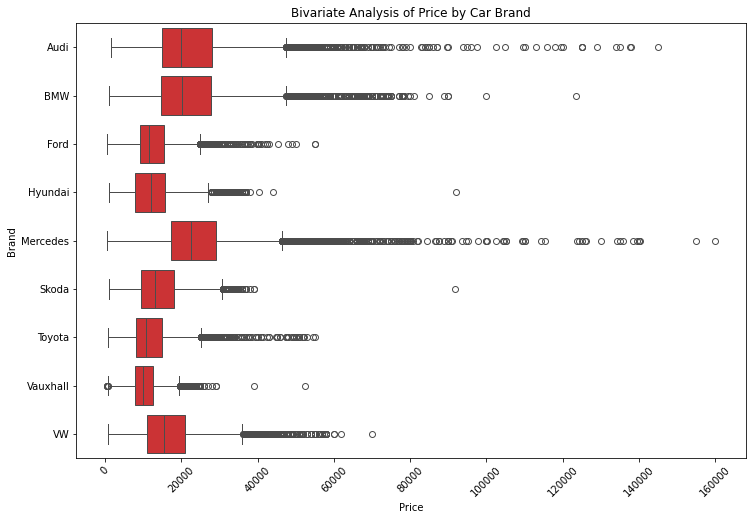

In [ ]:
# Mengatur ukuran gambar menggunakan plt.figure
plt.figure(figsize=(12, 8))  # Lebar 12 inch, tinggi 8 inch

# Membuat boxplot
sns.boxplot(x='price', y='brand', data=df_2)

# Menambahkan label dan judul
plt.xlabel('Price')
plt.ylabel('Brand')
plt.title('Bivariate Analysis of Price by Car Brand')

# Memutar label pada sumbu x
plt.xticks(rotation=45)

# Menampilkan gambar
plt.show()

Dari boxplot-boxplot diatas terlihat beberapa harga pada brand-brand tertentu yang memiliki outlier ekstrim sehingga saat Data Cleaning kita akan menghandlingnya, yaitu
- Audi
- BMW
- Ford
- Hyundai
- Mercedes
- Skoda
- Toyota
- Vauxhall
- Volkswagen

#### Audi

In [ ]:
df_2[(df_2['brand'] == "Audi") & (df_2['price'] > 140000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4743,Audi,R8,2020,145000,Semi-Auto,2000,Petrol,145.0,21.1,5.2


In [ ]:
df_2 = df_2.loc[~((df_2['brand'] == "Audi") & (df_2['price'] > 140000))]

#### BMW

In [ ]:
df_2[(df_2['brand'] == "BMW") & (df_2['price'] > 90000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
14118,BMW,2 Series,2015,123456,Semi-Auto,33419,Diesel,20.0,68.9,2.0
15806,BMW,M4,2016,99950,Automatic,771,Petrol,300.0,33.2,3.0


In [ ]:
df_2 = df_2.loc[~((df_2['brand'] == "BMW") & (df_2['price'] > 90000))]

#### Ford

In [ ]:
df_2[(df_2['brand'] == "Ford") & (df_2['price'] > 50000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
32945,Ford,Focus,2018,54995,Manual,11000,Petrol,145.0,36.7,2.3
40547,Ford,Focus,2018,54995,Manual,11000,Petrol,147.5,36.7,2.3


In [ ]:
df_2 = df_2.loc[~((df_2['brand'] == "Ford") & (df_2['price'] > 50000))]

#### Hyundai

In [ ]:
df_2[(df_2['brand'] == "Hyundai") & (df_2['price'] > 60000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
45466,Hyundai,I10,2017,92000,Automatic,35460,Petrol,150.0,47.9,1.2


In [ ]:
df_2 = df_2.loc[~((df_2['brand'] == "Hyundai") & (df_2['price'] > 60000))]

#### Mercedes

In [ ]:
# cek jumlah outlier
df_2[(df_2['brand'] == "Mercedes") & (df_2['price'] > 145000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
52174,Mercedes,G Class,2020,159999,Semi-Auto,1350,Petrol,145.0,21.4,4.0
55868,Mercedes,G Class,2020,154998,Automatic,3000,Petrol,150.0,21.4,4.0


In [ ]:
df_2 = df_2.loc[~((df_2['brand'] == "Mercedes") & (df_2['price'] > 145000))]

#### Skoda

In [ ]:
df_2[(df_2['brand'] == "Skoda") & (df_2['price'] > 80000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
66421,Skoda,Karoq,2019,91874,Automatic,3764,Petrol,145.0,40.9,1.5


In [ ]:
df_2 = df_2.loc[~((df_2['brand'] == "Skoda") & (df_2['price'] > 80000))]

#### Vauxhall

In [ ]:
df_2[(df_2['brand'] == "Vauxhall") & (df_2['price'] > 40000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
81081,Vauxhall,Mokka,2016,52489,Automatic,52489,Diesel,150.0,55.4,1.6


In [ ]:
df_2 = df_2.loc[~((df_2['brand'] == "Vauxhall") & (df_2['price'] > 38000))]

In [ ]:
df_2[(df_2['brand'] == "Vauxhall")].sort_values(by='price', ascending=False)

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
86055,Vauxhall,Grandland X,2019,28995,Automatic,1208,Petrol,145.0,43.5,1.2
85908,Vauxhall,Grandland X,2019,28991,Automatic,2543,Diesel,145.0,57.7,1.5
87558,Vauxhall,Vivaro,2018,27995,Manual,5000,Diesel,145.0,47.1,1.6
86084,Vauxhall,Grandland X,2018,26995,Manual,5000,Petrol,145.0,44.1,1.2
87100,Vauxhall,Insignia,2019,25999,Automatic,2543,Diesel,145.0,40.4,2.0
...,...,...,...,...,...,...,...,...,...,...
77658,Vauxhall,Astra,2005,695,Manual,150000,Diesel,150.0,57.7,1.7
77466,Vauxhall,Corsa,2003,590,Manual,82000,Petrol,160.0,44.8,1.2
77452,Vauxhall,Corsa,2002,495,Manual,99842,Petrol,145.0,50.4,1.0
87588,Vauxhall,Agila,2003,450,Manual,90000,Petrol,205.0,43.5,1.2


#### Volkswagen

In [ ]:
df_2[(df_2['brand'] == "VW") & (df_2['price'] > 65000)]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
102437,VW,California,2019,69994,Semi-Auto,3544,Diesel,260.0,29.1,2.0


In [ ]:
df_2[~((df_2['brand'] == "VW") & (df_2['price'] > 65000))]

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
102470,VW,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
102471,VW,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
102472,VW,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
102473,VW,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


In [ ]:
df_2 = df_2.loc[~((df_2['brand'] == "VW") & (df_2['price'] > 65000))]

In [ ]:
df_2 = df_2.reset_index(drop=True)

In [ ]:
df_2['brand'].value_counts()

brand
Ford        20137
Mercedes    15425
VW          14873
Vauxhall    13249
BMW         10598
Audi        10564
Toyota       6662
Skoda        6187
Hyundai      4768
Name: count, dtype: int64

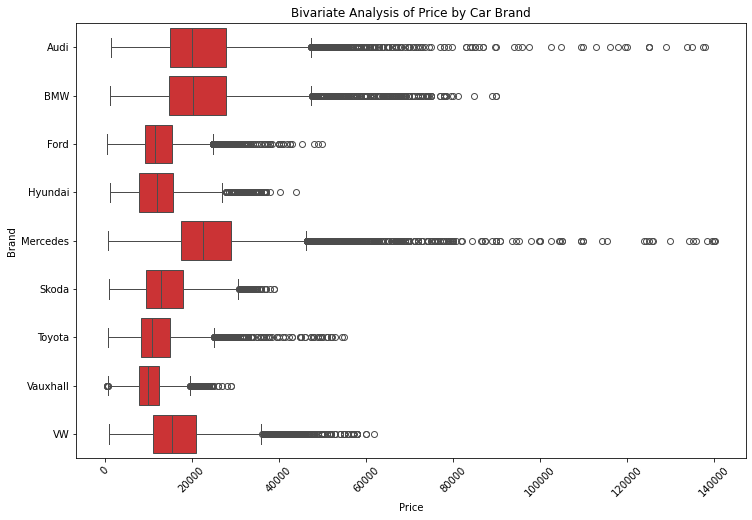

In [ ]:
# Mengatur ukuran gambar menggunakan plt.figure
plt.figure(figsize=(12, 8))  # Lebar 12 inch, tinggi 8 inch

# Membuat boxplot
sns.boxplot(x='price', y='brand', data=df_2)

# Menambahkan label dan judul
plt.xlabel('Price')
plt.ylabel('Brand')
plt.title('Bivariate Analysis of Price by Car Brand')

# Memutar label pada sumbu x
plt.xticks(rotation=45)

# Menampilkan gambar
plt.show()

### Visualisasi Data

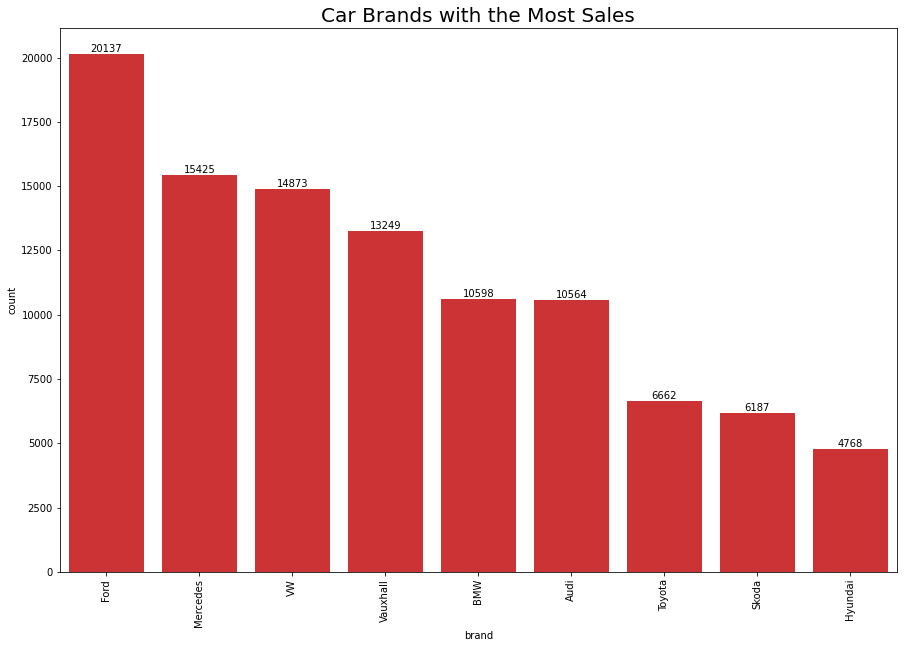

In [ ]:
plt.figure(figsize=(15, 10))
df_viz = sns.countplot(x='brand', data=df_2, order=df_2['brand'].value_counts().index)
df_viz.bar_label(df_viz.containers[0])
plt.xticks(rotation=90)
plt.title('Car Brands with the Most Sales', size=20)
plt.show()

Terlihat dari grafik di atas, mobil bekas yang paling banyak terjual di Inggris adalah Brand Ford diikuti oleh merk Mercedes.

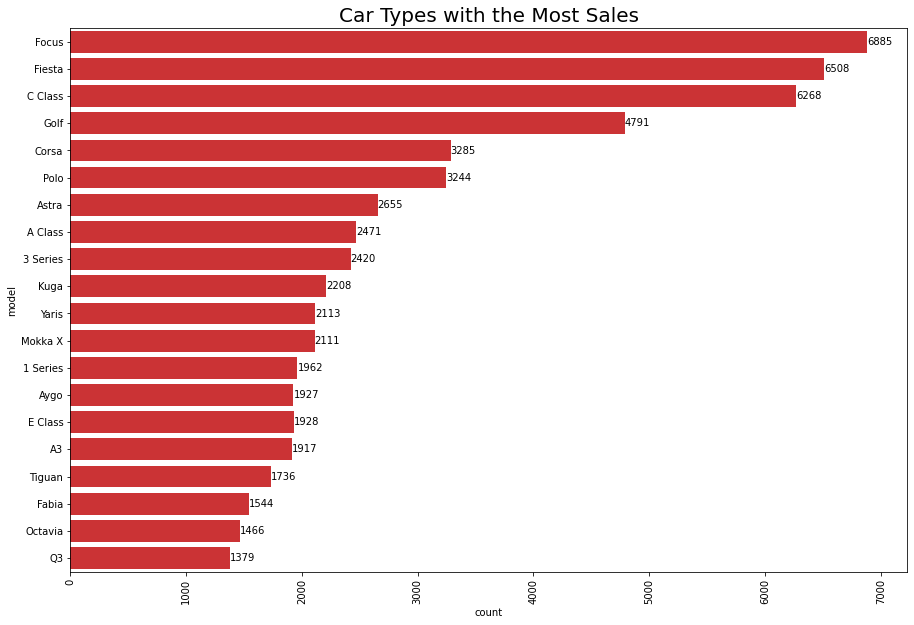

In [ ]:
plt.figure(figsize=(15,10))
df_viz=sns.countplot(df_2['model'],order = df['model'].value_counts().iloc[:20].index)
df_viz.bar_label(df_viz.containers[0])
plt.xticks(rotation=90)
plt.title ('Car Types with the Most Sales', size = 20)
plt.show()

Berdasarkan grafik diatas, terlihat model Ford Focus menjadi model yang paling banyak terjual.

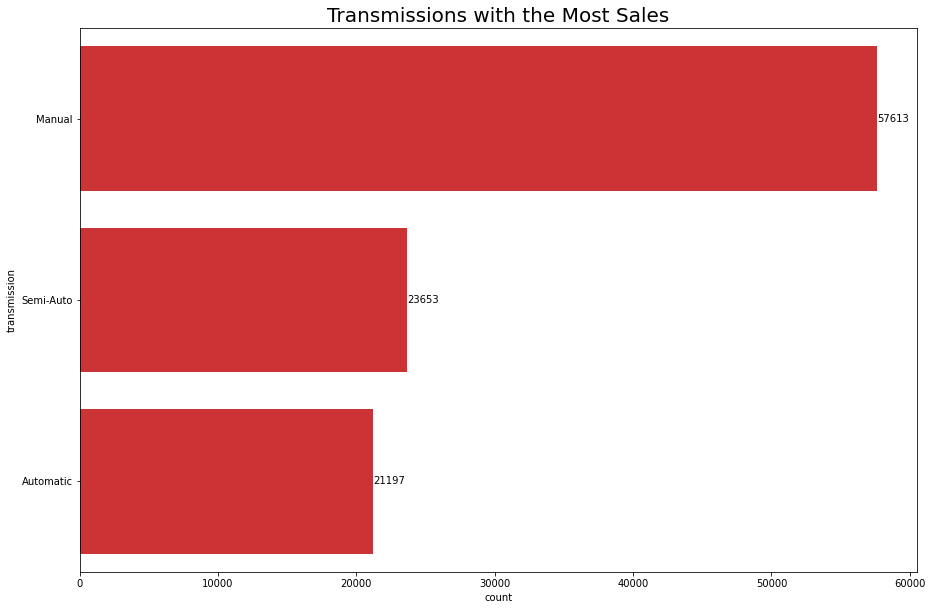

In [ ]:
plt.figure(figsize=(15,10))
df_trans=sns.countplot(df_2['transmission'],order = df_2['transmission'].value_counts().index)
df_trans.bar_label(df_trans.containers[0])
plt.title ('Transmissions with the Most Sales', size = 20)
plt.show()

Berdasarkan grafik diatas, terlihat transmisi Manual merupakan jenis transmisi yang paling banyak terjual.

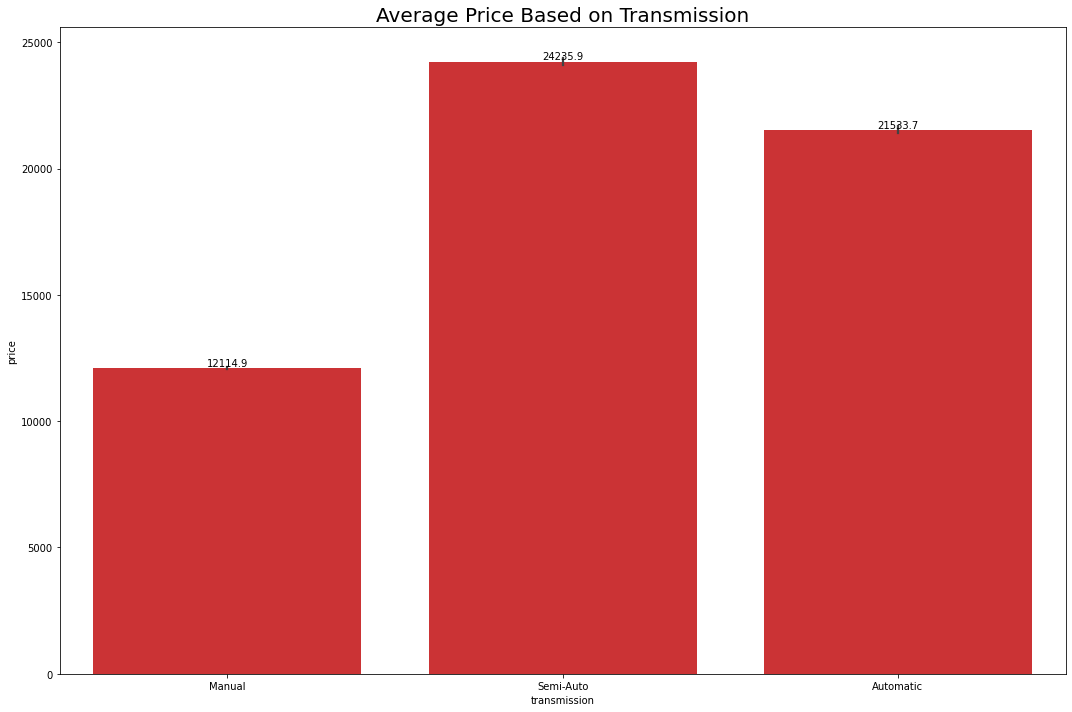

In [ ]:
plt.figure(figsize=(15,10))
avg_price_trans = sns.barplot(x='transmission', y='price', data=df_2, estimator=np.mean, order=df_2['transmission'].value_counts().index)
avg_price_trans.bar_label(avg_price_trans.containers[0])
plt.title('Average Price Based on Transmission', size=20)

plt.tight_layout()
plt.show()

Berdasarkan grafik diatas, terlihat transmisi Semi-Auto merupakan jenis transmisi dengan rata-rata harga penjualan paling tinggi.

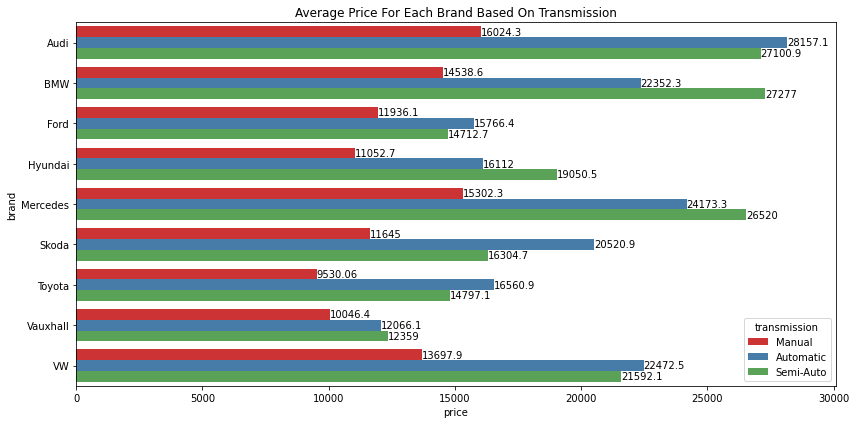

In [ ]:
plt.figure(figsize=(12,6))
brand_trans = sns.barplot(data=df_2,x='price',y='brand',hue='transmission',errwidth=0)
for bar in brand_trans.containers:
    brand_trans.bar_label(bar)
plt.title('Average Price For Each Brand Based On Transmission')
plt.tight_layout()
plt.show()

Secara keseluruhan, grafik tersebut menunjukkan bahwa jenis transmisi merupakan faktor yang mempengaruhi harga mobil bekas, bersama dengan reputasi merek dan nilai yang dirasakan. Transmisi automatic dan Semi-Auto sering kali menunjukkan biaya awal yang lebih tinggi dan teknologi yang lebih canggih, sehingga menimbulkan perbedaan harga.

Berdasarkan grafik diatas, terlihat transmisi Manual merupakan jenis transmisi yang paling banyak terjual.

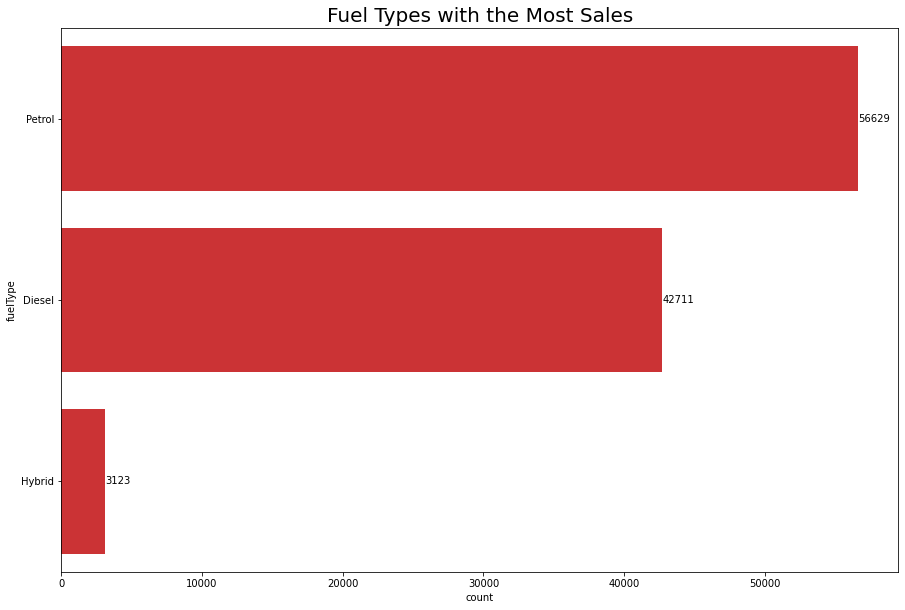

In [ ]:
plt.figure(figsize=(15,10))
df_fuelType=sns.countplot(df_2['fuelType'],order = df_2['fuelType'].value_counts().index)
df_fuelType.bar_label(df_fuelType.containers[0])
plt.title ('Fuel Types with the Most Sales', size = 20)
plt.show()

Berdasarkan grafik diatas, terlihat mobil dengan bahan bakar Petrol dan Diesel merupakan jenis mobil yang paling banyak terjual

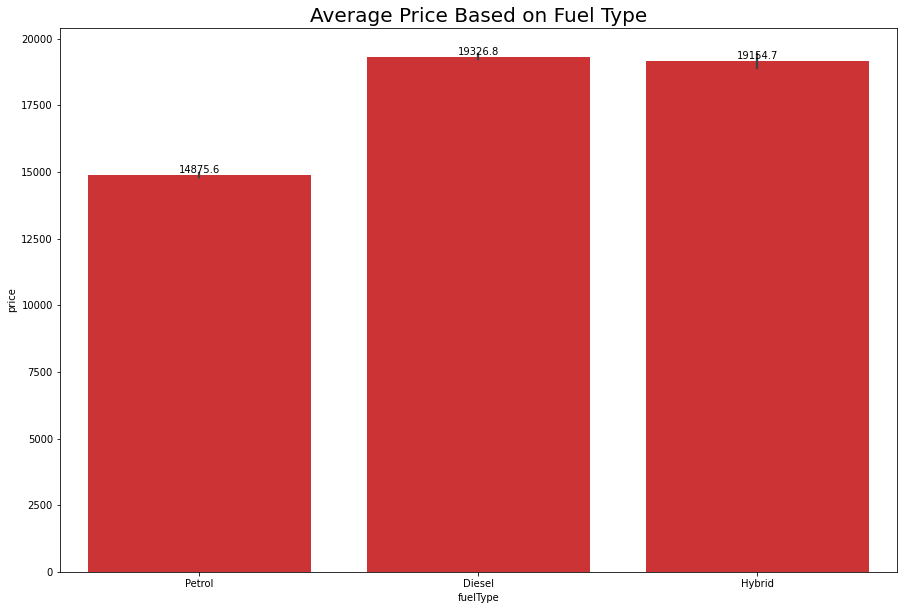

In [ ]:
plt.figure(figsize=(15,10))
avg_price_fueltype = sns.barplot(x='fuelType', y='price', data=df_2, estimator=np.mean,
                                 order=df_2['fuelType'].value_counts().index)
avg_price_fueltype.bar_label(avg_price_fueltype.containers[0])
plt.title('Average Price Based on Fuel Type', size=20)
plt.show()

Berdasarkan grafik diatas, terlihat mobil dengan bahan bakar Diesel merupakan jenis bahan bakar mobil dengan rata-rata harga penjualan paling tinggi, kemudian diikuti oleh dengan bahan bakar Hybrid

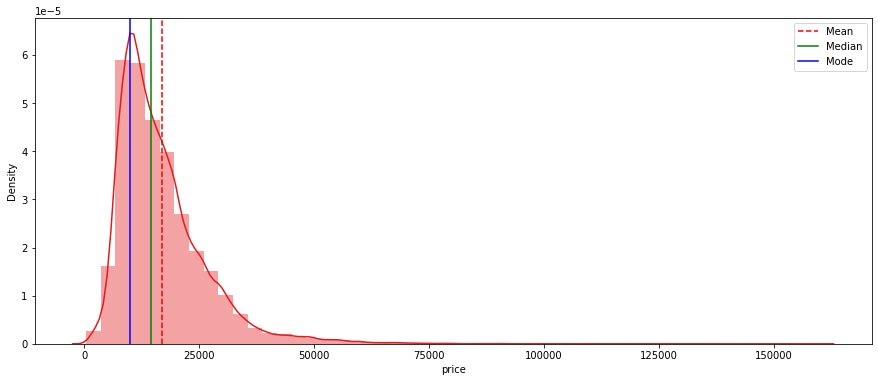

In [ ]:
# Cek distribusi target variable - price
f,ax = plt.subplots(1, sharex=True,figsize=(15,6))
mean_price = df_2['price'].mean()
median_price = df_2['price'].median()
mode_price = df_2['price'].mode().values[0]

sns.distplot(df['price'],ax = ax)
ax.axvline(mean_price, color='r', linestyle='--', label="Mean")
ax.axvline(median_price, color='g', linestyle='-', label="Median")
ax.axvline(mode_price, color='b', linestyle='-', label="Mode")

ax.legend()
plt.xlim()
plt.show()

Plot ini menunjukkan bahwa sebagian besar kendaraan dalam kumpulan data ini memiliki harga yang relatif lebih rendah, namun ada beberapa kendaraan yang sangat mahal sehingga menaikkan harga rata-rata.

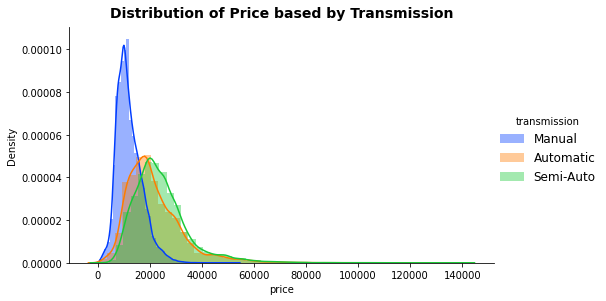

In [ ]:
ama=sns.FacetGrid(df_2,palette='bright',hue='transmission',aspect=9/5,height=4)
ama.map(sns.distplot,'price')
plt.title('Distribution of Price based by Transmission',y=1.0, pad=10,fontsize=14,fontweight='bold')
ama.add_legend(fontsize=12)

**Interpretasi**: Transmisi Manual Berdampak pada harga mobil, sedangkan transmisi Semi-Auto dan Automatic saling tumpang tindih, keduanya memiliki dampak yang relatif cenderung sama terhadap harga mobil.

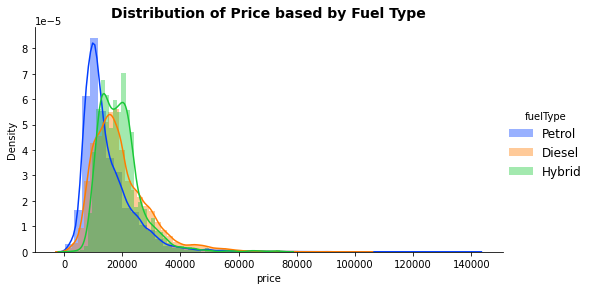

In [ ]:
ama2=sns.FacetGrid(df_2,palette='bright',hue='fuelType',aspect=9/5,height=4)
ama2.map(sns.distplot,'price')
plt.title('Distribution of Price based by Fuel Type',y=1.0, pad=10,fontsize=14,fontweight='bold')
ama2.add_legend(fontsize=12)

**Interpretasi**: Distribusi Petrol dan Diesel tumpang tindih sehingga kedua jenis bahan bakar tersebut memiliki dampak yang relatif cenderung sama terhadap harga. Jenis Bahan Bakar Hybrid dapat diabaikan karena hanya 3%  data yang memiliki Jenis Bahan Bakar Hybrid.

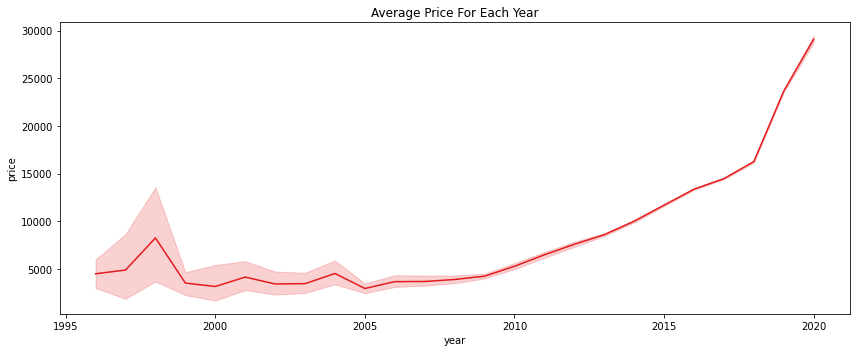

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df_2,x='year',y='price')
plt.title('Average Price For Each Year')
plt.tight_layout()
plt.show()

Mobil yang semakin baru tentunya memiliki teknologi dan fitur-fitur lebih maju dan lengkap yang tentunya meningkatkan harga mobil tersebut.

---
## Feature Engineering

In [ ]:
df_model = df_2.copy()

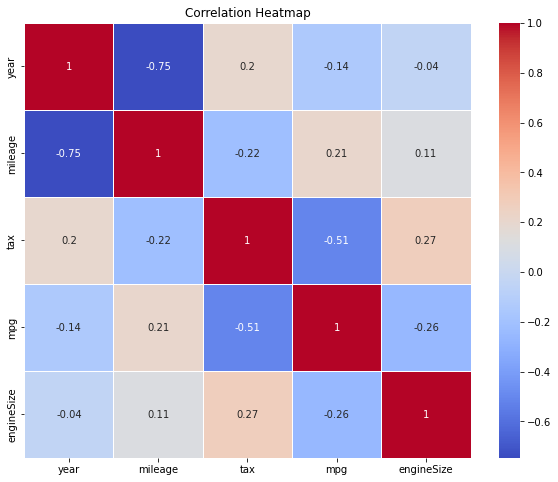

In [ ]:
selected_columns = ['year','mileage', 'tax', 'mpg', 'engineSize']
correlation_matrix = df_model[selected_columns].corr()

plt.figure(figsize=(10,8))  # Menentukan ukuran plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

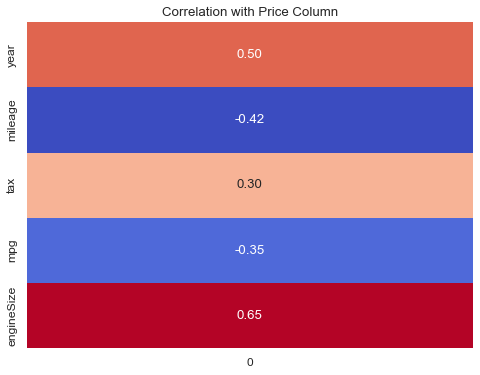

In [ ]:
selected_columns = ['year','mileage', 'tax', 'mpg', 'engineSize']
target_corr = df_model[selected_columns].corrwith(df_model['price'])

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False)
plt.title('Correlation with Price Column')
plt.show()


**Interpretasi:**
- engineSize (ukuran mesin) memiliki korelasi positif paling kuat dengan price (0,65). Artinya mobil dengan mesin lebih besar cenderung lebih mahal.
- Tahun memiliki korelasi positif sedang dengan price (0,50). Artinya harga mobil baru cenderung lebih mahal.
- Pajak memiliki korelasi positif yang lemah dengan harga (0,30). Artinya mobil dengan pajak lebih tinggi cenderung sedikit lebih mahal.
- Jarak tempuh memiliki korelasi negatif sedang dengan harga (-0,42). Artinya mobil dengan jarak tempuh lebih tinggi cenderung lebih murah.
- MPG memiliki korelasi negatif yang lemah dengan harga (-0,35). Artinya, mobil dengan penghematan bahan bakar yang lebih baik cenderung lebih murah.
- Kolom mileage dapat didrop karena memiliki korelasi yang cukup kuat dengan fitur year, dan pengaruhnya terhadap price lebih rendah jika dibandingkan dengan year.

In [ ]:
# menghapus fitur mileage
df_model = df_model.drop(['mileage'], axis=1)

### Encoding

In [ ]:
categorical_column = df_model.describe(include='object').columns
for i in categorical_column:
    print(f'Jumlah nilai unik dari fitur {i} adalah {df_model[i].nunique()}')

Jumlah nilai unik dari fitur brand adalah 9
Jumlah nilai unik dari fitur model adalah 193
Jumlah nilai unik dari fitur transmission adalah 3
Jumlah nilai unik dari fitur fuelType adalah 3


Binary encoding dilakukan pada fitur brand dan model karena kategori cukup banyak, sedangkan data kategorikal lainnya dilakukan one-hot encoding

In [ ]:
# Encoding
one_hot_enc = OneHotEncoder(drop='first',handle_unknown='ignore')
one_hot_enc_column = ['transmission', 'fuelType']

binary_enc = BinaryEncoder()
binary_enc_column = ['brand', 'model']

Scaling dilakukan menggunakan RobustScaler karena tahan terhadap outlier

In [ ]:
# Scaling
robust_scaler = RobustScaler()
robust_scaler_column = ['year', 'mpg', 'tax', 'engineSize']

---
## WorkFlow ML

### Train-test split

In [ ]:
X = df_model.drop(['price'], axis=1)
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 46)

In [ ]:
transformer = ColumnTransformer([
    ('binary', binary_enc, binary_enc_column),
    ('onehot', one_hot_enc, one_hot_enc_column)
], remainder = 'passthrough')

transformer_with_scaler = ColumnTransformer([
    ('binary', binary_enc, binary_enc_column),
    ('onehot', one_hot_enc, one_hot_enc_column),
    ('scaler', robust_scaler, robust_scaler_column)
], remainder = 'passthrough')

### Model Benchmarking

In [ ]:
# Cross Validation Function
def cross_val_test(transform):
    # Define models
    models = [
        ('Linear Regression', LinearRegression()),
        ('KNeighbors Regressor', KNeighborsRegressor()),
        ('Decision Tree Regressor', DecisionTreeRegressor(random_state=46)),
        ('Random Forest Regressor', RandomForestRegressor(random_state=46)),
        ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=46)),
        ('XGBoost Regressor', XGBRegressor(random_state=46))
    ]

    # Initialize lists to store scores
    scores = {
        'Model': [],
        'CV_MAPE': [], 'Mean_MAPE': [], 'Std_MAPE': [], 'Test_MAPE': [],
        'CV_R2': [], 'Mean_R2': [], 'Std_R2': [], 'Test_R2': []
    }

    # Cross-validation with different models
    for model_name, model in models:
        estimator = Pipeline([('preprocessing', transform), ('model', model)])

        # MAPE scores
        cv_MAPE = -1 * cross_val_score(estimator, X_train, y_train,
                                       cv=KFold(n_splits=5, shuffle=True, random_state=46),
                                       scoring='neg_mean_absolute_percentage_error')
        scores['Model'].append(model_name)
        scores['CV_MAPE'].append(cv_MAPE.round(5))
        scores['Mean_MAPE'].append(cv_MAPE.mean())
        scores['Std_MAPE'].append(cv_MAPE.std())

        estimator.fit(X_train, y_train)
        test_MAPE = mean_absolute_percentage_error(y_test, estimator.predict(X_test))
        scores['Test_MAPE'].append(test_MAPE)

        # R2 scores
        cv_r2 = cross_val_score(estimator, X_train, y_train,
                                cv=KFold(n_splits=5, shuffle=True, random_state=46),
                                scoring='r2')
        scores['CV_R2'].append(cv_r2.round(5))
        scores['Mean_R2'].append(cv_r2.mean())
        scores['Std_R2'].append(cv_r2.std())

        test_r2 = r2_score(y_test, estimator.predict(X_test))
        scores['Test_R2'].append(test_r2)

    # Create summary dataframe
    summary = pd.DataFrame(scores)
    return summary

In [ ]:
cross_val_test(transformer_with_scaler)

,Model,CV_MAPE,Mean_MAPE,Std_MAPE,Test_MAPE,CV_R2,Mean_R2,Std_R2,Test_R2
0,Linear Regression,"[0.25435, 0.24489, 0.24668, 0.23245, 0.24628]",0.244932,0.007063,0.242642,"[0.76351, 0.76582, 0.76816, 0.77188, 0.75178]",0.764230,0.006814,0.766304
1,KNeighbors Regressor,"[0.09502, 0.09201, 0.09265, 0.09221, 0.09218]",0.092813,0.001122,0.091517,"[0.94225, 0.94739, 0.94621, 0.94744, 0.9453]",0.945717,0.001909,0.951938
2,Decision Tree Regressor,"[0.09055, 0.08754, 0.08849, 0.08836, 0.08816]",0.088619,0.001019,0.087119,"[0.94054, 0.95284, 0.94861, 0.94897, 0.94559]",0.947311,0.004093,0.952334
3,Random Forest Regressor,"[0.08662, 0.08378, 0.08476, 0.08457, 0.0846]",0.084865,0.000943,0.084199,"[0.95156, 0.95931, 0.95492, 0.9558, 0.95656]",0.955631,0.002509,0.958748
4,Gradient Boosting Regressor,"[0.14715, 0.14789, 0.1423, 0.1424, 0.14542]",0.145033,0.002331,0.144608,"[0.88863, 0.88965, 0.89471, 0.89951, 0.88411]",0.891323,0.005304,0.896683
5,XGBoost Regressor,"[0.09444, 0.09201, 0.0914, 0.09138, 0.09316]",0.092476,0.001175,0.092308,"[0.95013, 0.95425, 0.95252, 0.95304, 0.95379]",0.952744,0.001437,0.955734


Model Random Forest jika dibandingkan dengan model lain memiliki score R2 yang tinggi dan score MAPE yang rendah. Oleh karena itu, Random Forest akan dipilih sebagai final model.

In [ ]:
transformer_with_scaler = ColumnTransformer([
    ('binary', binary_enc, binary_enc_column),
    ('onehot', one_hot_enc, one_hot_enc_column),
    ('scaler', robust_scaler, robust_scaler_column)
], remainder='passthrough')

model_rf = RandomForestRegressor(random_state=46)

pipeline_rf = Pipeline([
    ('preprocessing', transformer_with_scaler),  # Preprocessing step
    ('model', model_rf)                          # Random Forest model
])

pipeline_rf.fit(X_train, y_train)

predictions = pipeline_rf.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1278.5579028138309
R-squared: 0.9587480597922134


In [ ]:
# scoring for training data
predictions_train = pipeline_rf.predict(X_train)
rmse_train = round(np.sqrt(mean_squared_error(y_train, predictions_train)), 4)
r2_train = round(r2_score(y_train, predictions_train), 4)
mae_train = round(mean_absolute_error(y_train, predictions_train), 4)
mape_train = round(mean_absolute_percentage_error(y_train, predictions_train), 4)

In [ ]:
# scoring for testing data
predictions = np.round(pipeline_rf.predict(X_test), 4)
rmse = round(np.sqrt(mean_squared_error(y_test, predictions)), 4)
r2 = round(r2_score(y_test, predictions), 4)
mae = round(mean_absolute_error(y_test, predictions), 4)
mape = round(mean_absolute_percentage_error(y_test, predictions), 4)

In [ ]:
pipeline_rf.predict(X_train)

array([ 6110.42481037, 20122.09386944, 32880.90354687, ...,
        9558.96567669,  8817.10581083,  8404.6150675 ])

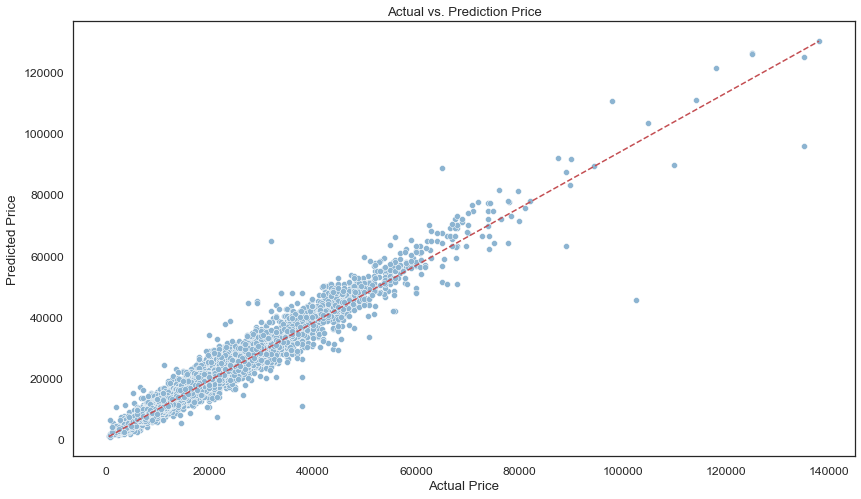

In [ ]:
# scatterplot antara actual dan prediction price
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [predictions.min(), predictions.max()], 'r--')
plt.title('Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

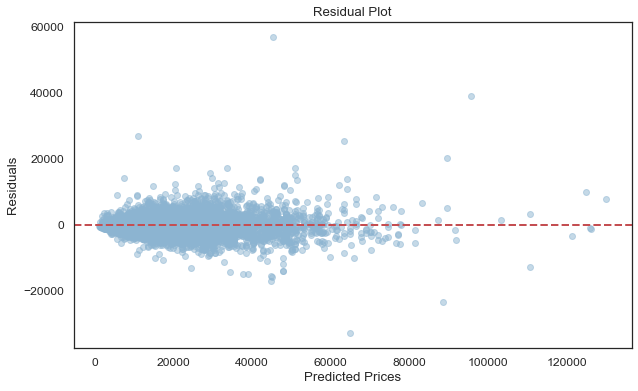

In [ ]:
# Calculate residuals
residuals = y_test - predictions

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Horizontal line at y=0 for reference
plt.show()

Terlihat bahwa residual tersebar secara acak di sekitar garis tengah tanpa pola yang jelas. Hal ini menunjukkan bahwa model mampu membuat prediksi yang cukup baik.

#### Hyperparameter tuning

In [ ]:
# hyperparamter tuning flow

# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=46)

# Membuat algorithm chains
estimator_rf = Pipeline([
    ('preprocessing', transformer_with_scaler),
    ('model', rf)
])

parameter = {
    'model__n_estimators': [50, 150, 200],
    'model__max_depth': [None, 10, 20, 30, 40, 50, 60],
    'model__min_samples_split': [2, 4, 6, 8, 10],
    'model__min_samples_leaf': [1, 3, 5],
    'model__bootstrap': [True, False]
}

crossval = KFold(n_splits=5, shuffle=True, random_state=46)

# Hyperparameter tuning
model_rf_tune = RandomizedSearchCV(
    estimator_rf,
    param_distributions = parameter,
    n_iter = 50,
    cv = crossval,
    scoring = 'neg_mean_absolute_percentage_error',
    n_jobs = -1,
    random_state = 46
)

In [ ]:
model_rf_tune.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=46, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('binary',
                                                                               BinaryEncoder(),
                                                                               ['brand',
                                                                                'model']),
                                                                              ('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['transmission',


In [ ]:
# menampilkan parameter terbaik berdasarkan hyperparameter tuning
print(model_rf_tune.best_params_)

{'model__n_estimators': 200, 'model__min_samples_split': 6, 'model__min_samples_leaf': 1, 'model__max_depth': 60, 'model__bootstrap': True}


In [ ]:
model_rf_tune.best_params_

{'model__n_estimators': 200,
 'model__min_samples_split': 6,
 'model__min_samples_leaf': 1,
 'model__max_depth': 60,
 'model__bootstrap': True}

In [ ]:
params = {'n_estimators': 200, 'min_samples_split': 6,
          'min_samples_leaf':1, 'max_depth': 60, 'bootstrap':True}

In [ ]:
# Cross Validation Function
def cross_val_test_tune(transform):
    # Define models
    models = [
        ('Random Forest Regressor', RandomForestRegressor(**params)),
    ]

    # Initialize lists to store scores
    scores = {
        'Model': [],
        'CV_MAPE': [], 'Mean_MAPE': [], 'Std_MAPE': [], 'Test_MAPE': [],
        'CV_R2': [], 'Mean_R2': [], 'Std_R2': [], 'Test_R2': []
    }

    # Cross-validation with different models
    for model_name, model in models:
        estimator = Pipeline([('preprocessing', transform), ('model', model)])

        # MAPE scores
        cv_MAPE = -1 * cross_val_score(estimator, X_train, y_train,
                                       cv=KFold(n_splits=5, shuffle=True, random_state=46),
                                       scoring='neg_mean_absolute_percentage_error')
        scores['Model'].append(model_name)
        scores['CV_MAPE'].append(cv_MAPE.round(5))
        scores['Mean_MAPE'].append(cv_MAPE.mean())
        scores['Std_MAPE'].append(cv_MAPE.std())

        estimator.fit(X_train, y_train)
        test_MAPE = mean_absolute_percentage_error(y_test, estimator.predict(X_test))
        scores['Test_MAPE'].append(test_MAPE)

        # R2 scores
        cv_r2 = cross_val_score(estimator, X_train, y_train,
                                cv=KFold(n_splits=5, shuffle=True, random_state=46),
                                scoring='r2')
        scores['CV_R2'].append(cv_r2.round(5))
        scores['Mean_R2'].append(cv_r2.mean())
        scores['Std_R2'].append(cv_r2.std())

        test_r2 = r2_score(y_test, estimator.predict(X_test))
        scores['Test_R2'].append(test_r2)

    # Create summary dataframe
    summary_tune = pd.DataFrame(scores)
    return summary_tune

In [ ]:
cross_val_test_tune(transformer_with_scaler)

,Model,CV_MAPE,Mean_MAPE,Std_MAPE,Test_MAPE,CV_R2,Mean_R2,Std_R2,Test_R2
0,Random Forest Regressor,"[0.08646, 0.08346, 0.08401, 0.08418, 0.08407]",0.084437,0.001042,0.083872,"[0.95127, 0.95957, 0.95449, 0.95695, 0.95663]",0.955782,0.002772,0.958924


In [ ]:
# scoring for training data after tuning
predictions_tune_train = model_rf_tune.predict(X_train)
rmse_tune_first = round(np.sqrt(mean_squared_error(y_train, predictions_tune_train)), 4)
r2_tune_first = round(r2_score(y_train, predictions_tune_train), 4)
mae_tune_first = round(mean_absolute_error(y_train, predictions_tune_train), 4)
mape_tune_first = round(mean_absolute_percentage_error(y_train, predictions_tune_train), 4)

In [ ]:
# scoring for testing data after tuning
predictions_tune = model_rf_tune.predict(X_test)
rmse_tune = round(np.sqrt(mean_squared_error(y_test, predictions_tune)), 4)
r2_tune = round(r2_score(y_test, predictions_tune), 4)
mae_tune = round(mean_absolute_error(y_test, predictions_tune), 4)
mape_tune = round(mean_absolute_percentage_error(y_test, predictions_tune), 4)

In [ ]:
# membuat dataframe untuk skor data training sebelum tuning
indexes = ['before tuning', 'after tuning']
data_score_train = {'RMSE' : [rmse_train, rmse_tune_first],
              'R2' : [r2_train, r2_tune_first],
              'MAE' : [mae_train, mae_tune_first],
              'MAPE' : [mape_train, mape_tune_first]}

score_rf_train = pd.DataFrame(data=data_score_train, index=indexes)
score_rf_train.index.name = 'Random Forest Regressor'

In [ ]:
# membuat dataframe untuk skor data testing sebelum tuning
indexes = ['before tuning', 'after tuning']
data_score = {'RMSE' : [rmse, rmse_tune],
              'R2' : [r2, r2_tune],
              'MAE' : [mae, mae_tune],
              'MAPE' : [mape, mape_tune]}

score_rf = pd.DataFrame(data=data_score, index=indexes)
score_rf.index.name = 'Random Forest Regressor'

In [ ]:
print('Skor data training: ')
score_rf_train

Skor data training: 


,RMSE,R2,MAE,MAPE
Random Forest Regressor,,,,
before tuning,1536.0845,0.9754,1031.3826,0.0673
after tuning,1607.2610,0.9730,1074.2641,0.0700


In [ ]:
print('Skor data testing: ')
score_rf

Skor data testing: 


,RMSE,R2,MAE,MAPE
Random Forest Regressor,,,,
before tuning,1974.9370,0.9587,1278.5579,0.0842
after tuning,1972.2966,0.9589,1272.5397,0.0838


Berdasarkan skor yang telah diperoleh, untuk skor data training mengalami penurunan yang asalnya itu kesalahan prediksi menyimpang 6.7% menjadi 7% dari nilai tengahnya, sedangkan untuk data testing, menghasilkan MAPE yang lebih rendah jika dibandingkan tanpa tuning. Akan tetapi karena perbedaan tersebut tidak terlalu signifikan sehingga model Random Forest tanpa hyperparameter tuning yang akan dipilih sebagai model dalam kasus ini.

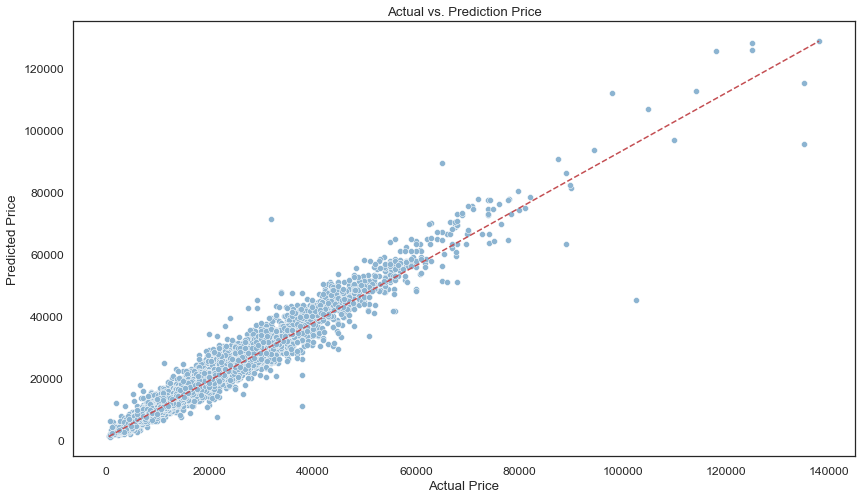

In [ ]:
# scatterplot antara actual dan prediction price
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=predictions_tune)
plt.plot([y_test.min(), y_test.max()], [predictions_tune.min(), predictions_tune.max()], 'r--')
plt.title('Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

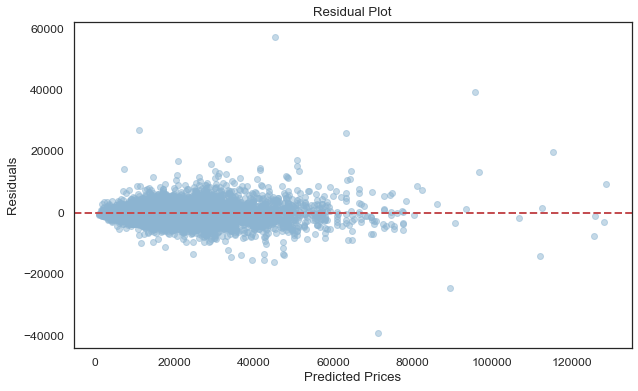

In [ ]:
# Calculate residuals
residuals_tuned = y_test - predictions_tune

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions_tune, residuals_tuned, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Horizontal line at y=0 for reference
plt.show()

In [ ]:
# menampilkan fitur yang telah dilakukan binary encoding
transformer_with_scaler.transformers_[0][1].get_feature_names_out()

array(['brand_0', 'brand_1', 'brand_2', 'brand_3', 'model_0', 'model_1',
       'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7'],
      dtype=object)

In [ ]:
# menampilkan fitur yang telah dilakukan one-hoi encoding
transformer_with_scaler.transformers_[1][1].get_feature_names_out()

array(['transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Hybrid',
       'fuelType_Petrol'], dtype=object)

In [ ]:
# list keseluran fitur yang telah diencoding dan fitur numerikal
feature = list(transformer_with_scaler.transformers_[0][1].get_feature_names_out())+list((transformer_with_scaler.transformers_[1][1].get_feature_names_out()))+robust_scaler_column

In [ ]:
# menentukan feature importance berdasarkan pipeline
feature_importances = pd.DataFrame(data = pipeline_rf[1].feature_importances_,
                                   index = feature,
                                   columns = ["coef"])
feature_importances.sort_values(by = ["coef"], ascending = True, inplace = True)
feature_importances

,coef
fuelType_Hybrid,0.000634
transmission_Semi-Auto,0.002404
brand_0,0.002914
brand_2,0.004697
fuelType_Petrol,0.004899
brand_1,0.006171
model_0,0.006491
model_3,0.006580
model_4,0.006587
model_5,0.006632


<Axes: >

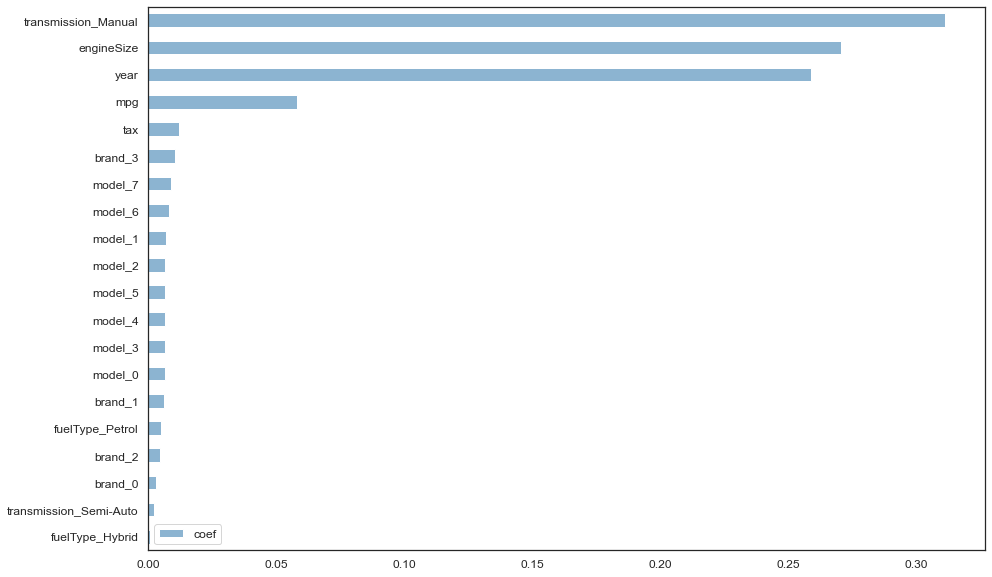

In [ ]:
# Menampilkan Feature Importance
feature_importances.plot(kind = "barh", figsize = (15,10))

### Insight & Recommendation


**Berdasarkan feature importance yang dihasilkan oleh model Random Forest, dapat dianalisis bahwa:**

- Mengutamakan transmisi manual dan ukuran mesin dalam analisis lebih lanjut untuk mengembangkan strategi pemasaran atau penjualan, karena dua fitur ini memiliki pengaruh yang kuat terhadap harga penjualan mobil.
- Segmentasi berdasarkan tahun produksi untuk menargetkan pelanggan yang lebih menyukai model terbaru dengan teknologi yang lebih baik.
- Efisiensi bahan bakar bisa menjadi nilai jual tambahan bagi pelanggan tertentu.
- Fitur Transmission Manual merupakan jenis transmisi yang dapat mempengaruhi harga. Beberapa konsumen mungkin memiliki preferensi terhadap transmisi manual karena mobil dengan fitur ini memiliki harga yang lebih murah, sesuai dengan hasil analisa yang dilakukan sebelumnya bahwa harga mobil yang lebih murah memiliki peminat yang lebih tinggi.
- Fitur engineSize ini menunjukkan kontribusi yang relatif lebih besar dibandingkan dengan fitur-fitur lainnya dalam memprediksi harga mobil. Hal ini cukup beralasan karena semakin tinggi kapasitas mesin mobil artinya semakin besar pula tenaga mobil tersebut yang dapat mempengaruhi harga mobil.
- Fitur Year menunjukkan seberapa pentingnya informasi tahun dalam mempengaruhi harga yang diprediksi oleh model. karena dapat memberikan pola atau tren yang signifikan dalam industri mobil. dimana tahun produksi mobil mencerminkan usia mobil, mobil yang lebih baru cenderung memiliki harga yang lebih tinggi.
- Fitur MPG menunjukkan pentingnya efisiensi mobil dalam mempengaruhi harga, karena mobil yang efisien juga berpengaruh pada biaya yang harus dikeluarkan untuk bahan bakar. dimana konsumen cenderung mempertimbangkan efisiensi bahan bakar saat membeli mobil, dan ini dapat memengaruhi harga mobil.
- Mobil yang harganya lebih tinggi cenderung memiliki pajak yang lebih tinggi. Namun, ada juga banyak mobil dengan harga tinggi yang memiliki pajak rendah, dan sebaliknya. Maka perlu mempertimbangkan juga fitur tax.
